In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cycler
from matplotlib.ticker import StrMethodFormatter
from matplotlib.axis import Axis
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties
import sqlite3 as sq
from functools import reduce
#settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 150)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
import sys
sys.path.append("../../") # Adds higher directory to python modules path

In [2]:
import vizfunctions2
prettypercentchange = vizfunctions2.prettypercentchange #single viz per x axis unit datalabels, active inputs: xoffset, yoffset, labelformat
percentchange = vizfunctions2.percentchange #double viz per x axis unit datalabels, active inputs: xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size
percent = vizfunctions2.percent
percentchange = vizfunctions2.percentchange
realchange = vizfunctions2.realchange

In [3]:
import changefunctions
calculate_changes = changefunctions.calculate_changes
generate_time_frames = changefunctions.generate_time_frames

In [4]:
import vizfunctions
#allheaders = vizfunctions.allheaders
#howwide = vizfunctions.howwide
tablecolors = vizfunctions.tablecolors
#allheadersmerged = vizfunctions.allheadersmerged
#makeinvisible = vizfunctions.makeinvisible
mergecells = vizfunctions.mergecells
mergemultcells = vizfunctions.mergemultcells

In [5]:
#data labels functions
def singledatalabels(xoffset, yoffset, labelformat):
    for j, k in zip(x, y):
        label = labelformat.format(k)
        plt.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset, yoffset), ha = 'center')
boxstyleinput = "round,pad=-0.060,rounding_size=0.15"
def roundedboxes(boxstyleinput):
    new_patches = []
    for patch in reversed(ax.patches):
        bb = patch.get_bbox()
        color=patch.get_facecolor()
        p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),abs(bb.width), abs(bb.height),boxstyle=boxstyleinput, ec="none", fc=color, mutation_aspect=1)
        patch.remove()
        new_patches.append(p_bbox)
    for patch in new_patches:
        ax.add_patch(patch)
def howwide(width):
    ['None' for x in range(width)]
def howlong(indexlength):
    ["None" for x in range(indexlength)]
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheadersmerged(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in doublecols:
            cell.set_edgecolor(col1)
        elif cell_text in column_headers:
            cell.set_edgecolor(None)
        else:
            cell.set(edgecolor=col2)
        if cell_text in column_headers:
            cell.visible_edges = 'B'
        elif cell_text in row_headers:
            cell.visible_edges = edge2
        elif cell_text in col_names:
            cell.visible_edges = 'LR'
        if cell_text in row_headers\
        or cell_text in doublecols:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#function to make figure invisible for tables
guy1, guy2, guy3 = False, 'off', 'tight'
def makeinvisible(guy1, guy2, guy3):
    return fig.patch.set_visible(guy1), ax.axis(guy2), ax.axis(guy3)
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheaders(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in column_headers:
            cell.set_edgecolor(col1)
        else:
            cell.set(edgecolor=col2)
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in column_headers:
            cell.visible_edges = edge1
        elif cell_text in row_headers:
            cell.visible_edges = edge2
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in row_headers\
        or cell_text in column_headers:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#stacked bar labels function
belowstackedbarlabels, abovestackedbarlabels = -5, 2
def stackedbarlabels(locationoffset):
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + locationoffset, str(float(round(bar.get_height(), 1))) + '%', ha='center')
def doubledatalabels(xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size):
    for j, k in zip(xpos, y1):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset1, yoffset1), fontsize = size, ha = 'center')
    for j, k in zip(xpos, y2):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset2, yoffset2), fontsize = size, ha = 'center')

In [6]:
#Set branding parameters
GNRCDARKBLUE, GNRCLIGHTBLUE, GNRCORANGE, GNRCCOOLGRAY= '#00263E', '#6DB0C7', '#EB7525', '#7B7E85'
C1, C2, C3, C4, C5, C6, C7, C8, C9 = GNRCDARKBLUE, GNRCLIGHTBLUE, GNRCORANGE, GNRCCOOLGRAY, '#e7f2d5', '#0C2428', '#414543', '#a9d6bd', '#e8ebbc'
TABLECOL1, TABLECOL2 = '#E1EFF2', '#F4F9F9'
GNRCFONTONE, GNRCFONTTWO, GNRCFONTTHREE = 'Calibri', 'DIN Condensed', 'Palatino Linotype'
SMALLER_SIZE, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE, BIGGEST_SIZE = 10, 11, 13, 18, 20
#Update the default style sheet using rcparams
plt.rcParams.update({'font.size': SMALL_SIZE, 'font.weight': 'normal', 'axes.titlesize': BIGGER_SIZE, 'axes.labelsize': MEDIUM_SIZE, 'xtick.labelsize': SMALL_SIZE, 
'ytick.labelsize': SMALL_SIZE, 'legend.fontsize': SMALL_SIZE, 'font.family': GNRCFONTONE, 'axes.facecolor': 'None', 'figure.figsize': (10, 5), 
'figure.facecolor': 'None', 'figure.edgecolor': 'None', 'figure.autolayout': True, 'figure.dpi': 500, 'axes.grid': False, 'axes.grid.which': 'major', 
'axes.axisbelow': True, 'text.color': GNRCDARKBLUE, 'axes.labelcolor': GNRCDARKBLUE, 'xtick.color': GNRCCOOLGRAY, 'ytick.color': GNRCCOOLGRAY, 
'axes.labelpad': 15, 'axes.titlepad': 20, 'grid.color': GNRCCOOLGRAY, 'grid.linestyle': '-', 'grid.alpha': '0.7', 'lines.linewidth': 1.5, 
'lines.linestyle': '-', 'lines.marker': 'o', 'legend.framealpha': 0.8, 'legend.facecolor': 'inherit', 'legend.frameon': False,
'axes.prop_cycle': cycler(color = [C1, C2, C3, C4, C5, C6, C7, C8, C9]), 
'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.bottom': False, 'axes.spines.left': False, 'xtick.major.size': 8, 
'xtick.minor.size': 4, 'ytick.major.size': 6, 'ytick.minor.size': 3, 'ytick.minor.size': 3})
#Settings not available in rcparams
tickaxisselection = 'both'                  #both axes have ticks
majororminortick = 'major'                  #only major ticks selected for now, although we just established a default size for the minor if we want them
linealpha = 0.8                             #no rcparam, set this as alpha for line plots
#AXIS LABEL FORMATTERS
yearformat = '{x:.0f}'                       #takes float datatype to look like a year
numbernodecimalformat = '{x:,.0f}'           #takes float datatype to a number with no decimal with commas at the thousandth
numberonedecimalformat = '{x:,.1f}'          #takes float datatype to a number with one decimal with commas at the thousandth
numbertwodecimalformat = '{x:,.2f}'          #takes float datatype to a number with two decimal with commas at the thousandth
percentformat = '{x:,.1f}%'                  #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
percentnodecimalformat = '{x:,.0f}%'         #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
moneyformat = '${x:,.0f}'                    #takes float datatype to a number with no decimal with commas at the thousandth and a MONEY sign   

In [49]:
conn = sq.connect('../../GNRC-Data-Pipelines/Outputs/CensusBureau.db')
#2020PL and 2021 ACS5
sql_query = pd.read_sql('SELECT * FROM [CensusBureau_ACS5_2021_CensusTract]', conn)
ACS52021 = pd.DataFrame(sql_query)
ACS52021.drop(columns = 'Source', inplace = True)
#PL2020
sql_query = pd.read_sql('SELECT * FROM [CensusBureau_PL_2020_Block]', conn)
PL2020 = pd.DataFrame(sql_query)
PL2020.drop(columns = 'Source', inplace = True)

In [50]:
tract = PL2020.loc[(PL2020['CountyFIPS'] == 169) & (PL2020['CensusTract'] == '090100')]
tract = tract.drop(columns = ['NAME', 'GEO_ID', 'CountyFIPS', 'Block']).reset_index(drop = True)
tract.tail()

CensusTract  Population  White Alone  White Alone %  Non-White Population: Race  Black or African American Alone  \
241      090100        21.0         20.0      95.238095                         1.0                              1.0   
242      090100         3.0          1.0      33.333333                         2.0                              0.0   
243      090100        10.0          8.0      80.000000                         2.0                              0.0   
244      090100         0.0          0.0            NaN                         0.0                              0.0   
245      090100         9.0          9.0     100.000000                         0.0                              0.0   

     Black or African American Alone %  Black or African American Alone % Non-White Population  American Indian Alaska Native Alone  \
241                           4.761905                                              100.0                                       0.0   
242                           0.000000                                                0.0                                       0.0   
243                           0.000000                                                0.0                                       0.0   
244                                NaN                                                NaN                                       0.0   
245                           0.000000                                                NaN                                       0.0   

     American Indian Alaska Native Alone %  American Indian Alaska Native Alone % Non-White Population  Asian Alone  Asian Alone %  \
241                                    0.0                                                0.0                   0.0       0.000000   
242                                    0.0                                                0.0                   1.0      33.333333   
243                                    0.0                                                0.0                   0.0       0.000000   
244                                    NaN                                                NaN                   0.0            NaN   
245                                    0.0                                                NaN                   0.0       0.000000   

     Asian Alone % Non-White Population  Native Hawaiian Other Pacific Islander Alone  Native Hawaiian Other Pacific Islander Alone %  \
241                                 0.0                                           0.0                                             0.0   
242                                50.0                                           0.0                                             0.0   
243                                 0.0                                           0.0                                             0.0   
244                                 NaN                                           0.0                                             NaN   
245                                 NaN                                           0.0                                             0.0   

     Native Hawaiian Other Pacific Islander Alone % Non-White Population  Some Other Race Alone  Some Other Race Alone %  \
241                                                0.0                                      0.0                      0.0   
242                                                0.0                                      0.0                      0.0   
243                                                0.0                                      0.0                      0.0   
244                                                NaN                                      0.0                      NaN   
245                                                NaN                                      0.0                      0.0   

     Some Other Race Alone % Non-White Population  Two or More Races  Two or More Races %  Two or M

In [51]:
tract['CensusTract'].unique()

array(['090100'], dtype=object)

In [52]:
tract = tract.groupby(by = 'CensusTract').sum()

In [53]:
tract

Population  White Alone  White Alone %  Non-White Population: Race  Black or African American Alone  Black or African American Alone %  \
CensusTract                                                                                                                                           
090100           8700.0       6737.0   14576.584295                      1963.0                           1467.0                        1253.409686   

             Black or African American Alone % Non-White Population  American Indian Alaska Native Alone  American Indian Alaska Native Alone %  \
CensusTract                                                                                                                                       
090100                                             4973.300901                                      24.0                             230.338241   

             American Indian Alaska Native Alone % Non-White Population  Asian Alone  Asian Alone %  Asian Alone % Non-White Population  \
CensusTract                                                                                                                               
090100                                              728.438537                  16.0     108.143122                          404.969512   

             Native Hawaiian Other Pacific Islander Alone  Native Hawaiian Other Pacific Islander Alone %  \
CensusTract                                                                                                 
090100                                                0.0                                             0.0   

             Native Hawaiian Other Pacific Islander Alone % Non-White Population  Some Other Race Alone  Some Other Race Alone %  \
CensusTract                                                                                                                        
090100                                                     0.0                                    161.0               466.857801   

             Some Other Race Alone % Non-White Population  Two or More Races  Two or More Races %  Two or More Races % Non-White Population  \
CensusTract                                                                                                                                   
090100                                         1921.41084              295.0          1764.666855                               7371.880209   

             Hispanic or Latino  Hispanic or Latino %  Not Hispanic or Latino  Not Hispanic or Latino %  Minority   Minority %  \
CensusTract                                                                                                                      
090100                    271.0           1079.530332                  8429.0              17320.469668    2039.0  4134.892424   

             White Alone Not Hispanic or Latino  White Alone Not Hispanic or Latino %  Occupancy:Total Households  Occupancy:Occupied Units  \
CensusTract                                                                                                                                   
090100                                   6661.0                          14265.107576                      2501.0                    2328.0   

             Occupancy%:Occupied Units  Occupancy:Vacant Units  Occupancy%:Vacant Units  Group Quarters:Population  Group Quarters %:Population  \
CensusTract                                                                                                                                       
090100                    16580.666109                   173.0              2119.333891                     2483.0                   103.054226   

             Group Quarters:Institutionalized  Group Quarters %:Institutionalized  \
CensusTract                                                                         
090100                                 2479.0                               100.0   

             Group Quarte

In [54]:
tract['NAME'] = 'Tract'
tract = tract.reset_index(drop = True)

In [55]:
tract['Minority %'] = percent(tract['Minority'], tract['Population'])

In [56]:
tract.head()

Population  White Alone  White Alone %  Non-White Population: Race  Black or African American Alone  Black or African American Alone %  \
0      8700.0       6737.0   14576.584295                      1963.0                           1467.0                        1253.409686   

   Black or African American Alone % Non-White Population  American Indian Alaska Native Alone  American Indian Alaska Native Alone %  \
0                                        4973.300901                                      24.0                             230.338241   

   American Indian Alaska Native Alone % Non-White Population  Asian Alone  Asian Alone %  Asian Alone % Non-White Population  \
0                                         728.438537                  16.0     108.143122                          404.969512   

   Native Hawaiian Other Pacific Islander Alone  Native Hawaiian Other Pacific Islander Alone %  \
0                                           0.0                                             0.0   

   Native Hawaiian Other Pacific Islander Alone % Non-White Population  Some Other Race Alone  Some Other Race Alone %  \
0                                                0.0                                    161.0               466.857801   

   Some Other Race Alone % Non-White Population  Two or More Races  Two or More Races %  Two or More Races % Non-White Population  \
0                                    1921.41084              295.0          1764.666855                               7371.880209   

   Hispanic or Latino  Hispanic or Latino %  Not Hispanic or Latino  Not Hispanic or Latino %  Minority  Minority %  \
0               271.0           1079.530332                  8429.0              17320.469668    2039.0   23.436782   

   White Alone Not Hispanic or Latino  White Alone Not Hispanic or Latino %  Occupancy:Total Households  Occupancy:Occupied Units  \
0                              6661.0                          14265.107576                      2501.0                    2328.0   

   Occupancy%:Occupied Units  Occupancy:Vacant Units  Occupancy%:Vacant Units  Group Quarters:Population  Group Quarters %:Population  \
0               16580.666109                   173.0              2119.333891                     2483.0                   103.054226   

   Group Quarters:Institutionalized  Group Quarters %:Institutionalized  Group Quarters:Institutionalized, Adults in Correctional Facility  \
0                            2479.0                               100.0                                             2479.0                   

   Group Quarters % Institutionalized:Adults in Correctional Facility  Group Quarters %:Institutionalized Adults in Correctional Facility  \
0                                              100.0                                                               100.0                    

   Group Quarters:Institutionalized, Juvenile Facility  Group Quarters % Institutionalized:Juvenile Facility  \
0                                                0.0                                                  0.0      

   Group Quarters %:Institutionalized in Juvenile Facility  Group Quarters:Institutionalized, Nursing or Skilled Nursing Facility  \
0                                                0.0                                                      0.0                       

   Group Quarters % Institutionalized:Nursing or Skilled Nursing Facility  \
0                                                0.0                        

   Group Quarters %:Institutionalized in Nursing or Skilled Nursing Facility  Group Quarters:Institutionalized, Other Facility  \
0                                                0.0                                                                       0.0   

   Group Quarters % Institutionalized:Other Facility  Group Quarters %:Institutionalized in Other Facility  Group Quarters:Noninstitutionalized  \
0                                                0.0                   

In [57]:
block = PL2020.loc[(PL2020['Block'] == '3048') & (PL2020['CountyFIPS'] == 169)]
block

NAME                    GEO_ID  CountyFIPS CensusTract Block  Population  White Alone  \
169211  Block 3048, Block Group 3, Census Tract 901, T...  1000000US471690901003048       169.0      090100  3048      2508.0       1268.0   

        White Alone %  Non-White Population: Race  Black or African American Alone  Black or African American Alone %  \
169211      50.558214                      1240.0                           1156.0                          46.092504   

        Black or African American Alone % Non-White Population  American Indian Alaska Native Alone  American Indian Alaska Native Alone %  \
169211                                          93.225806                                       1.0                               0.039872   

        American Indian Alaska Native Alone % Non-White Population  Asian Alone  Asian Alone %  Asian Alone % Non-White Population  \
169211                                           0.080645                   0.0            0.0                                 0.0   

        Native Hawaiian Other Pacific Islander Alone  Native Hawaiian Other Pacific Islander Alone %  \
169211                                           0.0                                             0.0   

        Native Hawaiian Other Pacific Islander Alone % Non-White Population  Some Other Race Alone  Some Other Race Alone %  \
169211                                                0.0                                     72.0                 2.870813   

        Some Other Race Alone % Non-White Population  Two or More Races  Two or More Races %  Two or More Races % Non-White Population  \
169211                                      5.806452               11.0             0.438596                                  0.887097   

        Hispanic or Latino  Hispanic or Latino %  Not Hispanic or Latino  Not Hispanic or Latino %  Minority  Minority %  \
169211                98.0              3.907496                  2410.0                 96.092504    1264.0   50.398724   

        White Alone Not Hispanic or Latino  White Alone Not Hispanic or Latino %  Occupancy:Total Households  Occupancy:Occupied Units  \
169211                              1244.0                             49.601276                        11.0                       8.0   

        Occupancy%:Occupied Units  Occupancy:Vacant Units  Occupancy%:Vacant Units  Group Quarters:Population  Group Quarters %:Population  \
169211                  72.727273                     3.0                27.272727                     2479.0                      98.8437   

        Group Quarters:Institutionalized  Group Quarters %:Institutionalized  Group Quarters:Institutionalized, Adults in Correctional Facility  \
169211                            2479.0                               100.0                                             2479.0                   

        Group Quarters % Institutionalized:Adults in Correctional Facility  Group Quarters %:Institutionalized Adults in Correctional Facility  \
169211                                              100.0                                                               100.0                    

        Group Quarters:Institutionalized, Juvenile Facility  Group Quarters % Institutionalized:Juvenile Facility  \
169211                                                0.0                                                  0.0      

        Group Quarters %:Institutionalized in Juvenile Facility  Group Quarters:Institutionalized, Nursing or Skilled Nursing Facility  \
169211                                                0.0                                                      0.0                       

        Group Quarters % Institutionalized:Nursing or Skilled Nursing Facility  \
169211                                                0.0                        

        Group Quarters %:Institutionalized in Nursing or Skilled Nursing Facility  Group Quarters:Institutionalized, Other Facility  \
169211             

In [58]:
block = block.drop(columns = ['NAME', 'GEO_ID', 'CountyFIPS', 'CensusTract', 'Block']).reset_index(drop = True)
block['NAME'] = 'Block'

In [59]:
block

Population  White Alone  White Alone %  Non-White Population: Race  Black or African American Alone  Black or African American Alone %  \
0      2508.0       1268.0      50.558214                      1240.0                           1156.0                          46.092504   

   Black or African American Alone % Non-White Population  American Indian Alaska Native Alone  American Indian Alaska Native Alone %  \
0                                          93.225806                                       1.0                               0.039872   

   American Indian Alaska Native Alone % Non-White Population  Asian Alone  Asian Alone %  Asian Alone % Non-White Population  \
0                                           0.080645                   0.0            0.0                                 0.0   

   Native Hawaiian Other Pacific Islander Alone  Native Hawaiian Other Pacific Islander Alone %  \
0                                           0.0                                             0.0   

   Native Hawaiian Other Pacific Islander Alone % Non-White Population  Some Other Race Alone  Some Other Race Alone %  \
0                                                0.0                                     72.0                 2.870813   

   Some Other Race Alone % Non-White Population  Two or More Races  Two or More Races %  Two or More Races % Non-White Population  \
0                                      5.806452               11.0             0.438596                                  0.887097   

   Hispanic or Latino  Hispanic or Latino %  Not Hispanic or Latino  Not Hispanic or Latino %  Minority  Minority %  \
0                98.0              3.907496                  2410.0                 96.092504    1264.0   50.398724   

   White Alone Not Hispanic or Latino  White Alone Not Hispanic or Latino %  Occupancy:Total Households  Occupancy:Occupied Units  \
0                              1244.0                             49.601276                        11.0                       8.0   

   Occupancy%:Occupied Units  Occupancy:Vacant Units  Occupancy%:Vacant Units  Group Quarters:Population  Group Quarters %:Population  \
0                  72.727273                     3.0                27.272727                     2479.0                      98.8437   

   Group Quarters:Institutionalized  Group Quarters %:Institutionalized  Group Quarters:Institutionalized, Adults in Correctional Facility  \
0                            2479.0                               100.0                                             2479.0                   

   Group Quarters % Institutionalized:Adults in Correctional Facility  Group Quarters %:Institutionalized Adults in Correctional Facility  \
0                                              100.0                                                               100.0                    

   Group Quarters:Institutionalized, Juvenile Facility  Group Quarters % Institutionalized:Juvenile Facility  \
0                                                0.0                                                  0.0      

   Group Quarters %:Institutionalized in Juvenile Facility  Group Quarters:Institutionalized, Nursing or Skilled Nursing Facility  \
0                                                0.0                                                      0.0                       

   Group Quarters % Institutionalized:Nursing or Skilled Nursing Facility  \
0                                                0.0                        

   Group Quarters %:Institutionalized in Nursing or Skilled Nursing Facility  Group Quarters:Institutionalized, Other Facility  \
0                                                0.0                                                                       0.0   

   Group Quarters % Institutionalized:Other Facility  Group Quarters %:Institutionalized in Other Facility  Group Quarters:Noninstitutionalized  \
0                                                0.0                   

In [60]:
dfs = [block, tract]
data = pd.concat(dfs)

In [61]:
percents = [col for col in data.columns if '%' in col]

In [62]:
data = data.drop(columns = percents)

In [63]:
data = data.set_index('NAME').transpose()

In [64]:
data['Tract Minus Prison'] = data['Tract'] - data['Block']

In [65]:
data = data.transpose()

In [66]:
data.head()

Population  White Alone  Non-White Population: Race  Black or African American Alone  American Indian Alaska Native Alone  \
NAME                                                                                                                                            
Block                   2508.0       1268.0                      1240.0                           1156.0                                  1.0   
Tract                   8700.0       6737.0                      1963.0                           1467.0                                 24.0   
Tract Minus Prison      6192.0       5469.0                       723.0                            311.0                                 23.0   

                    Asian Alone  Native Hawaiian Other Pacific Islander Alone  Some Other Race Alone  Two or More Races  Hispanic or Latino  \
NAME                                                                                                                                          
Block                       0.0                                           0.0                   72.0               11.0                98.0   
Tract                      16.0                                           0.0                  161.0              295.0               271.0   
Tract Minus Prison         16.0                                           0.0                   89.0              284.0               173.0   

                    Not Hispanic or Latino  Minority  White Alone Not Hispanic or Latino  Occupancy:Total Households  Occupancy:Occupied Units  \
NAME                                                                                                                                             
Block                               2410.0    1264.0                              1244.0                        11.0                       8.0   
Tract                               8429.0    2039.0                              6661.0                      2501.0                    2328.0   
Tract Minus Prison                  6019.0     775.0                              5417.0                      2490.0                    2320.0   

                    Occupancy:Vacant Units  Group Quarters:Population  Group Quarters:Institutionalized  \
NAME                                                                                                      
Block                                  3.0                     2479.0                            2479.0   
Tract                                173.0                     2483.0                            2479.0   
Tract Minus Prison                   170.0                        4.0                               0.0   

                    Group Quarters:Institutionalized, Adults in Correctional Facility  Group Quarters:Institutionalized, Juvenile Facility  \
NAME                                                                                                                                         
Block                                                          2479.0                                                                0.0     
Tract                                                          2479.0                                                                0.0     
Tract Minus Prison                                                0.0                                                                0.0     

                    Group Quarters:Institutionalized, Nursing or Skilled Nursing Facility  Group Quarters:Institutionalized, Other Facility  \
NAME                                                                                                                                          
Block                                                             0.0                                                                   0.0   
Tract                                                             0.0                                                                   0.0   
Tract Minus Prison          

In [68]:
cols = ['Population', 'Minority']
table = data[cols]
table = table.reset_index(drop = False)
table.head()

NAME  Population  Minority
0               Block      2508.0    1264.0
1               Tract      8700.0    2039.0
2  Tract Minus Prison      6192.0     775.0

In [27]:
data['White Alone %'] = percent(data['White Alone'], data['Population'])
data['Non-White Population:Race %'] = percent(data['Non-White Population: Race'], data['Population'])
data['Black or African American Alone %'] = percent(data['Black or African American Alone'], data['Population'])
data['Black or African American Alone % Non-White Population'] = percent(data['Black or African American Alone'], data['Non-White Population: Race'])
data['American Indian Alaska Native Alone %'] = percent(data['American Indian Alaska Native Alone'], data['Population'])
data['American Indian Alaska Native Alone % Non-White Population'] = percent(data['American Indian Alaska Native Alone'], data['Non-White Population: Race'])
data['Asian Alone %'] = percent(data['Asian Alone'], data['Population'])
data['Asian Alone % Non-White Population'] = percent(data['Asian Alone'], data['Non-White Population: Race'])
data['Native Hawaiian Other Pacific Islander Alone %'] = percent(data['Native Hawaiian Other Pacific Islander Alone'], data['Population'])
data['Native Hawaiian Other Pacific Islander Alone % Non-White Population'] = percent(data['Native Hawaiian Other Pacific Islander Alone'], data['Non-White Population: Race'])
data['Some Other Race Alone %'] = percent(data['Some Other Race Alone'], data['Population'])
data['Some Other Race Alone % Non-White Population'] = percent(data['Some Other Race Alone'], data['Non-White Population: Race'])
data['Two or More Races %'] = percent(data['Two or More Races'], data['Population'])
data['Two or More Races % Non-White Population'] = percent(data['Two or More Races'], data['Non-White Population: Race'])
data['Hispanic or Latino %'] = percent(data['Hispanic or Latino'], data['Population'])
data['Not Hispanic or Latino %'] = percent(data['Not Hispanic or Latino'], data['Population'])
data['Minority %'] = percent(data['Minority'], data['Population'])
data['White Alone Not Hispanic or Latino %'] = percent(data['White Alone Not Hispanic or Latino'], data['Population'])
data['Group Quarters %:Population'] = percent(data['Group Quarters:Population'], data['Population'])
data['Group Quarters %:Institutionalized'] = percent(data['Group Quarters:Institutionalized'], data['Group Quarters:Population'])
data['Group Quarters % Institutionalized:Adults in Correctional Facility'] = percent(data['Group Quarters:Institutionalized, Adults in Correctional Facility'], 
                                                                                     data['Group Quarters:Institutionalized'])
data['Group Quarters %:Institutionalized Adults in Correctional Facility'] = percent(data['Group Quarters:Institutionalized, Adults in Correctional Facility'], 
                                                                                     data['Group Quarters:Population'])
data['Group Quarters % Institutionalized:Juvenile Facility'] = percent(data['Group Quarters:Institutionalized, Juvenile Facility'], 
                                                                        data['Group Quarters:Institutionalized'])
data['Group Quarters %:Institutionalized in Juvenile Facility'] = percent(data['Group Quarters:Institutionalized, Juvenile Facility'], 
                                                                           data['Group Quarters:Population'])
data['Group Quarters % Institutionalized:Nursing or Skilled Nursing Facility'] = percent(data['Group Quarters:Institutionalized, Nursing or Skilled Nursing Facility'], 
                                                                        data['Group Quarters:Institutionalized'])
data['Group Quarters %:Institutionalized in Nursing or Skilled Nursing Facility'] = percent(data['Group Quarters:Institutionalized, Nursing or Skilled Nursing Facility'], 
                                                                           data['Group Quarters:Population'])
data['Group Quarters % Institutionalized:Other Facility'] = percent(data['Group Quarters:Institutionalized, Other Facility'], 
                                                                     data['Group Quarters:Institutionalized'])
data['Group Quarters %:Institutionalized in Other Facility'] = percent(data['Group Quarters:Institutionalized, Other Facility'], 
                                                                        data['Group Quarters:Population'])


In [28]:
data.head()

Population  White Alone  Non-White Population: Race  Black or African American Alone  American Indian Alaska Native Alone  \
NAME                                                                                                                                            
Block                   2508.0       1268.0                      1240.0                           1156.0                                  1.0   
Tract                   8700.0       6737.0                      1963.0                           1467.0                                 24.0   
Tract Minus Prison      6192.0       5469.0                       723.0                            311.0                                 23.0   

                    Asian Alone  Native Hawaiian Other Pacific Islander Alone  Some Other Race Alone  Two or More Races  Hispanic or Latino  \
NAME                                                                                                                                          
Block                       0.0                                           0.0                   72.0               11.0                98.0   
Tract                      16.0                                           0.0                  161.0              295.0               271.0   
Tract Minus Prison         16.0                                           0.0                   89.0              284.0               173.0   

                    Not Hispanic or Latino  Minority  White Alone Not Hispanic or Latino  Occupancy:Total Households  Occupancy:Occupied Units  \
NAME                                                                                                                                             
Block                               2410.0    1264.0                              1244.0                        11.0                       8.0   
Tract                               8429.0    2039.0                              6661.0                      2501.0                    2328.0   
Tract Minus Prison                  6019.0     775.0                              5417.0                      2490.0                    2320.0   

                    Occupancy:Vacant Units  Group Quarters:Population  Group Quarters:Institutionalized  \
NAME                                                                                                      
Block                                  3.0                     2479.0                            2479.0   
Tract                                173.0                     2483.0                            2479.0   
Tract Minus Prison                   170.0                        4.0                               0.0   

                    Group Quarters:Institutionalized, Adults in Correctional Facility  Group Quarters:Institutionalized, Juvenile Facility  \
NAME                                                                                                                                         
Block                                                          2479.0                                                                0.0     
Tract                                                          2479.0                                                                0.0     
Tract Minus Prison                                                0.0                                                                0.0     

                    Group Quarters:Institutionalized, Nursing or Skilled Nursing Facility  Group Quarters:Institutionalized, Other Facility  \
NAME                                                                                                                                          
Block                                                             0.0                                                                   0.0   
Tract                                                             0.0                                                                   0.0   
Tract Minus Prison          

In [94]:
data.reset_index(drop = False, inplace = True)

In [95]:
cols = ['NAME', 'Population', 'White Alone', 'White Alone %', 'Non-White Population: Race', 'Non-White Population:Race %', 
        'Black or African American Alone', 'Black or African American Alone %', 
        'Black or African American Alone % Non-White Population', 'American Indian Alaska Native Alone', 'American Indian Alaska Native Alone %', 
        'American Indian Alaska Native Alone % Non-White Population', 'Asian Alone', 'Asian Alone %', 'Asian Alone % Non-White Population', 
        'Native Hawaiian Other Pacific Islander Alone', 'Native Hawaiian Other Pacific Islander Alone %', 
        'Native Hawaiian Other Pacific Islander Alone % Non-White Population', 'Some Other Race Alone', 'Some Other Race Alone %', 
        'Some Other Race Alone % Non-White Population', 'Two or More Races', 'Two or More Races %', 'Two or More Races % Non-White Population', 
        'Hispanic or Latino', 'Hispanic or Latino %', 'Not Hispanic or Latino', 'Not Hispanic or Latino %', 'Minority', 'Minority %', 
        'White Alone Not Hispanic or Latino', 'White Alone Not Hispanic or Latino %', 'Group Quarters:Institutionalized, Adults in Correctional Facility', 
        'Group Quarters %:Population', 'Group Quarters %:Institutionalized', 
        'Group Quarters %:Institutionalized Adults in Correctional Facility', 'Group Quarters % Institutionalized:Adults in Correctional Facility']

In [96]:
data = data[cols]

In [97]:
data.head()

NAME  Population  White Alone  White Alone %  Non-White Population: Race  Non-White Population:Race %  \
0               Block      2508.0       1268.0      50.558214                      1240.0                    49.441786   
1               Tract      8700.0       6737.0      77.436782                      1963.0                    22.563218   
2  Tract Minus Prison      6192.0       5469.0      88.323643                       723.0                    11.676357   

   Black or African American Alone  Black or African American Alone %  Black or African American Alone % Non-White Population  \
0                           1156.0                          46.092504                                          93.225806        
1                           1467.0                          16.862069                                          74.732552        
2                            311.0                           5.022610                                          43.015214        

   American Indian Alaska Native Alone  American Indian Alaska Native Alone %  American Indian Alaska Native Alone % Non-White Population  \
0                                  1.0                               0.039872                                           0.080645            
1                                 24.0                               0.275862                                           1.222618            
2                                 23.0                               0.371447                                           3.181189            

   Asian Alone  Asian Alone %  Asian Alone % Non-White Population  Native Hawaiian Other Pacific Islander Alone  \
0          0.0       0.000000                            0.000000                                           0.0   
1         16.0       0.183908                            0.815079                                           0.0   
2         16.0       0.258398                            2.213001                                           0.0   

   Native Hawaiian Other Pacific Islander Alone %  Native Hawaiian Other Pacific Islander Alone % Non-White Population  Some Other Race Alone  \
0                                             0.0                                                0.0                                     72.0   
1                                             0.0                                                0.0                                    161.0   
2                                             0.0                                                0.0                                     89.0   

   Some Other Race Alone %  Some Other Race Alone % Non-White Population  Two or More Races  Two or More Races %  \
0                 2.870813                                      5.806452               11.0             0.438596   
1                 1.850575                                      8.201732              295.0             3.390805   
2                 1.437339                                     12.309820              284.0             4.586563   

   Two or More Races % Non-White Population  Hispanic or Latino  Hispanic or Latino %  Not Hispanic or Latino  Not Hispanic or Latino %  Minority  \
0                                  0.887097                98.0              3.907496                  2410.0                 96.092504    1264.0   
1                                 15.028018               271.0              3.114943                  8429.0                 96.885057    2039.0   
2                                 39.280775               173.0              2.793928                  6019.0                 97.206072     775.0   

   Minority %  White Alone Not Hispanic or Latino  White Alone Not Hispanic or Latino %  \
0   50.398724                              1244.0                             49.601276   
1   23.436782                              6661.0                             76.563218   
2   12.516150                              5417.0                    

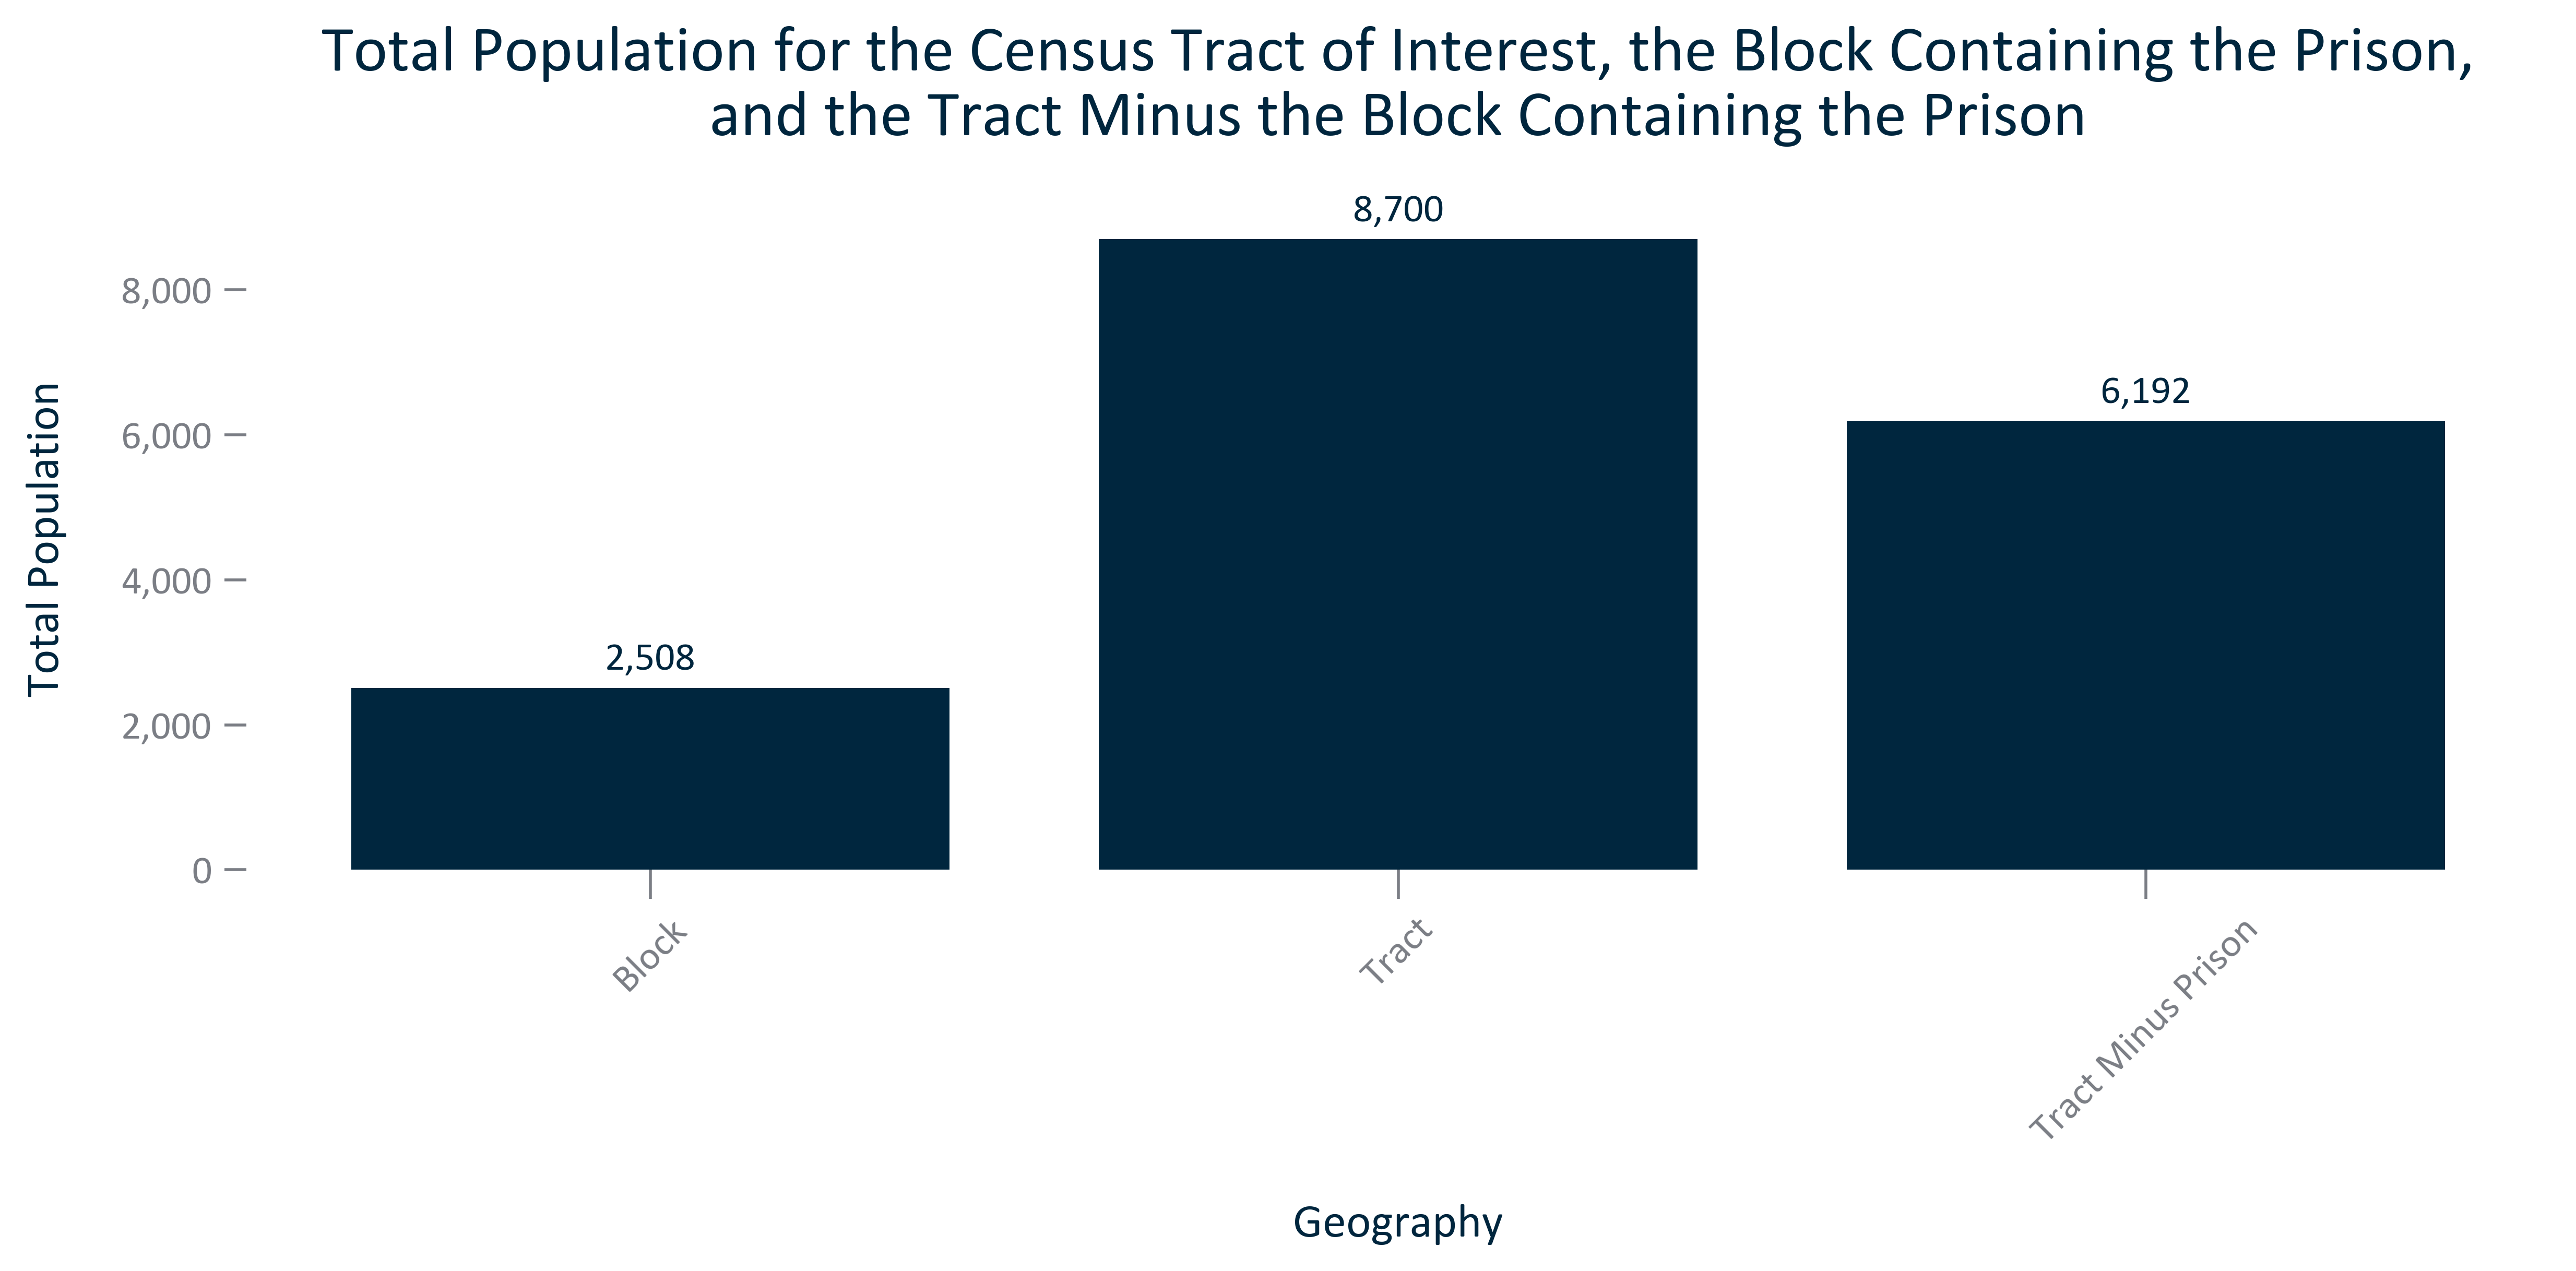

In [154]:
#Total Population for the Three Geographies
title = 'Total Population for the Census Tract of Interest, the Block Containing the Prison,\nand the Tract Minus the Block Containing the Prison'
df_temp = data[['NAME', 'Population']]
x = df_temp['NAME']
y = df_temp['Population']
xlabel = 'Geography'
ylabel = 'Total Population'
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45) #set 
#data labels
singledatalabels(0, 5, "{:,.0f}")
fig.savefig('PortFigs/TractBreakout_TotalPopulation.png', bbox_inches='tight')
df_temp.to_csv('PortFigs/TractBreakout_TotalPopulation.csv')
plt.show()
plt.close();

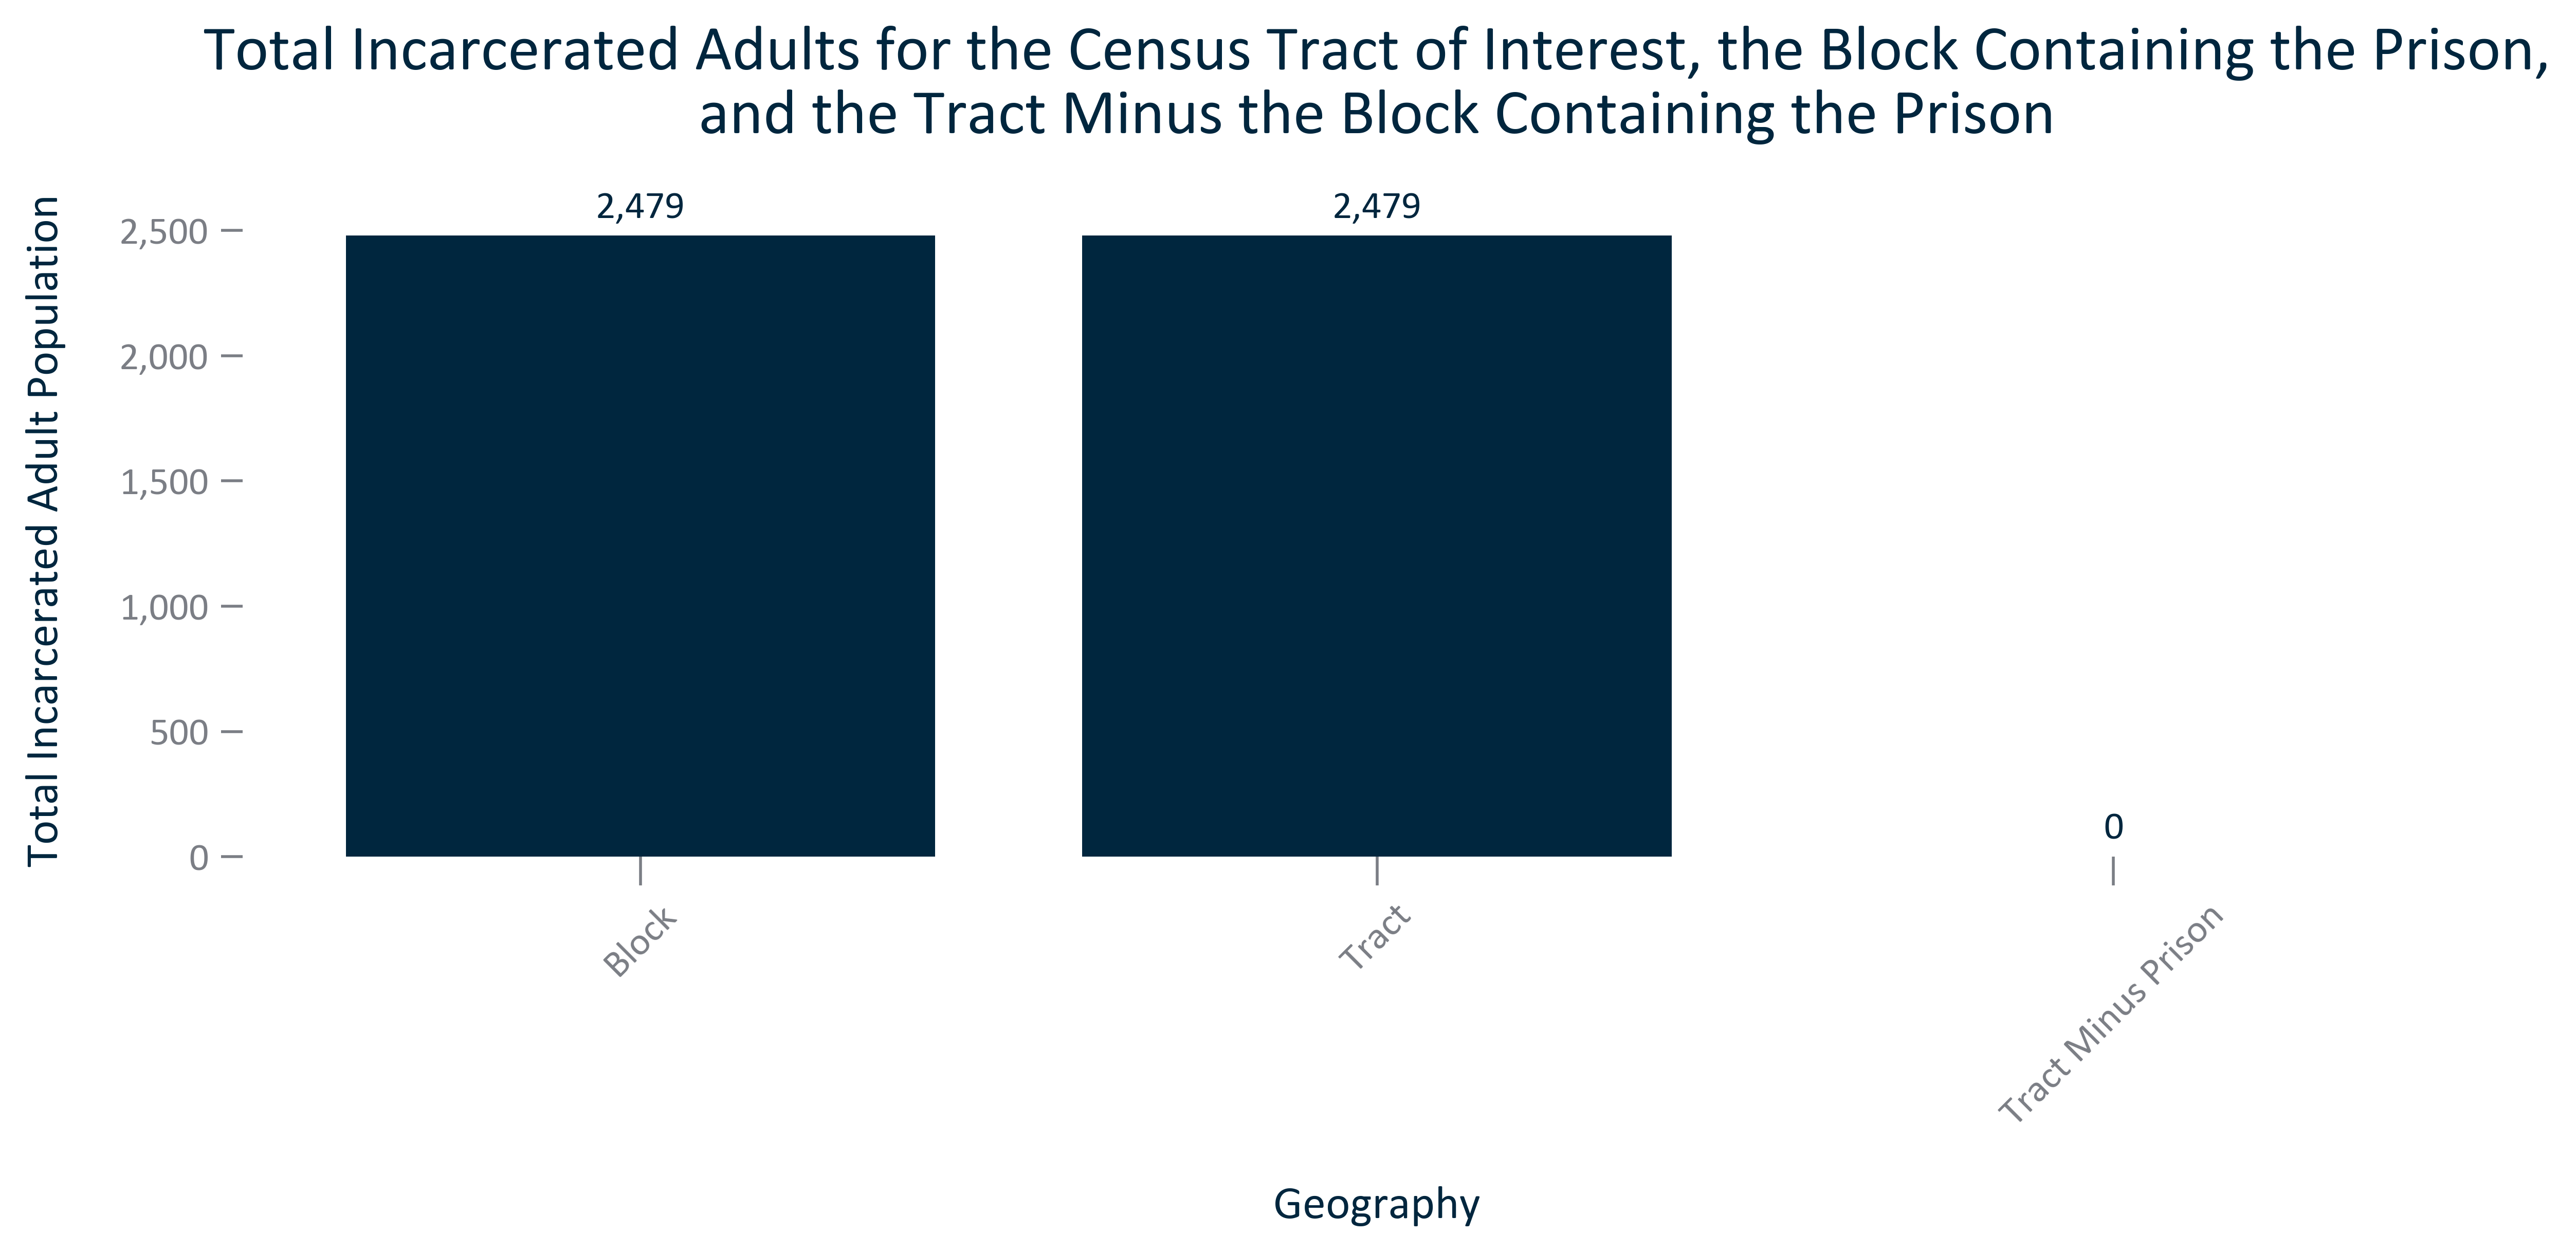

In [138]:
#Total Incarcerated Population for the Three Geographies
title = 'Total Incarcerated Adults for the Census Tract of Interest, the Block Containing the Prison,\nand the Tract Minus the Block Containing the Prison'
df_temp = data
x = df_temp['NAME']
y = df_temp['Group Quarters:Institutionalized, Adults in Correctional Facility']
xlabel = 'Geography'
ylabel = 'Total Incarcerated Adult Population'
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45) #set 
#data labels
singledatalabels(0, 5, "{:,.0f}")
fig.savefig('PortFigs/TractBreakout_IncarceratedAdults.png', bbox_inches='tight')
plt.show()
plt.close();

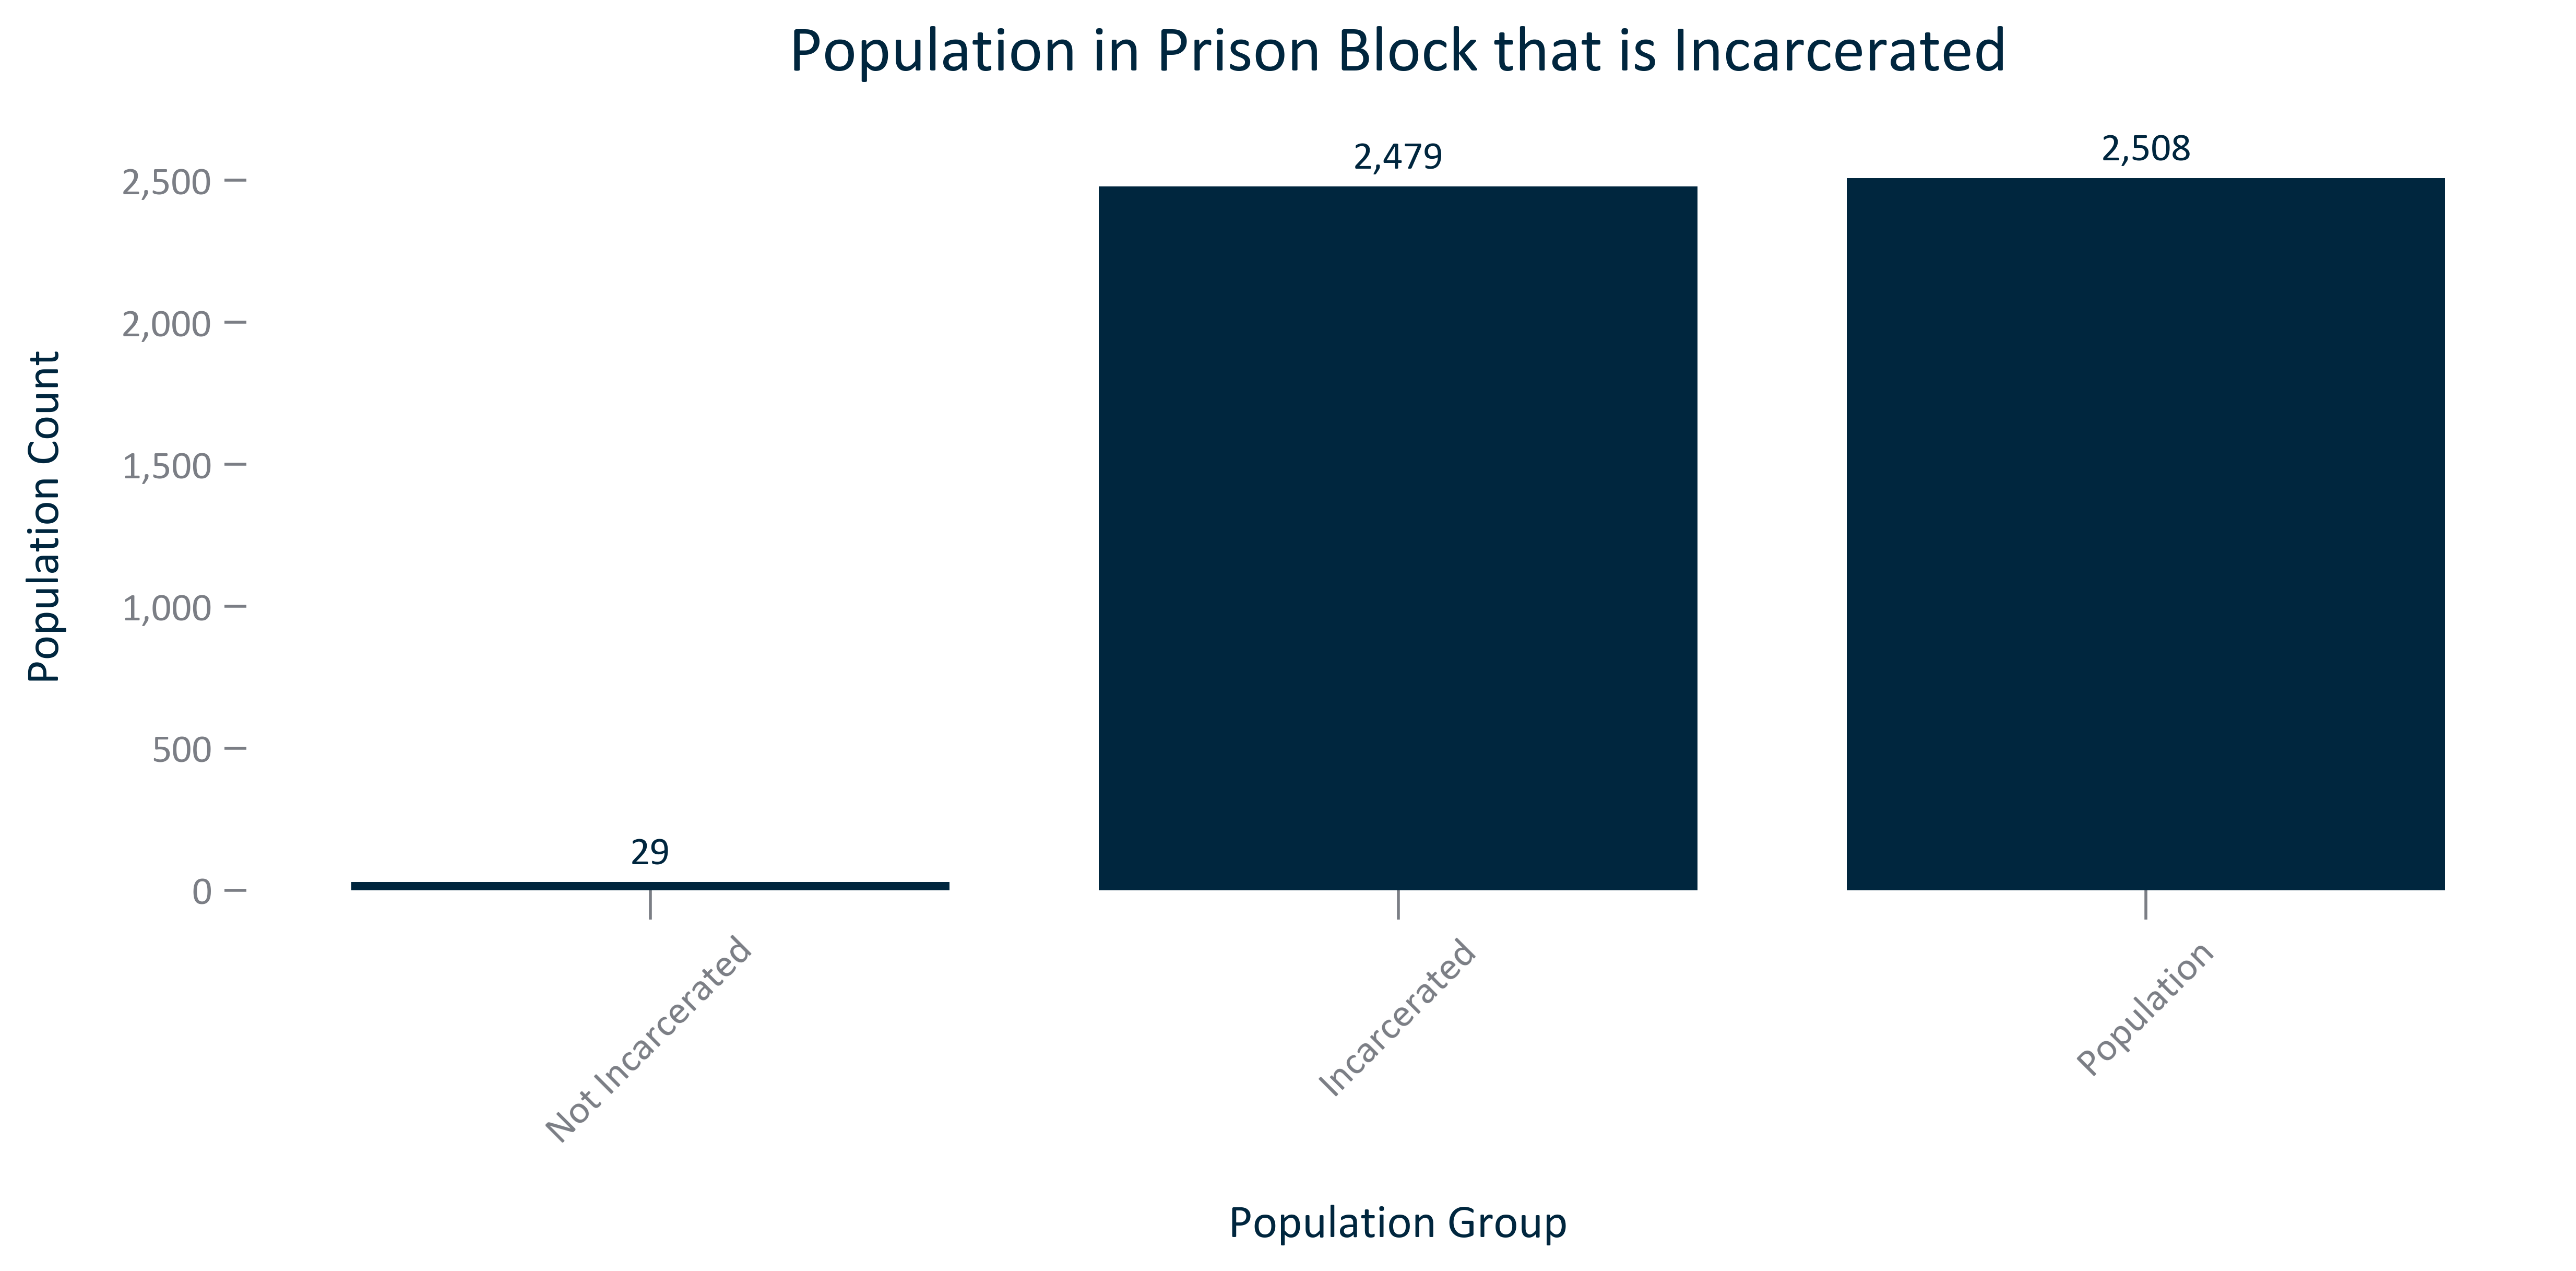

In [139]:
#What are we losing by dropping the block
title = 'Population in Prison Block that is Incarcerated'
df_temp = data.loc[data['NAME'] == 'Block']
df_temp['Population Not Incarcerated Adults'] = df_temp['Population'] - df_temp['Group Quarters:Institutionalized, Adults in Correctional Facility']
df_temp = df_temp[['Population', 'Population Not Incarcerated Adults', 'Group Quarters:Institutionalized, Adults in Correctional Facility']]
df_temp = df_temp.rename(columns = {'Population Not Incarcerated Adults': 'Not Incarcerated', 
                                    'Group Quarters:Institutionalized, Adults in Correctional Facility': 'Incarcerated'})
df_temp = df_temp.melt(var_name = 'Population Group', value_name = 'Population Count')
df_temp = df_temp.sort_values(by = 'Population Count', ascending = True)
x = df_temp['Population Group']
y = df_temp['Population Count']

xlabel = 'Population Group'
ylabel = 'Population Count'
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45) #set 
#data labels
singledatalabels(0, 5, "{:,.0f}")
fig.savefig('PortFigs/TractBreakout_PrisonBlockIncarceratedorNot.png', bbox_inches='tight')
plt.show()
plt.close();

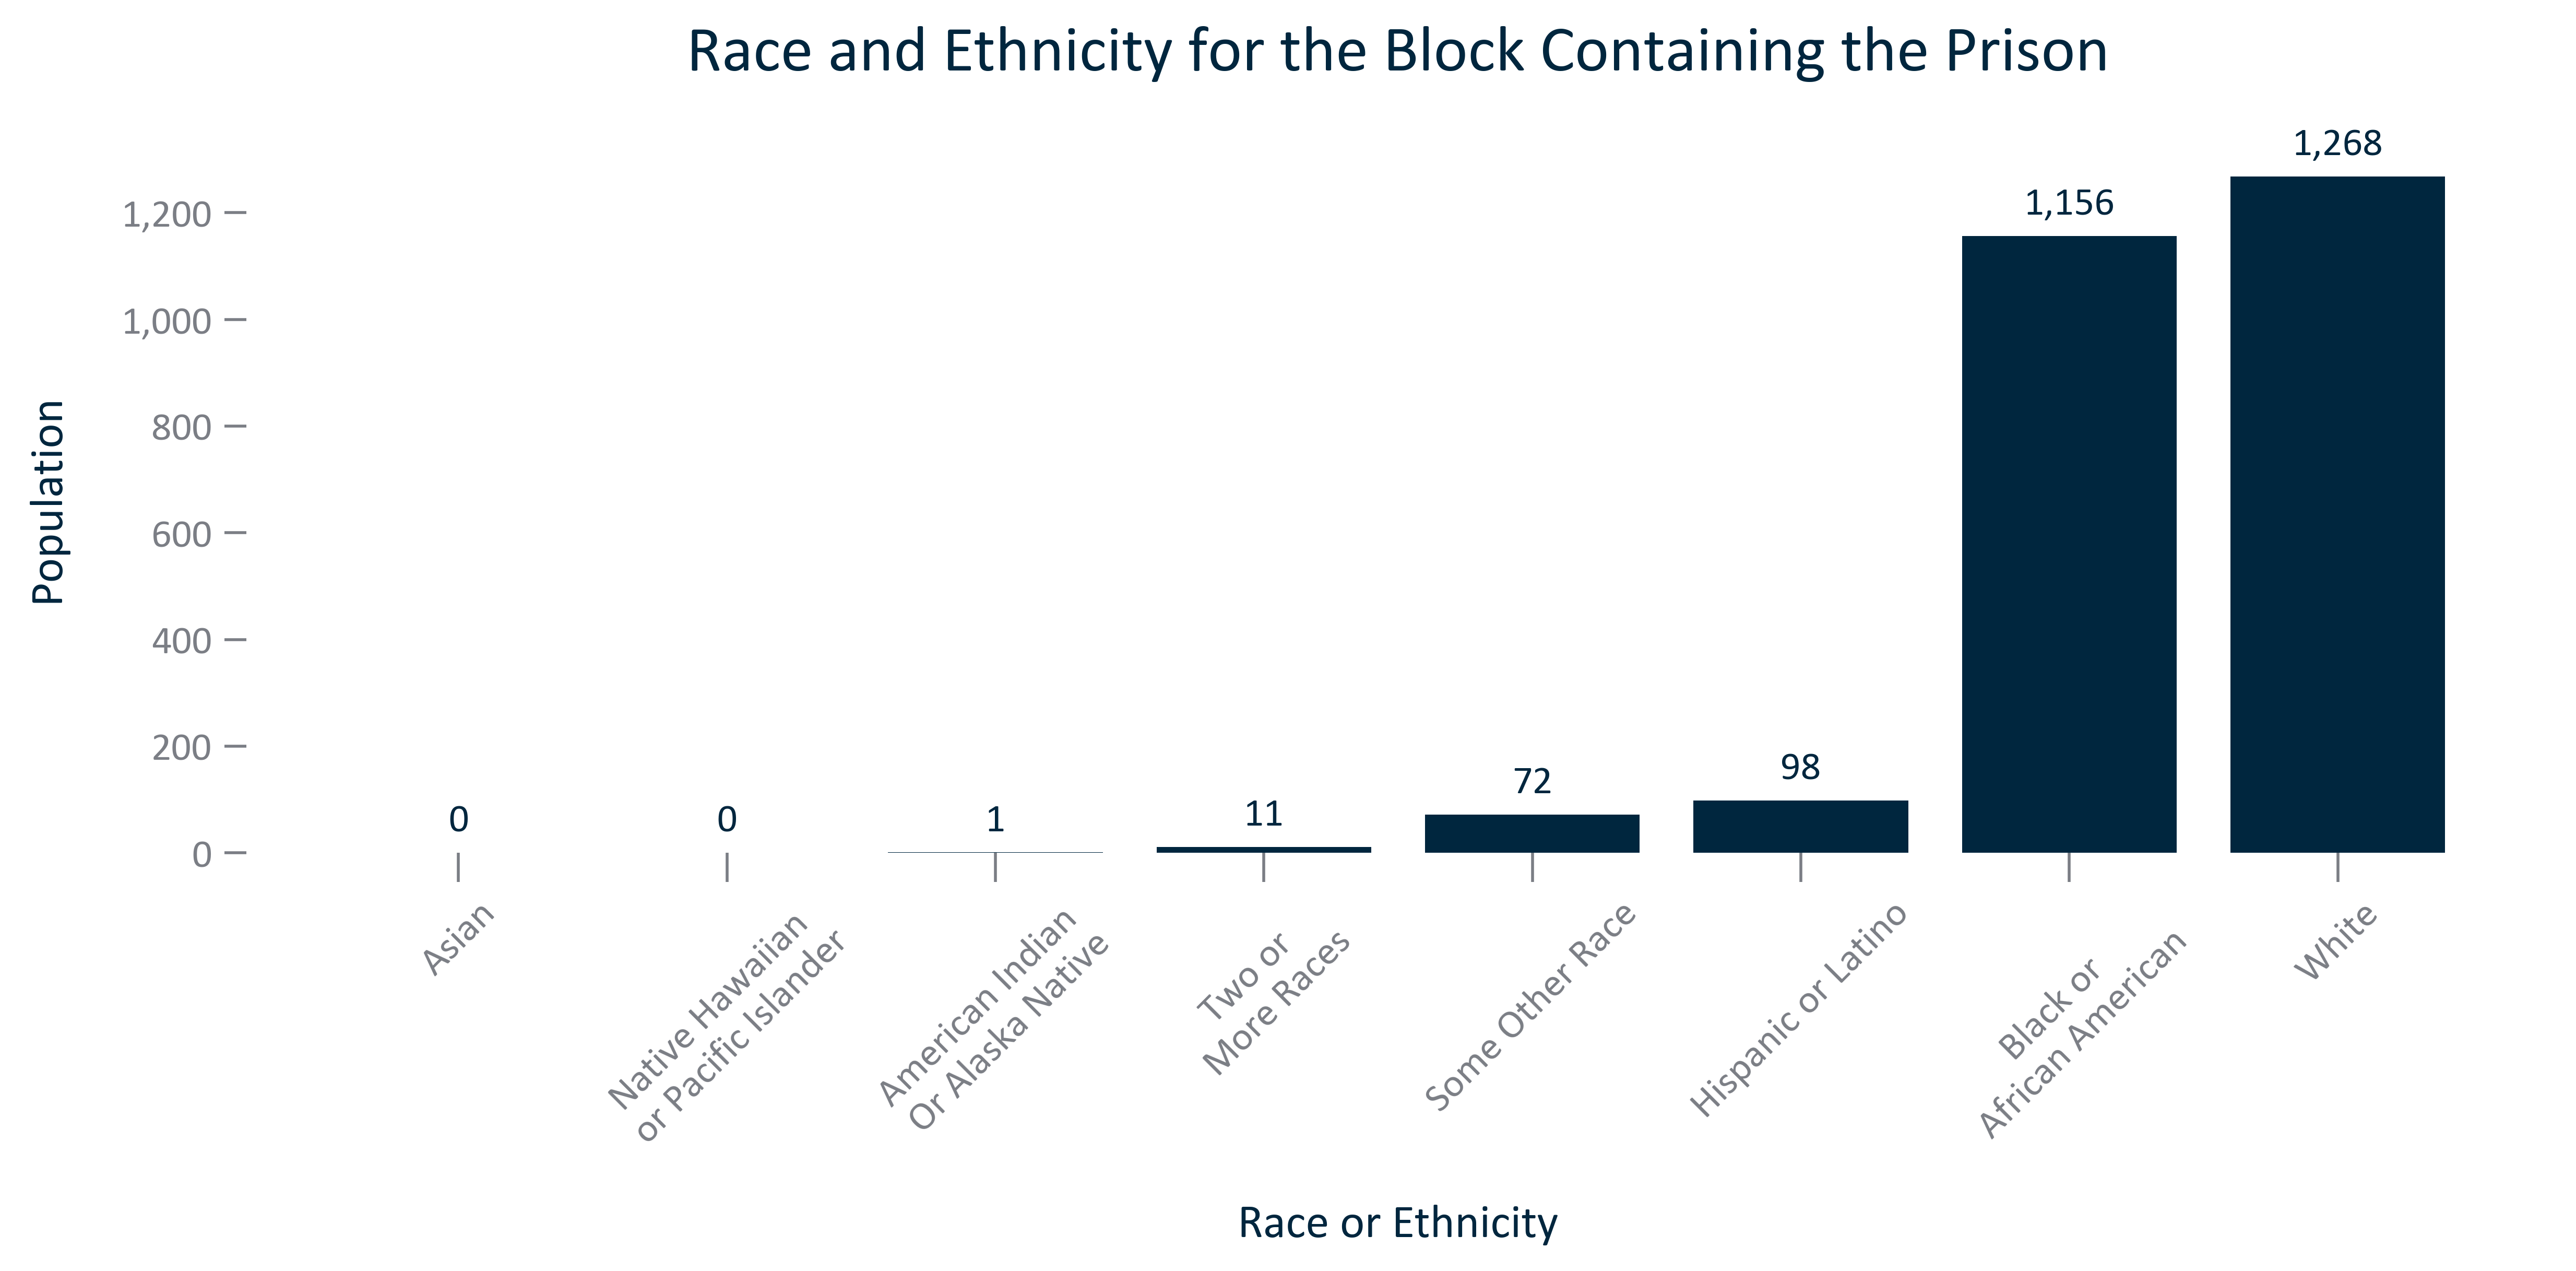

In [140]:
title = 'Race and Ethnicity for the Block Containing the Prison'
df_temp = data.loc[data['NAME'] == 'Block']
df_temp = df_temp[['White Alone', 'Black or African American Alone', 'American Indian Alaska Native Alone', 'Asian Alone', 
                   'Native Hawaiian Other Pacific Islander Alone', 'Some Other Race Alone', 'Two or More Races', 'Hispanic or Latino']]
df_temp = df_temp.rename(columns = {'White Alone': 'White', 'Black or African American Alone':'Black or \nAfrican American', 
                                    'American Indian Alaska Native Alone': 'American Indian \nOr Alaska Native', 'Asian Alone': 'Asian', 
                                    'Native Hawaiian Other Pacific Islander Alone': 'Native Hawaiian \nor Pacific Islander', 
                                    'Some Other Race Alone': 'Some Other Race', 'Two or More Races': 'Two or \nMore Races'})
df_temp = df_temp.melt(var_name = 'Race or Ethnicity', value_name = 'Population')
df_temp = df_temp.sort_values(by = 'Population', ascending = True)
                        
x = df_temp['Race or Ethnicity']
y = df_temp['Population']
xlabel = 'Race or Ethnicity'
ylabel = 'Population'
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 6, "{:,.0f}")
fig.savefig('PortFigs/TractBreakout_RaceEthPrisonBlock.png', bbox_inches='tight')
#display and save
plt.show()
plt.close();

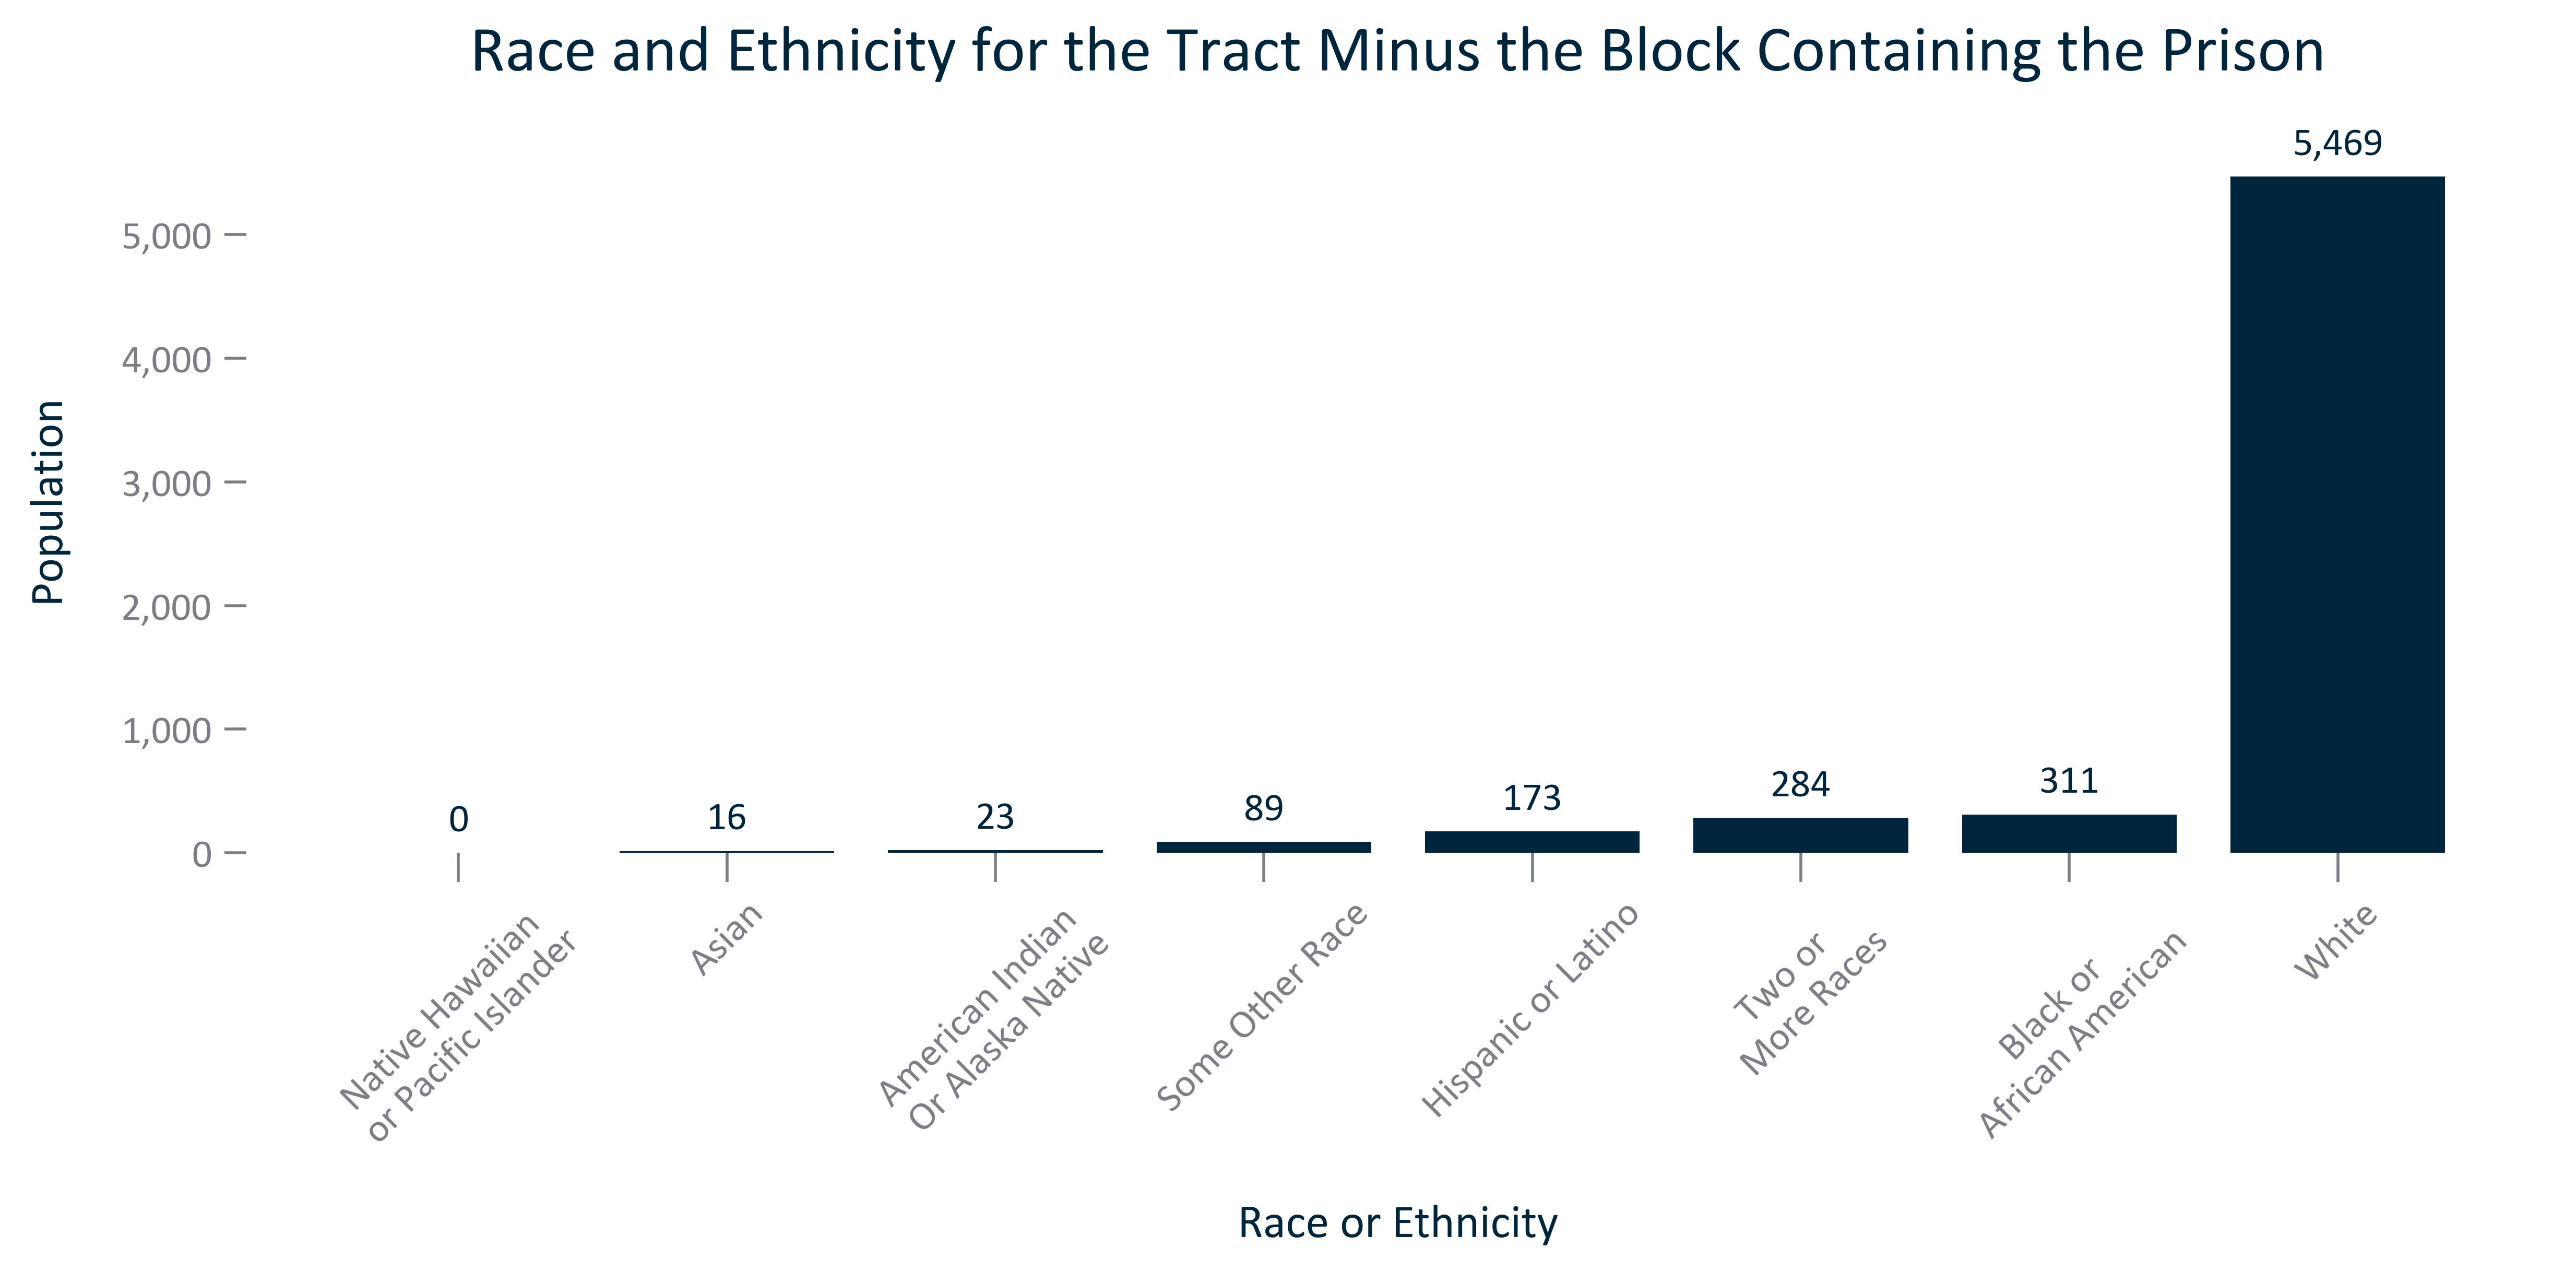

In [141]:
title = 'Race and Ethnicity for the Tract Minus the Block Containing the Prison'
df_temp = data.loc[data['NAME'] == 'Tract Minus Prison']
df_temp = df_temp[['White Alone', 'Black or African American Alone', 'American Indian Alaska Native Alone', 'Asian Alone', 
                   'Native Hawaiian Other Pacific Islander Alone', 'Some Other Race Alone', 'Two or More Races', 'Hispanic or Latino']]
df_temp = df_temp.rename(columns = {'White Alone': 'White', 'Black or African American Alone':'Black or \nAfrican American', 
                                    'American Indian Alaska Native Alone': 'American Indian \nOr Alaska Native', 'Asian Alone': 'Asian', 
                                    'Native Hawaiian Other Pacific Islander Alone': 'Native Hawaiian \nor Pacific Islander', 
                                    'Some Other Race Alone': 'Some Other Race', 'Two or More Races': 'Two or \nMore Races'})
df_temp = df_temp.melt(var_name = 'Race or Ethnicity', value_name = 'Population')
df_temp = df_temp.sort_values(by = 'Population', ascending = True)
                        
x = df_temp['Race or Ethnicity']
y = df_temp['Population']
xlabel = 'Race or Ethnicity'
ylabel = 'Population'
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 6, "{:,.0f}")
fig.savefig('PortFigs/TractBreakout_RaceEthTractMinusPrisonBlock.png', bbox_inches='tight')
#display and save
plt.show()
plt.close();

For this reason I'm using the Tract minus the Block containing the prison as representative of the area.

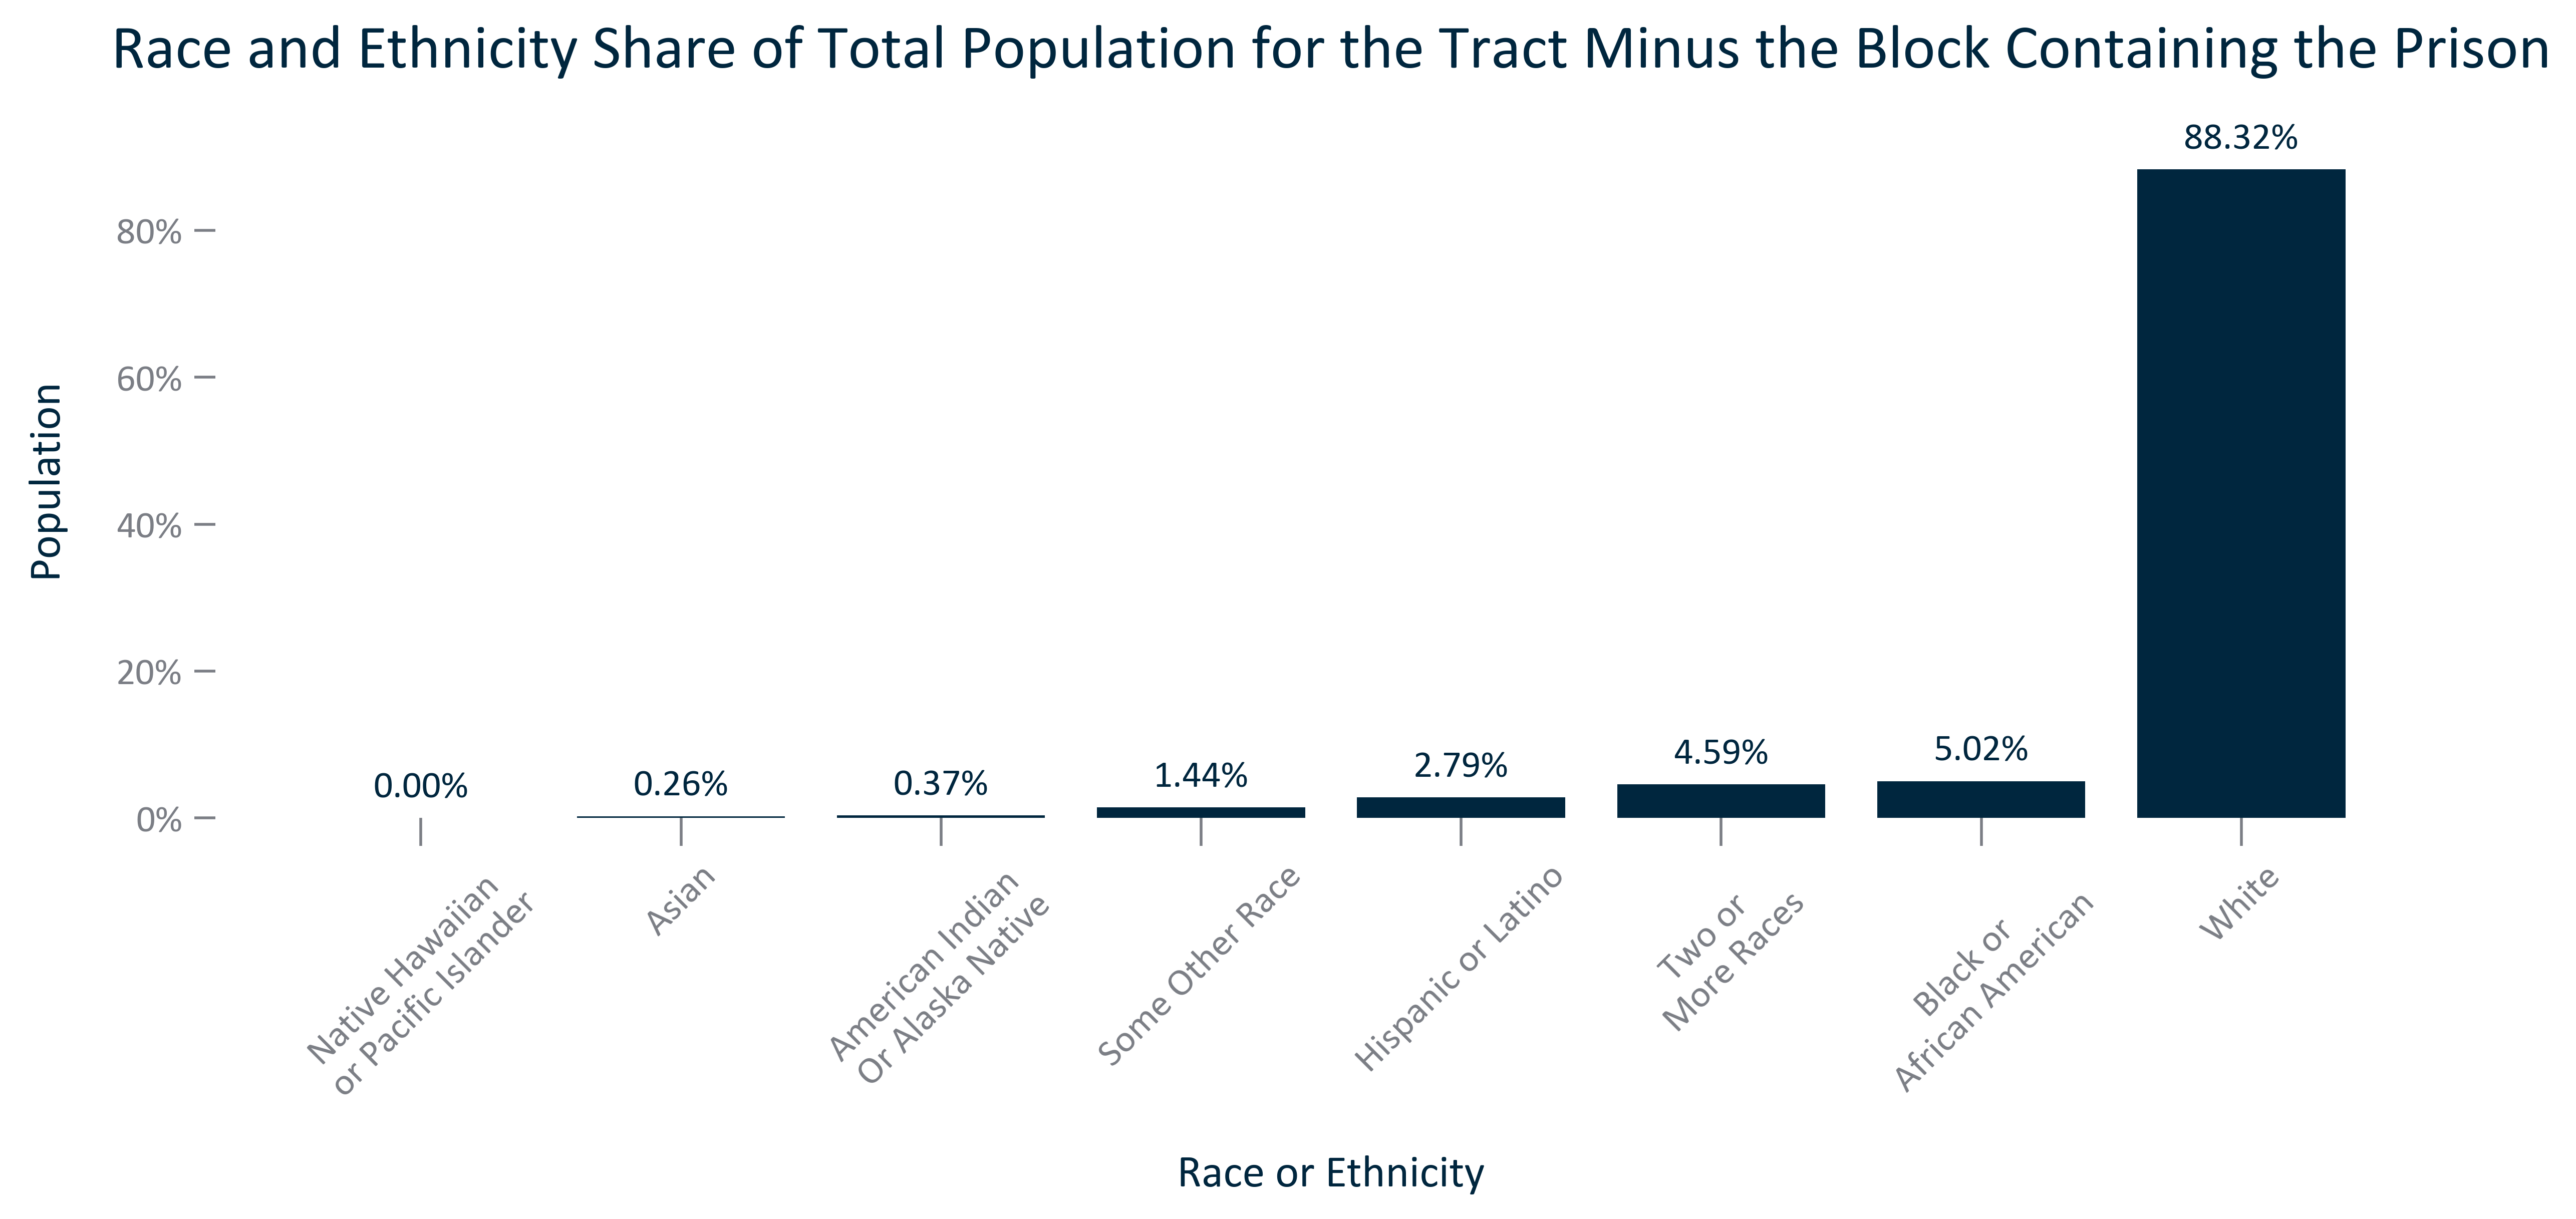

In [155]:
title = 'Race and Ethnicity Share of Total Population for the Tract Minus the Block Containing the Prison'
df_temp = data.loc[data['NAME'] == 'Tract Minus Prison']
df_temp = df_temp[['White Alone %', 'Black or African American Alone %', 'American Indian Alaska Native Alone %', 'Asian Alone %', 
                   'Native Hawaiian Other Pacific Islander Alone %', 'Some Other Race Alone %', 'Two or More Races %', 'Hispanic or Latino %']]
df_temp = df_temp.rename(columns = {'White Alone %': 'White', 'Black or African American Alone %':'Black or \nAfrican American', 
                                    'American Indian Alaska Native Alone %': 'American Indian \nOr Alaska Native', 'Asian Alone %': 'Asian', 
                                    'Native Hawaiian Other Pacific Islander Alone %': 'Native Hawaiian \nor Pacific Islander', 
                                    'Some Other Race Alone %': 'Some Other Race', 'Two or More Races %': 'Two or \nMore Races', 
                                    'Hispanic or Latino %': 'Hispanic or Latino'})
df_temp = df_temp.melt(var_name = 'Race or Ethnicity', value_name = 'Population')
df_temp = df_temp.sort_values(by = 'Population', ascending = True)
                        
x = df_temp['Race or Ethnicity']
y = df_temp['Population']
xlabel = 'Race or Ethnicity'
ylabel = 'Population'
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 6, "{:,.2f}%")
fig.savefig('PortFigs/TractBreakout_RaceEthTractMinusPrisonBlockPercent.png', bbox_inches='tight')
df_temp.to_csv('PortFigs/TractBreakout_RaceEthTractMinusPrisonBlockPercent.csv')
#display and save
plt.show()
plt.close();

In [31]:
cols = ['CountyFIPS', 'CensusTract', 'Language:Population 5 and Older', 'Language:Speak Only English', 'Language%:Speak Only English', 'Language:Speak Spanish',
        'Language%:Speak Spanish', 
        'Language%:Non-English Speak Spanish', 'Language:Spanish:Speak English Very Well', 'Language:Spanish%:Speak English Very Well', 
        'Language:Spanish:Speak English Well', 'Language:Spanish%:Speak English Well', 'Language:Spanish:Speak English Well or Very Well', 
        'Language:Spanish%:Speak English Well or Very Well', 'Language:Spanish:Speak English Not Well', 'Language:Spanish%:Speak English Not Well', 
        'Language:Spanish:Speak English Not At All', 'Language:Spanish%:Speak English Not At All', 'Language:Spanish:Speak English Not Well or At All', 
        'Language:Spanish%:Speak English Not Well or At All', 'Language:Speak Other Indo-European Language', 'Language%:Speak Other Indo-European Language', 
        'Language%:Non-English Speak Other Indo-European Language', 'Language:Other Indo-European:Speak English Very Well', 
        'Language:Other Indo-European%:Speak English Very Well', 'Language:Other Indo-European:Speak English Well', 
        'Language:Other Indo-European%:Speak English Well', 'Language:Other Indo-European:Speak English Well or Very Well', 
        'Language:Other Indo-European%:Speak English Well or Very Well', 'Language:Other Indo-European:Speak English Not Well', 
        'Language:Other Indo-European%:Speak English Not Well', 'Language:Other Indo-European:Speak English Not At All', 
        'Language:Other Indo-European%:Speak English Not At All', 'Language:Other Indo-European:Speak English Not Well or At All', 
        'Language:Other Indo-European%:Speak English Not Well or At All', 'Language:Speak Asian or Pacific Island Language', 
        'Language%:Speak Asian or Pacific Island Language', 'Language%:Non-English Speak Asian or Pacific Island Language', 
        'Language:Asian or Pacific Island:Speak English Very Well', 'Language:Asian or Pacific Island%:Speak English Very Well', 
        'Language:Asian or Pacific Island:Speak English Well', 'Language:Asian or Pacific Island%:Speak English Well', 
        'Language:Asian or Pacific Island:Speak English Well or Very Well', 'Language:Asian or Pacific Island%:Speak English Well or Very Well', 
        'Language:Asian or Pacific Island:Speak English Not Well', 'Language:Asian or Pacific Island%:Speak English Not Well', 
        'Language:Asian or Pacific Island:Speak English Not At All', 'Language:Asian or Pacific Island%:Speak English Not At All', 
        'Language:Asian or Pacific Island:Speak English Not Well or At All', 'Language:Asian or Pacific Island%:Speak English Not Well or At All', 
        'Language:Speak Other Language', 'Language%:Speak Other Language', 'Language%:Non-English Speak Other Language', 'Language:Other:Speak English Very Well', 
        'Language:Other%:Speak English Very Well', 'Language:Other:Speak English Well', 'Language:Other%:Speak English Well', 
        'Language:Other:Speak English Well or Very Well', 'Language:Other%:Speak English Well or Very Well', 'Language:Other:Speak English Not Well', 
        'Language:Other%:Speak English Not Well', 'Language:Other:Speak English Not At All', 'Language:Other%:Speak English Not At All', 
        'Language:Other:Speak English Not Well or At All', 'Language:Other%:Speak English Not Well or At All', 'Language:Speak Language Besides English', 
        'Language%:Speak Language Besides English', 'Language:Language Besides English:Speak English Very Well', 
        'Language%:Language Besides English:Speak English Very Well', 'Language:Language Besides English:Speak English Well', 
        'Language%:Language Besides English:Speak English Well', 'Language:Language Besides English:Speak English Well or Very Well', 
        'Language:Language Besides English%:Speak English Well or Very Well', 'Language:Language Besides English:Speak English Not Well', 
        'Language%:Language Besides English:Speak English Not Well', 'Language:Language Besides English:Speak English Not At All', 
        'Language%:Language Besides English:Speak English Not At All', 'Language:Language Besides English:Speak English Not Well or At All', 
        'Language:Language Besides English%:Speak English Not Well or At All', 'SocialSecurity:Households with Social Security Income', 
        'SocialSecurity%:Households with Social Security Income', 'Median Household Income', 'HHIncome:Total Households', 'HHIncome:Less than 10,000', 
        'HHIncome%:Less than 10,000', 'HHIncome:10 to 14,999', 'HHIncome%:10 to 14,999', 'HHIncome:15 to 19,999', 'HHIncome%:15 to 19,999', 
        'HHIncome:20 to 24,999', 'HHIncome%:20 to 24,999', 'HHIncome:25 to 29,999', 'HHIncome%:25 to 29,999', 'HHIncome:30 to 34,999', 'HHIncome:%30 to 34,999', 
        'HHIncome:35 to 39,999', 'HHIncome%:35 to 39,999', 'HHIncome:40 to 44,999', 'HHIncome%:40 to 44,999', 'HHIncome:45 to 49,999', 'HHIncome%:45 to 49,999', 
        'HHIncome:50 to 59,999', 'HHIncome%:50 to 59,999', 'HHIncome:60 to 74,999', 'HHIncome%:60 to 74,999', 'HHIncome:75 to 99,999', 'HHIncome%:75 to 99,999', 
        'HHIncome:100 to 124,999', 'HHIncome%:100 to 124,999', 'HHIncome:125 to 149,999', 'HHIncome%:125 to 149,999', 'HHIncome:150 to 199,999', 
        'HHIncome%:150 to 199,999', 'HHIncome:200K or More', 'HHIncome%:200K or More', 'Poverty: Population Below Poverty Level', 
        'Poverty%: Below Poverty Level']

In [32]:
tract5 = ACS52021[cols]

In [33]:
tract5 = ACS52021.loc[(ACS52021['CountyFIPS'] == '169') & (ACS52021['CensusTract'] == '090100')]
#tract5 = tract5.drop(columns = ['NAME', 'GEO_ID', 'CountyFIPS']).reset_index(drop = True)
tract5.tail()

NAME                GEO_ID CountyFIPS CensusTract  Population ACS  HealthCoverage:Total Series  \
1551  Census Tract 901, Trousdale County, Tennessee  1400000US47169090100        169      090100          8412.0                       6461.0   

      HealthCoverage:None  HealthCoverage%: None  HealthCoverage: With Healthcare Coverage  HealthCoverage%: With Healthcare Coverage  \
1551                629.0               9.735335                                    5832.0                                  90.264665   

      HealthCoverage: With Public Healthcare Coverage  HealthCoverage%: With Public Healthcare Coverage  \
1551                                           2420.0                                         41.495199   

      HealthCoverage: With Private Healthcare Coverage  HealthCoverage%: With Private Healthcare Coverage  Male Under 5  Female Under 5  \
1551                                            4204.0                                          72.085048         396.0           109.0   

      Male 5 to 9  Female 5 to 9  Male 5 to 14  Female 5 to 14  Male 15 to 24  Female 15 to 24  Male 10 to 14  Female 10 to 14  Male 15 to 17  \
1551        181.0          196.0         337.0           273.0         1082.0            153.0          156.0             77.0           96.0   

      Female 15 to 17  Male 18 to 24  Female 18 to 24  Male 25 to 34  Female 25 to 34  Male 35 to 44  Female 35 to 44  Male 45 to 54  \
1551             40.0          986.0            113.0         1359.0            645.0          883.0            301.0          586.0   

      Female 45 to 54  Male 55 to 64  Female 55 to 64  Male 65 to 74  Female 65 to 74  Male 75 to 84  Female 75 to 84  Male 85 and Older  \
1551            429.0          429.0            457.0          314.0            317.0          123.0            207.0               12.0   

      Female 85 and Older  Age:Under 5  Age %:Under 5  Age:5 to 9  Age%:5 to 9  Age:10 to 14  Age%:10 to 14  Age:15 to 17  Age%:15 to 17  \
1551                  0.0        505.0       6.003329       377.0     4.481693         233.0       2.769853         136.0       1.616738   

      Age:18 to 24  Age%:18 to 24  Age:25 to 34  Age%:25 to 34  Age:35 to 44  Age%:35 to 44  Age:45 to 54  Age%:45 to 54  Age:55 to 64  \
1551        1099.0       13.06467        2004.0       23.82311        1184.0      14.075131        1312.0      15.596767         886.0   

      Age%:55 to 64  Age:65 to 74  Age%:65 to 74  Age:75 to 84  Age%:75 to 84  Age:85 and Older  Age%:85 and Older  Age:School Age 5 to 18  \
1551      10.532573         631.0       7.501189         330.0       3.922967              12.0           0.142653                   746.0   

      Age%:School Age 5 to 18  Age:Under 18  Age%:Under 18  Age:18 to 54  Age%:18 to 54  Age:18 to 64  Age%:18 to 64  Age:55 and Older  \
1551                 8.868283        1251.0      14.871612        5302.0      63.029006        6188.0      73.561579            1859.0   

      Age%:55 and Older  Age:65 and Older  Age%:65 and Older  Total Households  Family Households  Family Households: Married Couple Family  \
1551          22.099382             973.0          11.566809            2533.0             1669.0                                    1438.0   

      Household Type%: Family, Married Couple Households  Family Households: Not Married Couple Family  \
1551                                          61.400512                                          231.0   

      Household Type%: Family, Not Married Couple Households  Family Households: Not Married Couple: Male no Spouse  \
1551                                           9.863365                                                   151.0       

      Family Households: Not Married Couple: Female no Spouse  Nonfamily Households  Nonfamily Households: Householder Alone  \
1551                                               80.0                       673.0                                    636.0   

      Household Type%: Non

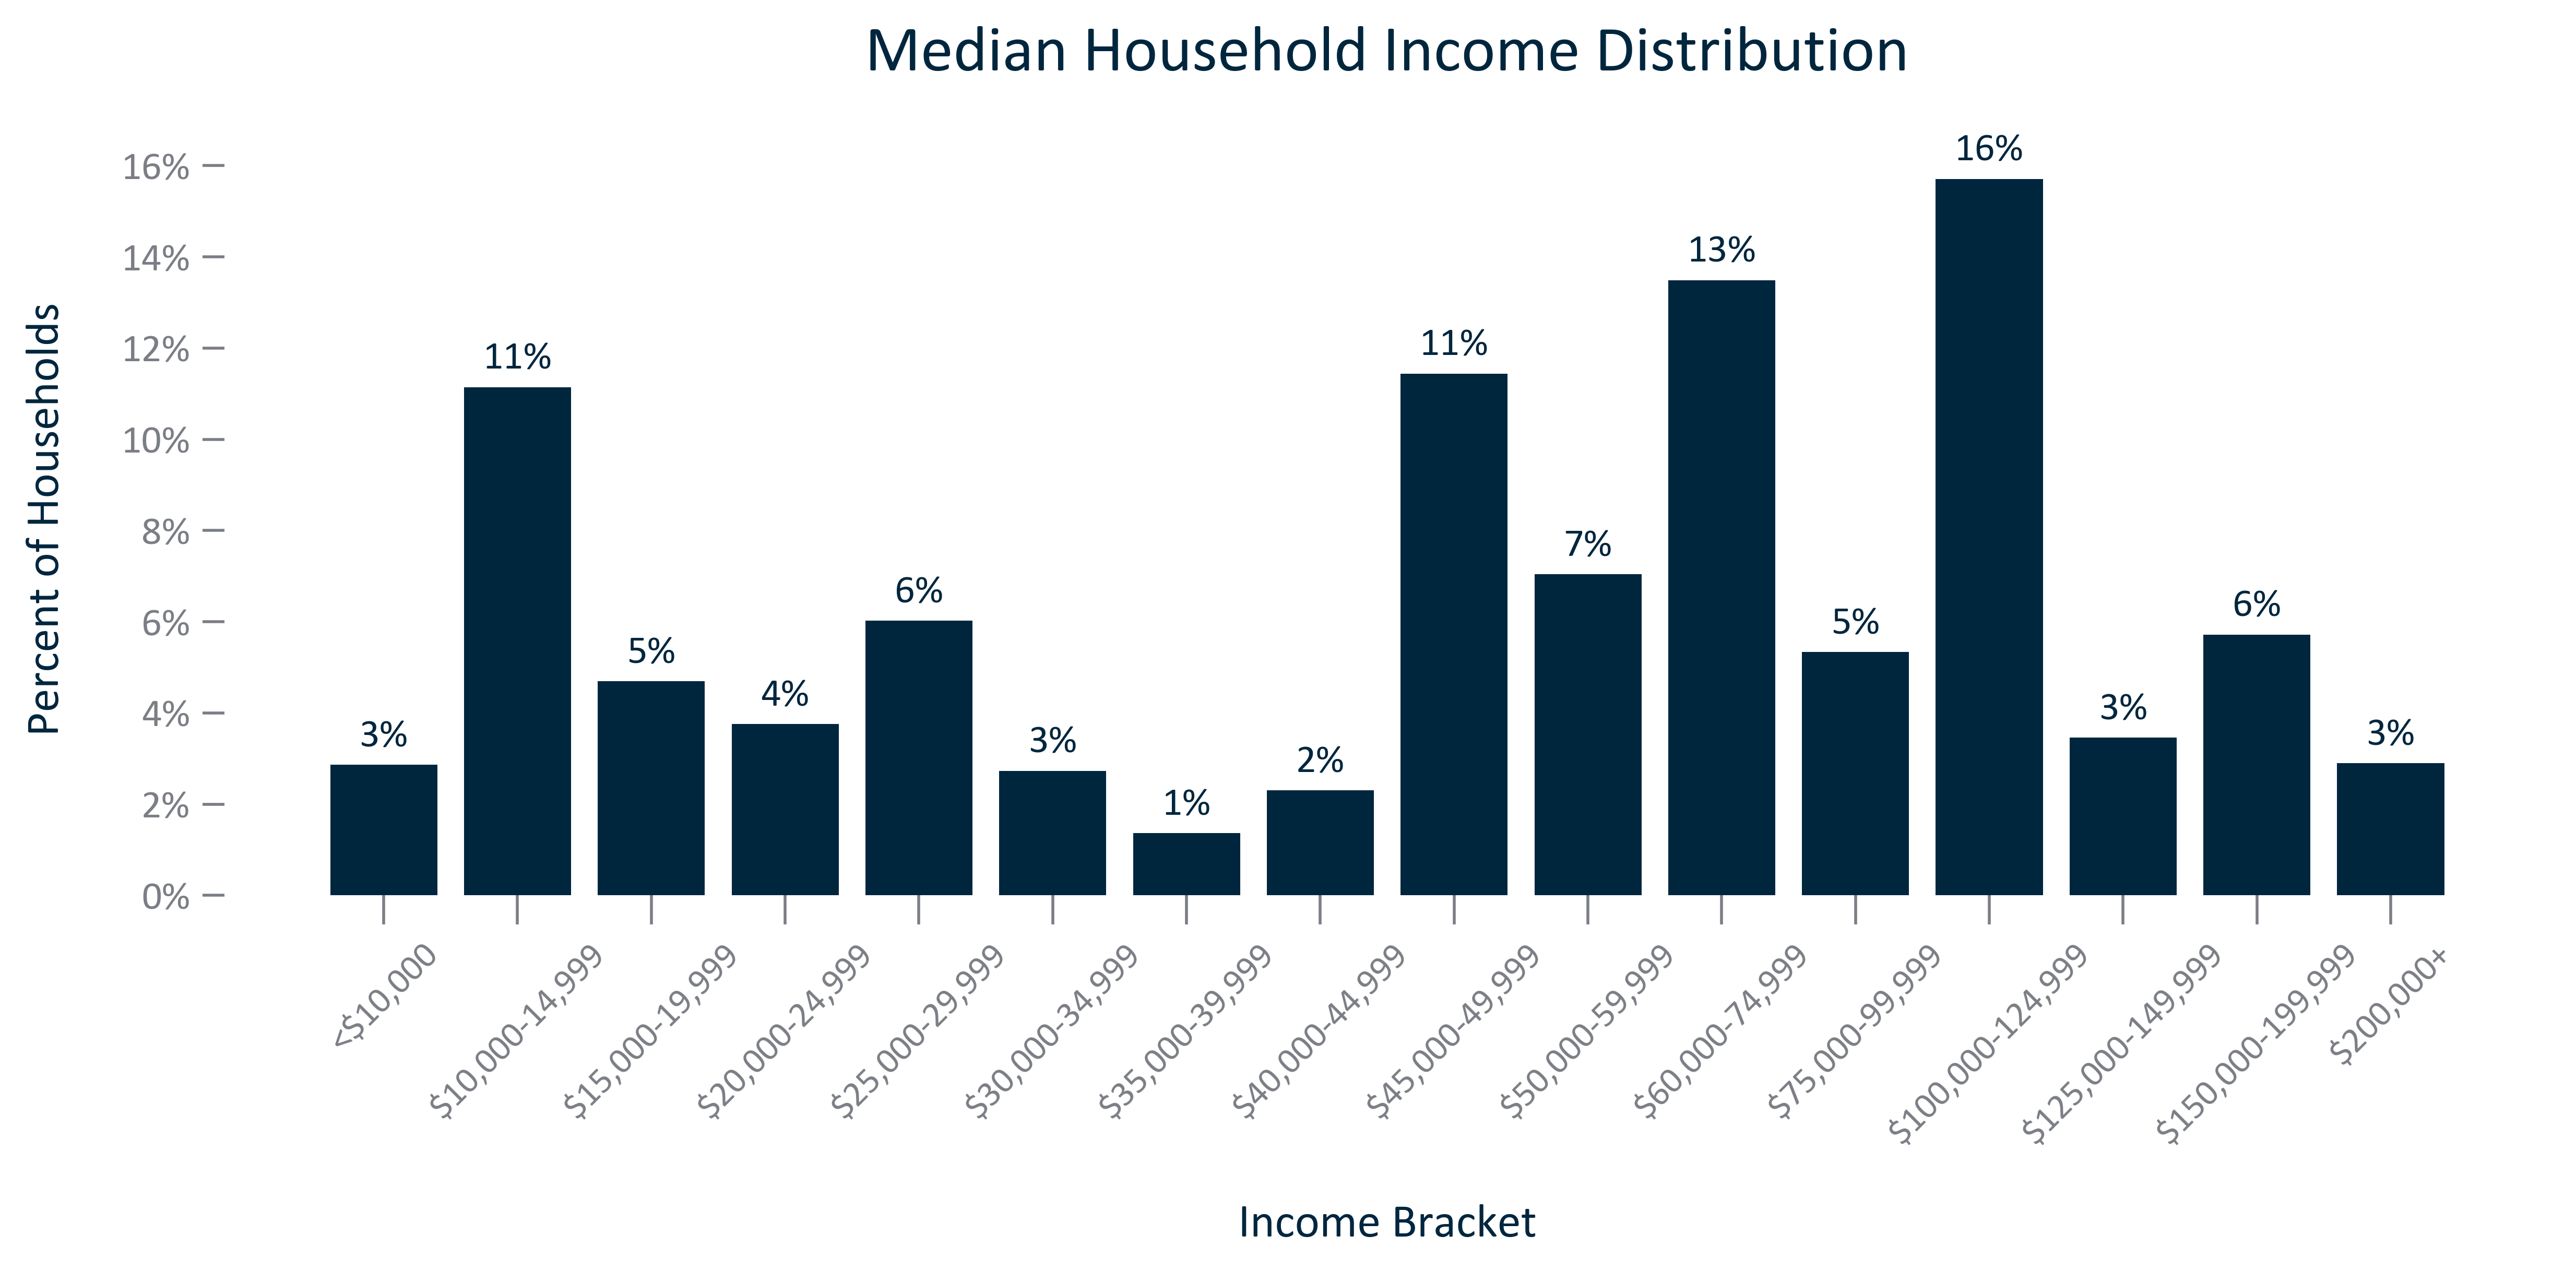

In [156]:
title = "Median Household Income Distribution"
#create temporary dataframe
df_temp = tract5[['HHIncome%:Less than 10,000', 'HHIncome%:10 to 14,999', 'HHIncome%:15 to 19,999', 'HHIncome%:20 to 24,999', 
                   'HHIncome%:25 to 29,999', 'HHIncome:%30 to 34,999', 'HHIncome%:35 to 39,999', 'HHIncome%:40 to 44,999', 
                   'HHIncome%:45 to 49,999', 'HHIncome%:50 to 59,999', 'HHIncome%:60 to 74,999', 'HHIncome%:75 to 99,999', 
                   'HHIncome%:100 to 124,999', 'HHIncome%:125 to 149,999', 'HHIncome%:150 to 199,999', 'HHIncome%:200K or More']]
df_temp = df_temp.rename(columns = {'HHIncome%:Less than 10,000': "<$10,000", 'HHIncome%:10 to 14,999': '$10,000-14,999', 
                                    'HHIncome%:15 to 19,999': '$15,000-19,999', 'HHIncome%:20 to 24,999': '$20,000-24,999', 
                                    'HHIncome%:25 to 29,999': '$25,000-29,999', 'HHIncome:%30 to 34,999': '$30,000-34,999', 
                                    'HHIncome%:35 to 39,999': '$35,000-39,999', 'HHIncome%:40 to 44,999': '$40,000-44,999', 
                                    'HHIncome%:45 to 49,999': '$45,000-49,999', 'HHIncome%:50 to 59,999': '$50,000-59,999', 
                                    'HHIncome%:60 to 74,999': '$60,000-74,999', 'HHIncome%:75 to 99,999': '$75,000-99,999', 
                                    'HHIncome%:100 to 124,999': '$100,000-124,999','HHIncome%:125 to 149,999': '$125,000-149,999', 
                                    'HHIncome%:150 to 199,999': '$150,000-199,999', 'HHIncome%:200K or More': '$200,000+'})
df_temp = df_temp.transpose().reset_index(drop = False).rename(columns = {'index':'Income Bracket', 1551:'Percent of Households'})
#initiate figure and set parameters
xinput = 'Income Bracket'
yinput = 'Percent of Households'
x = df_temp[xinput]
y = df_temp[yinput]
xlabel = xinput
ylabel = yinput
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', labelsize = SMALLER_SIZE, rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}%")
fig.savefig('PortFigs/Tract_HHIncomeDistribution.png', bbox_inches='tight')
df_temp.to_csv('PortFigs/Tract_HHIncomeDistribution.csv')
plt.show()
plt.close();

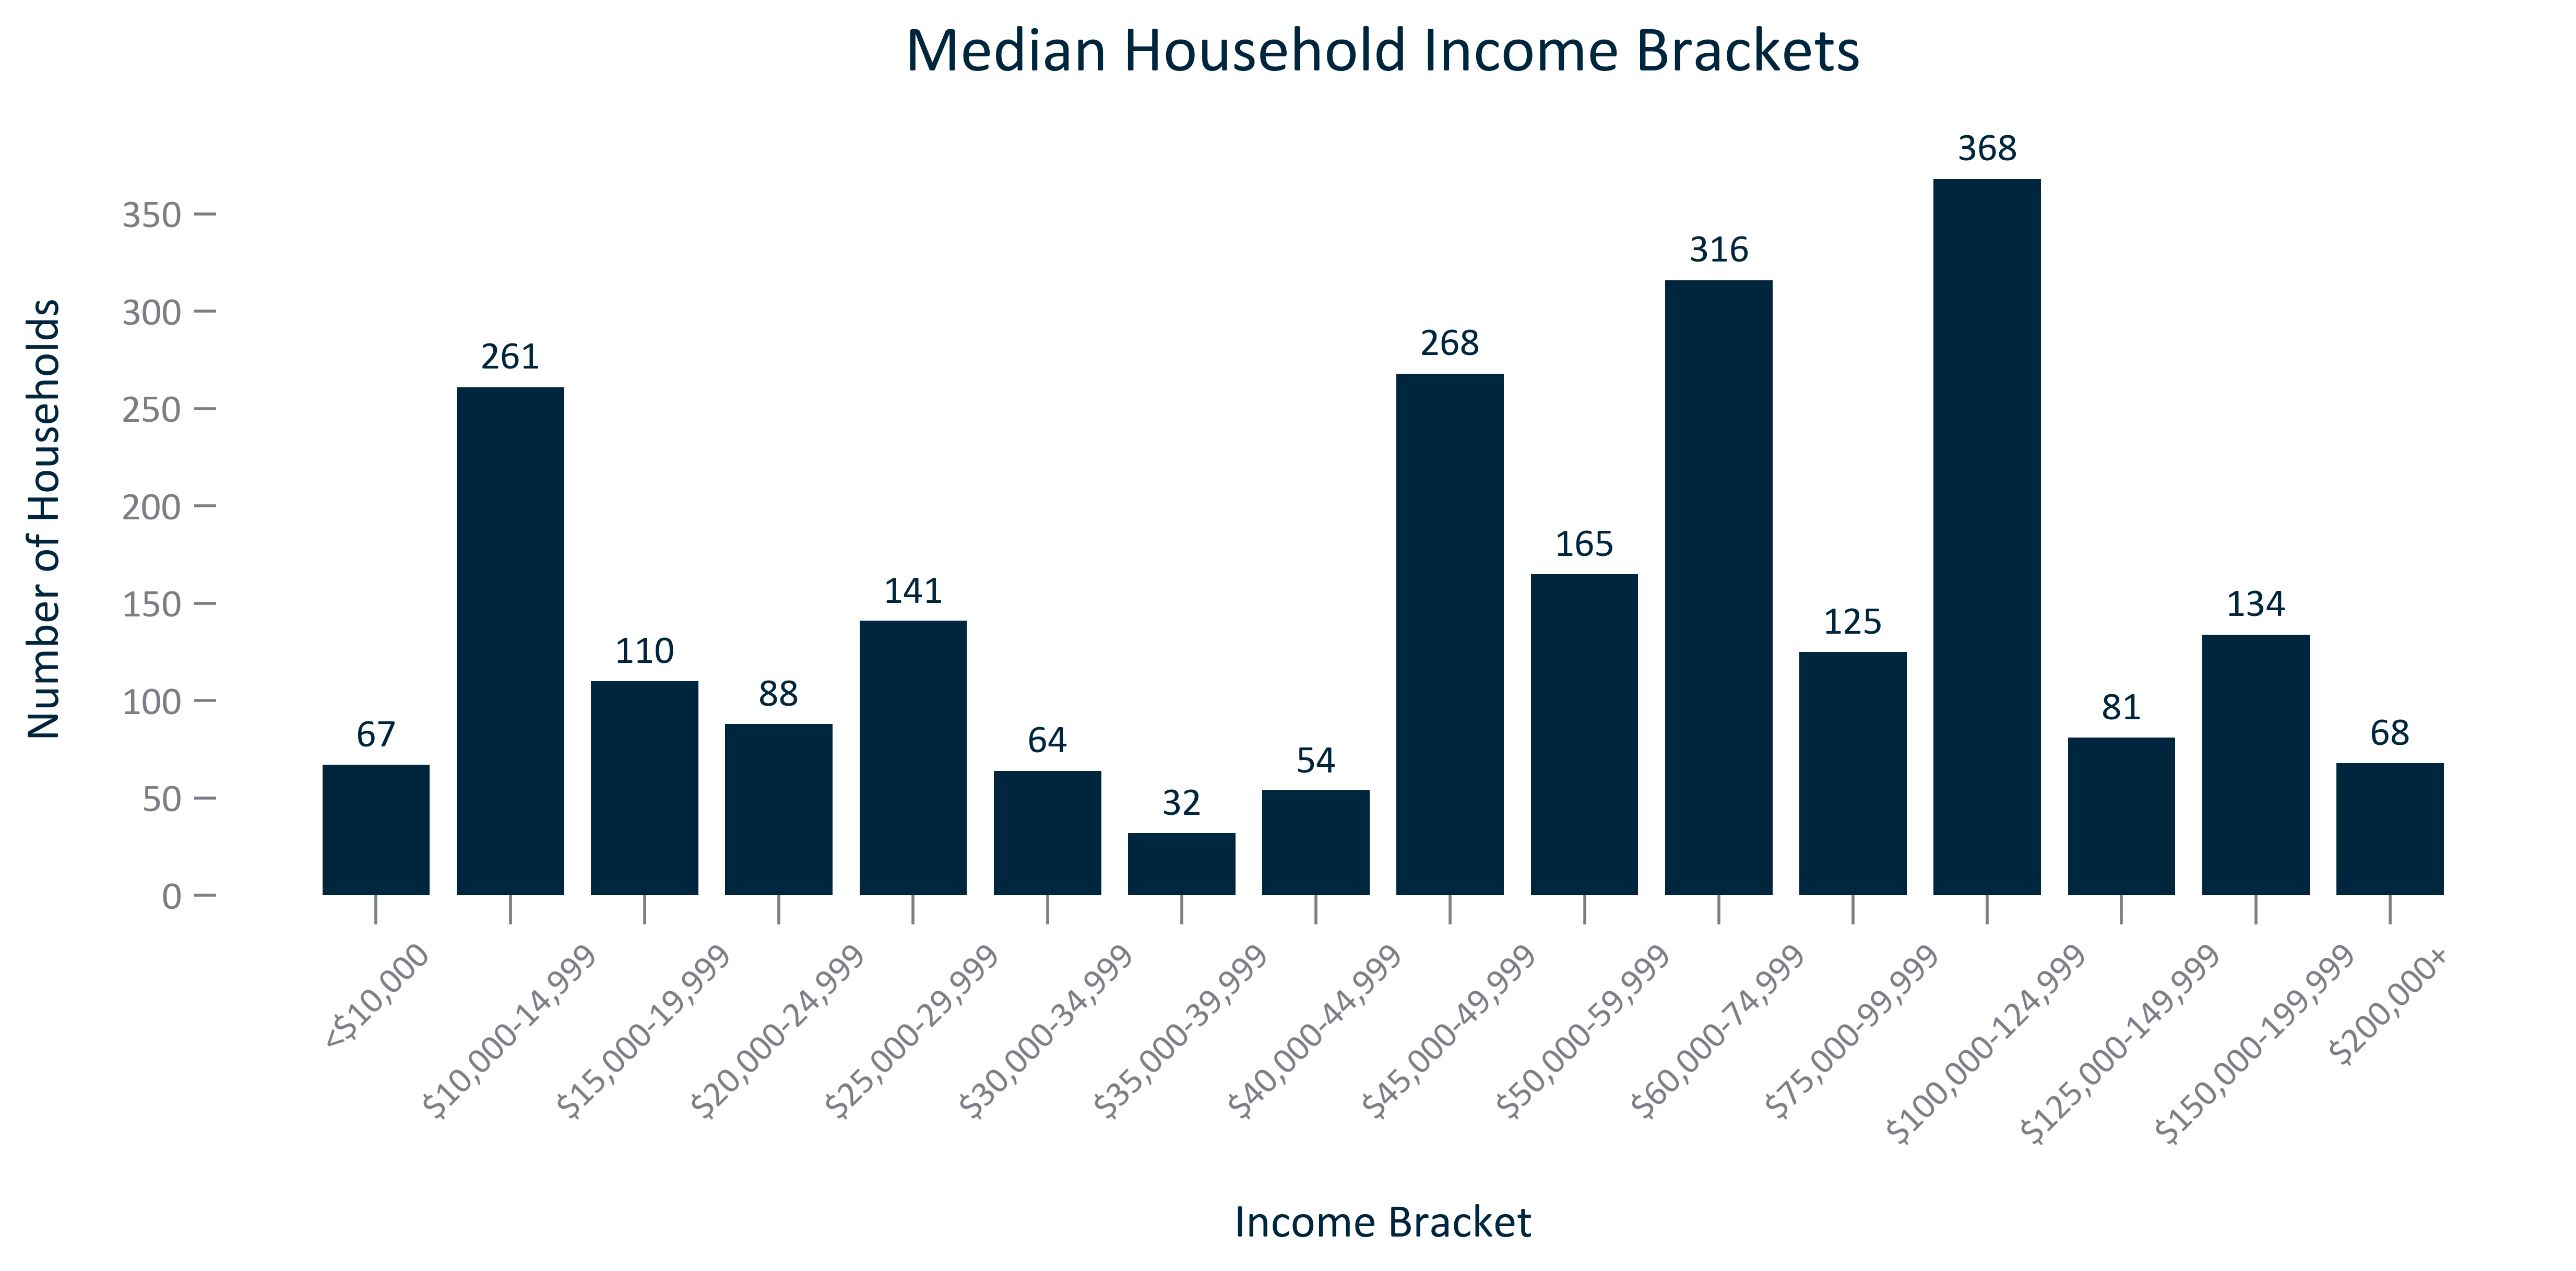

In [158]:
title = "Median Household Income Brackets"
#create temporary dataframe
df_temp = tract5[['HHIncome:Less than 10,000', 'HHIncome:10 to 14,999', 'HHIncome:15 to 19,999', 'HHIncome:20 to 24,999', 
                   'HHIncome:25 to 29,999', 'HHIncome:30 to 34,999', 'HHIncome:35 to 39,999', 'HHIncome:40 to 44,999', 
                   'HHIncome:45 to 49,999', 'HHIncome:50 to 59,999', 'HHIncome:60 to 74,999', 'HHIncome:75 to 99,999', 
                   'HHIncome:100 to 124,999', 'HHIncome:125 to 149,999', 'HHIncome:150 to 199,999', 'HHIncome:200K or More']]
df_temp = df_temp.rename(columns = {'HHIncome:Less than 10,000': "<$10,000", 'HHIncome:10 to 14,999': '$10,000-14,999', 
                                    'HHIncome:15 to 19,999': '$15,000-19,999', 'HHIncome:20 to 24,999': '$20,000-24,999', 
                                    'HHIncome:25 to 29,999': '$25,000-29,999', 'HHIncome:30 to 34,999': '$30,000-34,999', 
                                    'HHIncome:35 to 39,999': '$35,000-39,999', 'HHIncome:40 to 44,999': '$40,000-44,999', 
                                    'HHIncome:45 to 49,999': '$45,000-49,999', 'HHIncome:50 to 59,999': '$50,000-59,999', 
                                    'HHIncome:60 to 74,999': '$60,000-74,999', 'HHIncome:75 to 99,999': '$75,000-99,999', 
                                    'HHIncome:100 to 124,999': '$100,000-124,999','HHIncome:125 to 149,999': '$125,000-149,999', 
                                    'HHIncome:150 to 199,999': '$150,000-199,999', 'HHIncome:200K or More': '$200,000+'})
df_temp = df_temp.transpose().reset_index(drop = False).rename(columns = {'index':'Income Bracket', 1551:'Number of Households'})
#initiate figure and set parameters
xinput = 'Income Bracket'
yinput = 'Number of Households'
x = df_temp[xinput]
y = df_temp[yinput]
xlabel = xinput
ylabel = yinput
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', labelsize = SMALLER_SIZE, rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}")
fig.savefig('PortFigs/Tract_HHIncomeBrackets.png', bbox_inches='tight')
df_temp.to_csv('PortFigs/Tract_HHIncomeBrackets.csv')
plt.show()
plt.close();

C:\Users\jmccall\AppData\Local\Temp\ipykernel_14028\2510085830.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp = df_temp3.append(dfs)


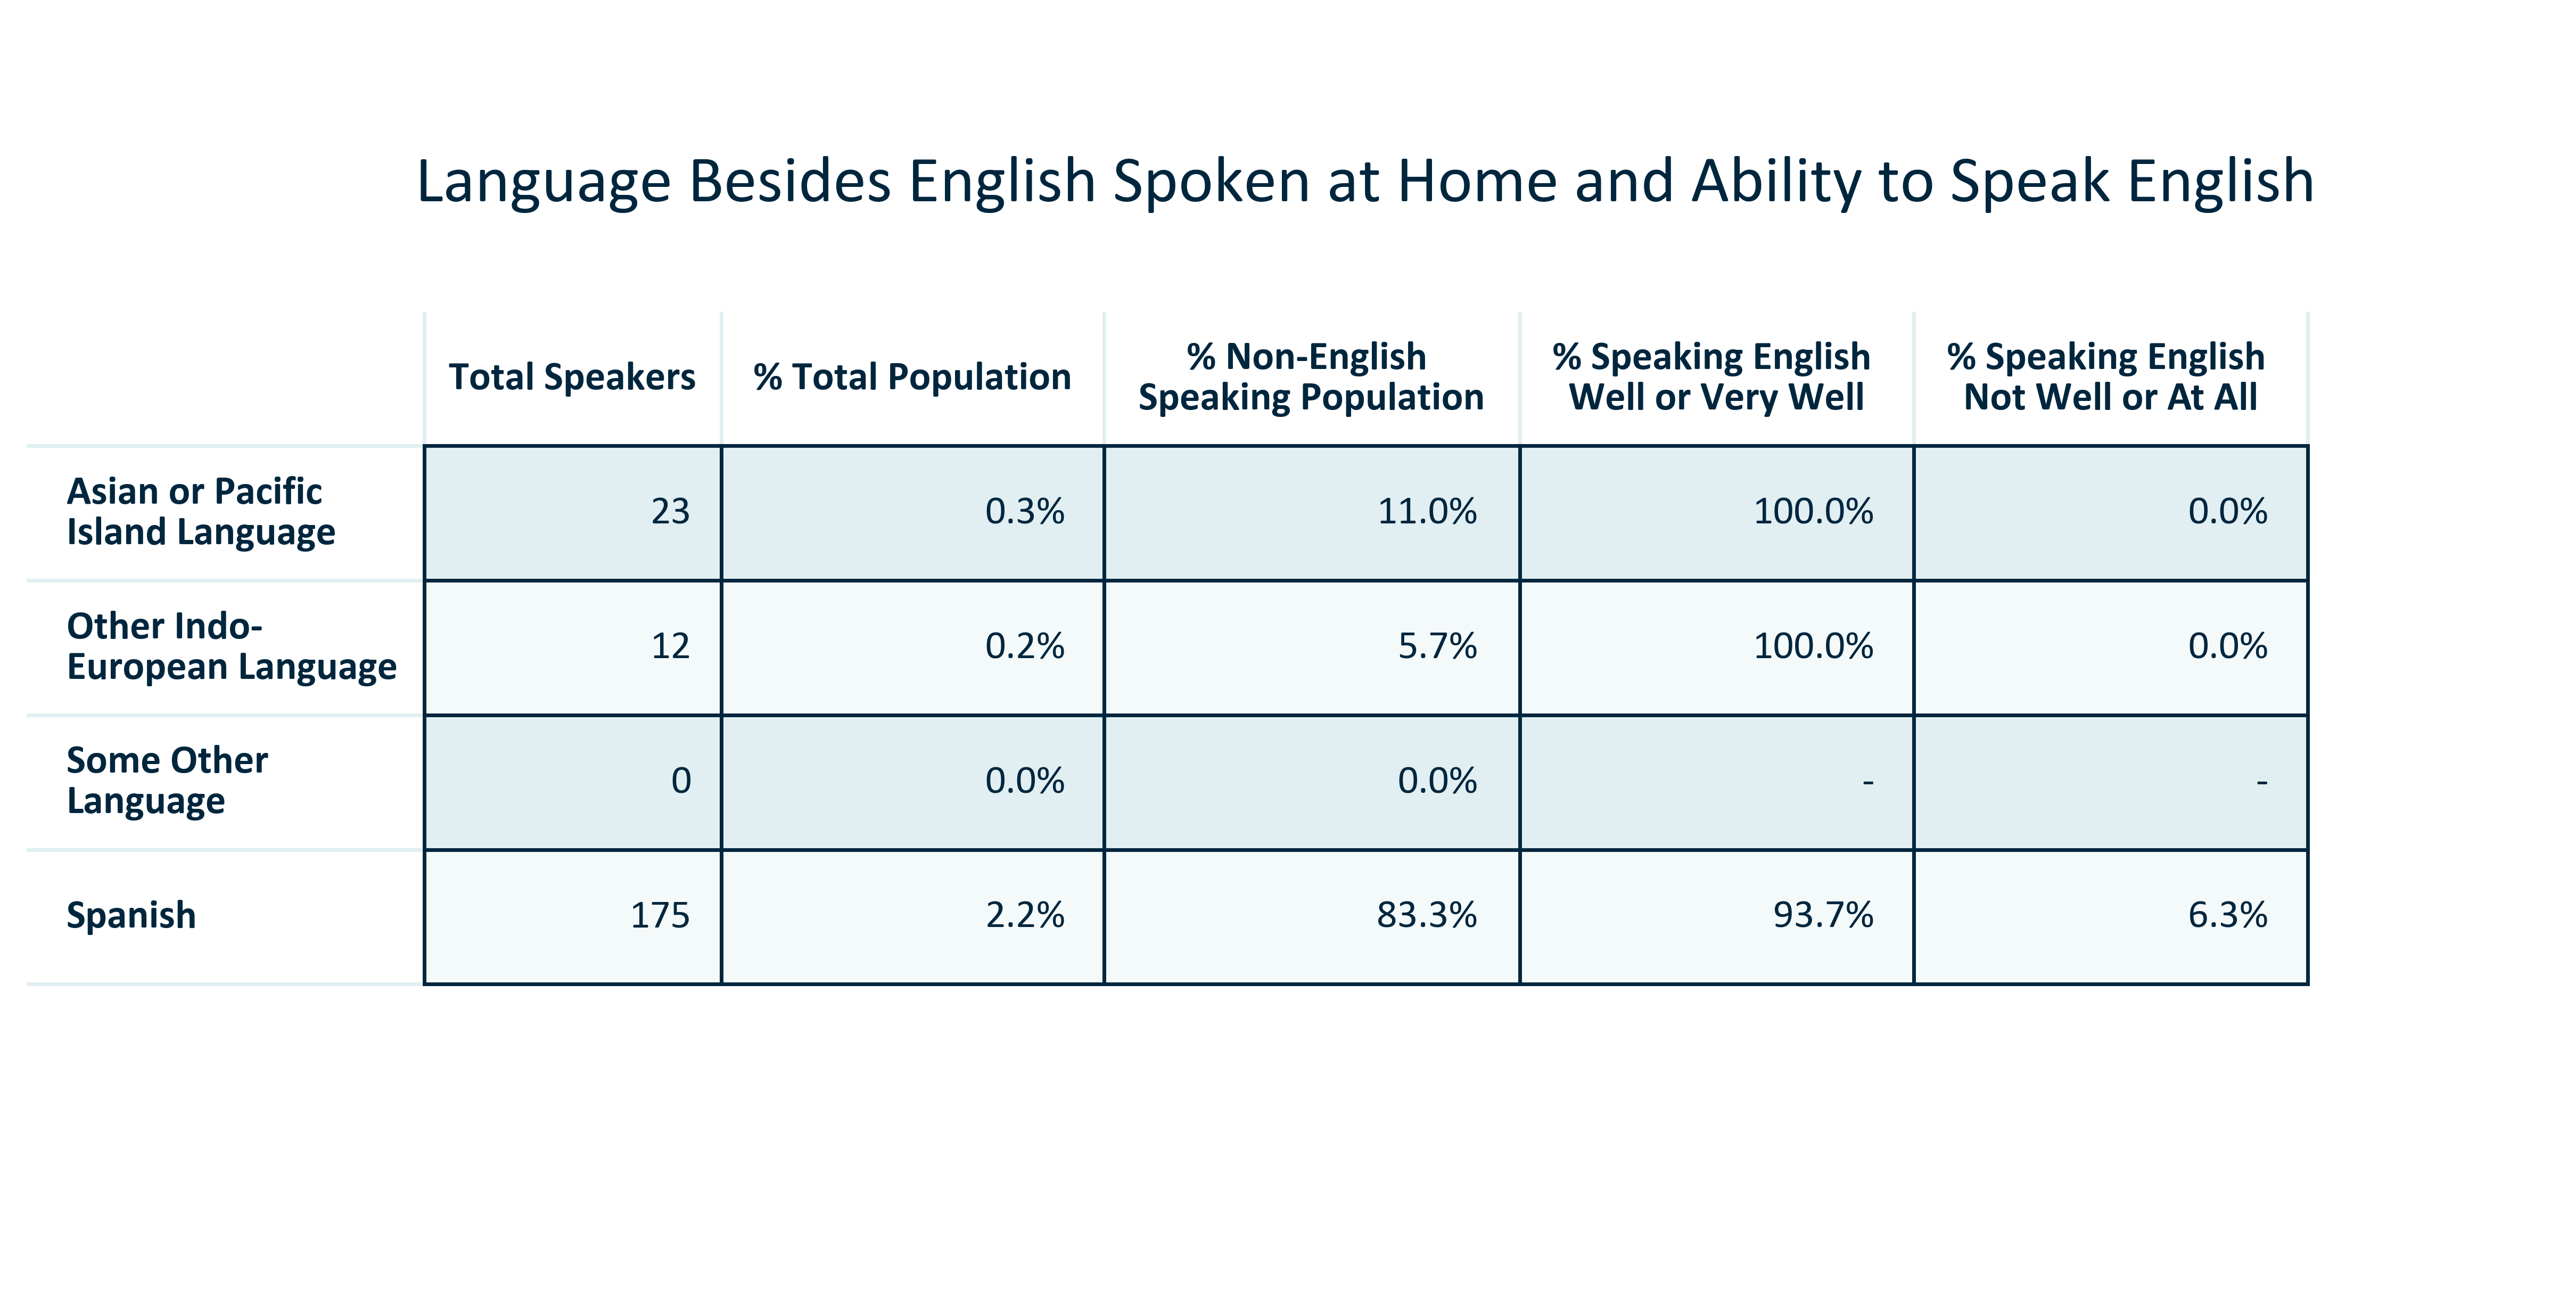

In [160]:
title = 'Language Besides English Spoken at Home and Ability to Speak English'
df_temp = tract5
next_line = ['Total Speakers', '% Total Population', '% Non-English \nSpeaking Population', '% Speaking English \nWell or Very Well', 
             '% Speaking English \nNot Well or At All']
df_temp1 = df_temp[['Language:Speak Spanish', 'Language%:Speak Spanish', 'Language%:Non-English Speak Spanish', 
                    'Language:Spanish%:Speak English Well or Very Well', 'Language:Spanish%:Speak English Not Well or At All']]
df_temp1.columns = next_line
df_temp2 = df_temp[['Language:Speak Other Indo-European Language', 'Language%:Speak Other Indo-European Language', 
                    'Language%:Non-English Speak Other Indo-European Language', 'Language:Other Indo-European%:Speak English Well or Very Well', 
                    'Language:Other Indo-European%:Speak English Not Well or At All']]
df_temp2.columns = next_line
df_temp3 = df_temp[['Language:Speak Asian or Pacific Island Language', 'Language%:Speak Asian or Pacific Island Language', 
                    'Language%:Non-English Speak Asian or Pacific Island Language', 'Language:Asian or Pacific Island%:Speak English Well or Very Well', 
                    'Language:Asian or Pacific Island%:Speak English Not Well or At All']]
df_temp3.columns = next_line
df_temp4 = df_temp[['Language:Speak Other Language', 'Language%:Speak Other Language', 
                    'Language%:Non-English Speak Other Language', 'Language:Other%:Speak English Well or Very Well', 
                    'Language:Other%:Speak English Not Well or At All']]
df_temp4.columns = next_line
dfs = [df_temp2, df_temp4, df_temp1]
df_temp = df_temp3.append(dfs)
newindex = ['Asian or Pacific\nIsland Language', 'Other Indo-\nEuropean Language', 'Some Other \nLanguage', 'Spanish']
df_temp = df_temp.set_axis(newindex)
#df_temp = df_temp.sort_values(by = 'Total Speakers', ascending = False)
df_temp.update(df_temp[['Total Speakers']].applymap('{:,.0f}'.format))
df_temp.update(df_temp[['% Total Population', '% Non-English \nSpeaking Population', '% Speaking English \nWell or Very Well', 
                        '% Speaking English \nNot Well or At All']].applymap('{:.1f}%'.format))
df_temp = df_temp.replace({'nan%': '-', 'inf%': '-'})
#initiate table and set parameters
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.8)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('PortFigs/Tract_LanguageSpokenatHome.png', bbox_inches='tight')
df_temp.to_csv('PortFigs/Tract_LanguageSpokenatHome.csv')
plt.show()
plt.close();

In [150]:
df_temp

Total Speakers % Total Population % Non-English \nSpeaking Population % Speaking English \nWell or Very Well  \
Asian or Pacific\nIsland Language             23               0.3%                               11.0%                                 100.0%   
Other Indo-\nEuropean Language                12               0.2%                                5.7%                                 100.0%   
Some Other \nLanguage                          0               0.0%                                0.0%                                      -   
Spanish                                      175               2.2%                               83.3%                                  93.7%   

                                  % Speaking English \nNot Well or At All  
Asian or Pacific\nIsland Language                                    0.0%  
Other Indo-\nEuropean Language                                       0.0%  
Some Other \nLanguage                                                   -  
Spanish                                                              6.3%

In [69]:
conn = sq.connect('../../GNRC-Data-Pipelines/Outputs/CensusBureau.db')
#2020PL and 2021 ACS5
sql_query = pd.read_sql('SELECT * FROM [CensusBureau_ACS5_2021]', conn)
ACS52021 = pd.DataFrame(sql_query)
ACS52021.drop(columns = 'Source', inplace = True)
#PL2020
sql_query = pd.read_sql('SELECT * FROM [CensusBureau_PL_2020]', conn)
PL2020 = pd.DataFrame(sql_query)
PL2020.drop(columns = 'Source', inplace = True)

In [72]:
table['GEO_ID'] = 'None'

In [77]:
dfs = [ACS52021, PL2020]
data = reduce(lambda  left,right: pd.merge(left,right,on=['NAME', 'GEO_ID'], how='outer'), dfs)

In [78]:
data.head()

NAME          GEO_ID  Population ACS  HealthCoverage:Total Series  HealthCoverage:None  HealthCoverage%: None  \
0  Anderson County, Tennessee  0500000US47001         76683.0                      75685.0               7233.0               9.556715   
1   Bedford County, Tennessee  0500000US47003         49754.0                      49376.0               6295.0              12.749109   
2    Benton County, Tennessee  0500000US47005         15872.0                      15722.0               1810.0              11.512530   
3   Bledsoe County, Tennessee  0500000US47007         14863.0                      13584.0               2452.0              18.050648   
4    Blount County, Tennessee  0500000US47009        134042.0                     132876.0              12551.0               9.445649   

   HealthCoverage: With Healthcare Coverage  HealthCoverage%: With Healthcare Coverage  HealthCoverage: With Public Healthcare Coverage  \
0                                   68452.0                                  90.443285                                          31380.0   
1                                   43081.0                                  87.250891                                          19962.0   
2                                   13912.0                                  88.487470                                           7667.0   
3                                   11132.0                                  81.949352                                           6074.0   
4                                  120325.0                                  90.554351                                          49832.0   

   HealthCoverage%: With Public Healthcare Coverage  HealthCoverage: With Private Healthcare Coverage  \
0                                         45.842342                                           50452.0   
1                                         46.335972                                           29537.0   
2                                         55.110696                                            8529.0   
3                                         54.563421                                            7111.0   
4                                         41.414502                                           92680.0   

   HealthCoverage%: With Private Healthcare Coverage  Male Under 5  Female Under 5  Male 5 to 9  Female 5 to 9  Male 5 to 14  Female 5 to 14  \
0                                          73.704201        2072.0          1963.0       2498.0         1989.0        4801.0          4606.0   
1                                          68.561547        1865.0          1482.0       1700.0         1653.0        3679.0          3549.0   
2                                          61.306786         400.0           356.0        411.0          392.0         959.0           783.0   
3                                          63.878908         292.0           240.0        339.0          186.0         709.0           556.0   
4                                          77.024725        3271.0          3326.0       3588.0         4047.0        7838.0          7636.0   

   Male 15 to 24  Female 15 to 24  Male 10 to 14  Female 10 to 14  Male 15 to 17  Female 15 to 17  Male 18 to 24  Female 18 to 24  Male 25 to 34  \
0         4329.0           4169.0         2303.0           2617.0         1484.0           1469.0         2845.0           2700.0         4859.0   
1         3320.0           2874.0         1979.0           1896.0         1157.0            891.0         2163.0           1983.0         3457.0   
2          848.0           1091.0          548.0            391.0          240.0            371.0          608.0            720.0          726.0   
3          811.0            551.0          370.0            370.0          243.0            195.0          568.0            356.0         1773.0   
4         7868.0           7688.0         4250.0           3589.0         2572.0           2458.0         5296.0           52

In [79]:
cols = ['NAME', 'Population', 'White Alone', 'White Alone %', 'Non-White Population: Race',# 'Non-White Population:Race %', 
        'Black or African American Alone', 'Black or African American Alone %', 
        'Black or African American Alone % Non-White Population', 'American Indian Alaska Native Alone', 'American Indian Alaska Native Alone %', 
        'American Indian Alaska Native Alone % Non-White Population', 'Asian Alone', 'Asian Alone %', 'Asian Alone % Non-White Population', 
        'Native Hawaiian Other Pacific Islander Alone', 'Native Hawaiian Other Pacific Islander Alone %', 
        'Native Hawaiian Other Pacific Islander Alone % Non-White Population', 'Some Other Race Alone', 'Some Other Race Alone %', 
        'Some Other Race Alone % Non-White Population', 'Two or More Races', 'Two or More Races %', 'Two or More Races % Non-White Population', 
        'Hispanic or Latino', 'Hispanic or Latino %', 'Not Hispanic or Latino', 'Not Hispanic or Latino %', 'Minority', 'Minority %', 
        'White Alone Not Hispanic or Latino', 'White Alone Not Hispanic or Latino %', 'Language:Population 5 and Older', 'Language:Speak Only English', 
        'Language%:Speak Only English', 'Language:Speak Spanish', 'Language%:Speak Spanish', 
        'Language%:Non-English Speak Spanish', 'Language:Spanish:Speak English Very Well', 'Language:Spanish%:Speak English Very Well', 
        'Language:Spanish:Speak English Well', 'Language:Spanish%:Speak English Well', 'Language:Spanish:Speak English Well or Very Well', 
        'Language:Spanish%:Speak English Well or Very Well', 'Language:Spanish:Speak English Not Well', 'Language:Spanish%:Speak English Not Well', 
        'Language:Spanish:Speak English Not At All', 'Language:Spanish%:Speak English Not At All', 'Language:Spanish:Speak English Not Well or At All', 
        'Language:Spanish%:Speak English Not Well or At All', 'Language:Speak Other Indo-European Language', 'Language%:Speak Other Indo-European Language', 
        'Language%:Non-English Speak Other Indo-European Language', 'Language:Other Indo-European:Speak English Very Well', 
        'Language:Other Indo-European%:Speak English Very Well', 'Language:Other Indo-European:Speak English Well', 
        'Language:Other Indo-European%:Speak English Well', 'Language:Other Indo-European:Speak English Well or Very Well', 
        'Language:Other Indo-European%:Speak English Well or Very Well', 'Language:Other Indo-European:Speak English Not Well', 
        'Language:Other Indo-European%:Speak English Not Well', 'Language:Other Indo-European:Speak English Not At All', 
        'Language:Other Indo-European%:Speak English Not At All', 'Language:Other Indo-European:Speak English Not Well or At All', 
        'Language:Other Indo-European%:Speak English Not Well or At All', 'Language:Speak Asian or Pacific Island Language', 
        'Language%:Speak Asian or Pacific Island Language', 'Language%:Non-English Speak Asian or Pacific Island Language', 
        'Language:Asian or Pacific Island:Speak English Very Well', 'Language:Asian or Pacific Island%:Speak English Very Well', 
        'Language:Asian or Pacific Island:Speak English Well', 'Language:Asian or Pacific Island%:Speak English Well', 
        'Language:Asian or Pacific Island:Speak English Well or Very Well', 'Language:Asian or Pacific Island%:Speak English Well or Very Well', 
        'Language:Asian or Pacific Island:Speak English Not Well', 'Language:Asian or Pacific Island%:Speak English Not Well', 
        'Language:Asian or Pacific Island:Speak English Not At All', 'Language:Asian or Pacific Island%:Speak English Not At All', 
        'Language:Asian or Pacific Island:Speak English Not Well or At All', 'Language:Asian or Pacific Island%:Speak English Not Well or At All', 
        'Language:Speak Other Language', 'Language%:Speak Other Language', 'Language%:Non-English Speak Other Language', 'Language:Other:Speak English Very Well', 
        'Language:Other%:Speak English Very Well', 'Language:Other:Speak English Well', 'Language:Other%:Speak English Well', 
        'Language:Other:Speak English Well or Very Well', 'Language:Other%:Speak English Well or Very Well', 'Language:Other:Speak English Not Well', 
        'Language:Other%:Speak English Not Well', 'Language:Other:Speak English Not At All', 'Language:Other%:Speak English Not At All', 
        'Language:Other:Speak English Not Well or At All', 'Language:Other%:Speak English Not Well or At All', 'Language:Speak Language Besides English', 
        'Language%:Speak Language Besides English', 'Language:Language Besides English:Speak English Very Well', 
        'Language%:Language Besides English:Speak English Very Well', 'Language:Language Besides English:Speak English Well', 
        'Language%:Language Besides English:Speak English Well', 'Language:Language Besides English:Speak English Well or Very Well', 
        'Language:Language Besides English%:Speak English Well or Very Well', 'Language:Language Besides English:Speak English Not Well', 
        'Language%:Language Besides English:Speak English Not Well', 'Language:Language Besides English:Speak English Not At All', 
        'Language%:Language Besides English:Speak English Not At All', 'Language:Language Besides English:Speak English Not Well or At All', 
        'Language:Language Besides English%:Speak English Not Well or At All', 'SocialSecurity:Households with Social Security Income', 
        'SocialSecurity%:Households with Social Security Income', 'Median Household Income', 'HHIncome:Total Households', 'HHIncome:Less than 10,000', 
        'HHIncome%:Less than 10,000', 'HHIncome:10 to 14,999', 'HHIncome%:10 to 14,999', 'HHIncome:15 to 19,999', 'HHIncome%:15 to 19,999', 
        'HHIncome:20 to 24,999', 'HHIncome%:20 to 24,999', 'HHIncome:25 to 29,999', 'HHIncome%:25 to 29,999', 'HHIncome:30 to 34,999', 'HHIncome:%30 to 34,999', 
        'HHIncome:35 to 39,999', 'HHIncome%:35 to 39,999', 'HHIncome:40 to 44,999', 'HHIncome%:40 to 44,999', 'HHIncome:45 to 49,999', 'HHIncome%:45 to 49,999', 
        'HHIncome:50 to 59,999', 'HHIncome%:50 to 59,999', 'HHIncome:60 to 74,999', 'HHIncome%:60 to 74,999', 'HHIncome:75 to 99,999', 'HHIncome%:75 to 99,999', 
        'HHIncome:100 to 124,999', 'HHIncome%:100 to 124,999', 'HHIncome:125 to 149,999', 'HHIncome%:125 to 149,999', 'HHIncome:150 to 199,999', 
        'HHIncome%:150 to 199,999', 'HHIncome:200K or More', 'HHIncome%:200K or More', 'Poverty%: Below Poverty Level']

In [80]:
data = data[cols]

In [81]:
data = data.loc[data['NAME'] == 'Trousdale County, Tennessee']

In [82]:
data.head()

NAME  Population  White Alone  White Alone %  Non-White Population: Race  Black or African American Alone  \
84  Trousdale County, Tennessee     11615.0       8883.0      76.478691                      2732.0                           1922.0   

    Black or African American Alone %  Black or African American Alone % Non-White Population  American Indian Alaska Native Alone  \
84                          16.547568                                          70.351391                                      30.0   

    American Indian Alaska Native Alone %  American Indian Alaska Native Alone % Non-White Population  Asian Alone  Asian Alone %  \
84                               0.258287                                           1.098097                  27.0       0.232458   

    Asian Alone % Non-White Population  Native Hawaiian Other Pacific Islander Alone  Native Hawaiian Other Pacific Islander Alone %  \
84                            0.988287                                           0.0                                             0.0   

    Native Hawaiian Other Pacific Islander Alone % Non-White Population  Some Other Race Alone  Some Other Race Alone %  \
84                                                0.0                                    205.0                 1.764959   

    Some Other Race Alone % Non-White Population  Two or More Races  Two or More Races %  Two or More Races % Non-White Population  \
84                                       7.50366              548.0             4.718037                                 20.058565   

    Hispanic or Latino  Hispanic or Latino %  Not Hispanic or Latino  Not Hispanic or Latino %  Minority  Minority %  \
84               375.0              3.228584                 11240.0                 96.771416    2829.0   24.356436   

    White Alone Not Hispanic or Latino  White Alone Not Hispanic or Latino %  Language:Population 5 and Older  Language:Speak Only English  \
84                              8786.0                             75.643564                          10743.0                      10439.0   

    Language%:Speak Only English  Language:Speak Spanish  Language%:Speak Spanish  Language%:Non-English Speak Spanish  \
84                      97.17025                   268.0                 2.494648                            88.157895   

    Language:Spanish:Speak English Very Well  Language:Spanish%:Speak English Very Well  Language:Spanish:Speak English Well  \
84                                     157.0                                   58.58209                                 75.0   

    Language:Spanish%:Speak English Well  Language:Spanish:Speak English Well or Very Well  Language:Spanish%:Speak English Well or Very Well  \
84                             27.985075                                             232.0                                          86.567164   

    Language:Spanish:Speak English Not Well  Language:Spanish%:Speak English Not Well  Language:Spanish:Speak English Not At All  \
84                                     36.0                                 13.432836                                        0.0   

    Language:Spanish%:Speak English Not At All  Language:Spanish:Speak English Not Well or At All  \
84                                         0.0                                               36.0   

    Language:Spanish%:Speak English Not Well or At All  Language:Speak Other Indo-European Language  Language%:Speak Other Indo-European Language  \
84                                          13.432836                                          13.0                                      0.121009   

    Language%:Non-English Speak Other Indo-European Language  Language:Other Indo-European:Speak English Very Well  \
84                                           4.276316                                                       1.0      

    Language:Other Indo-European%:Speak English Very Well  Language:Other Indo-European:Speak English Well

In [83]:
table

NAME  Population  Minority GEO_ID
0               Block      2508.0    1264.0   None
1               Tract      8700.0    2039.0   None
2  Tract Minus Prison      6192.0     775.0   None

In [84]:
percminoritytrousminusblock = percent(1565, 9107)
percminoritytrousminusblock

17.18458328758098

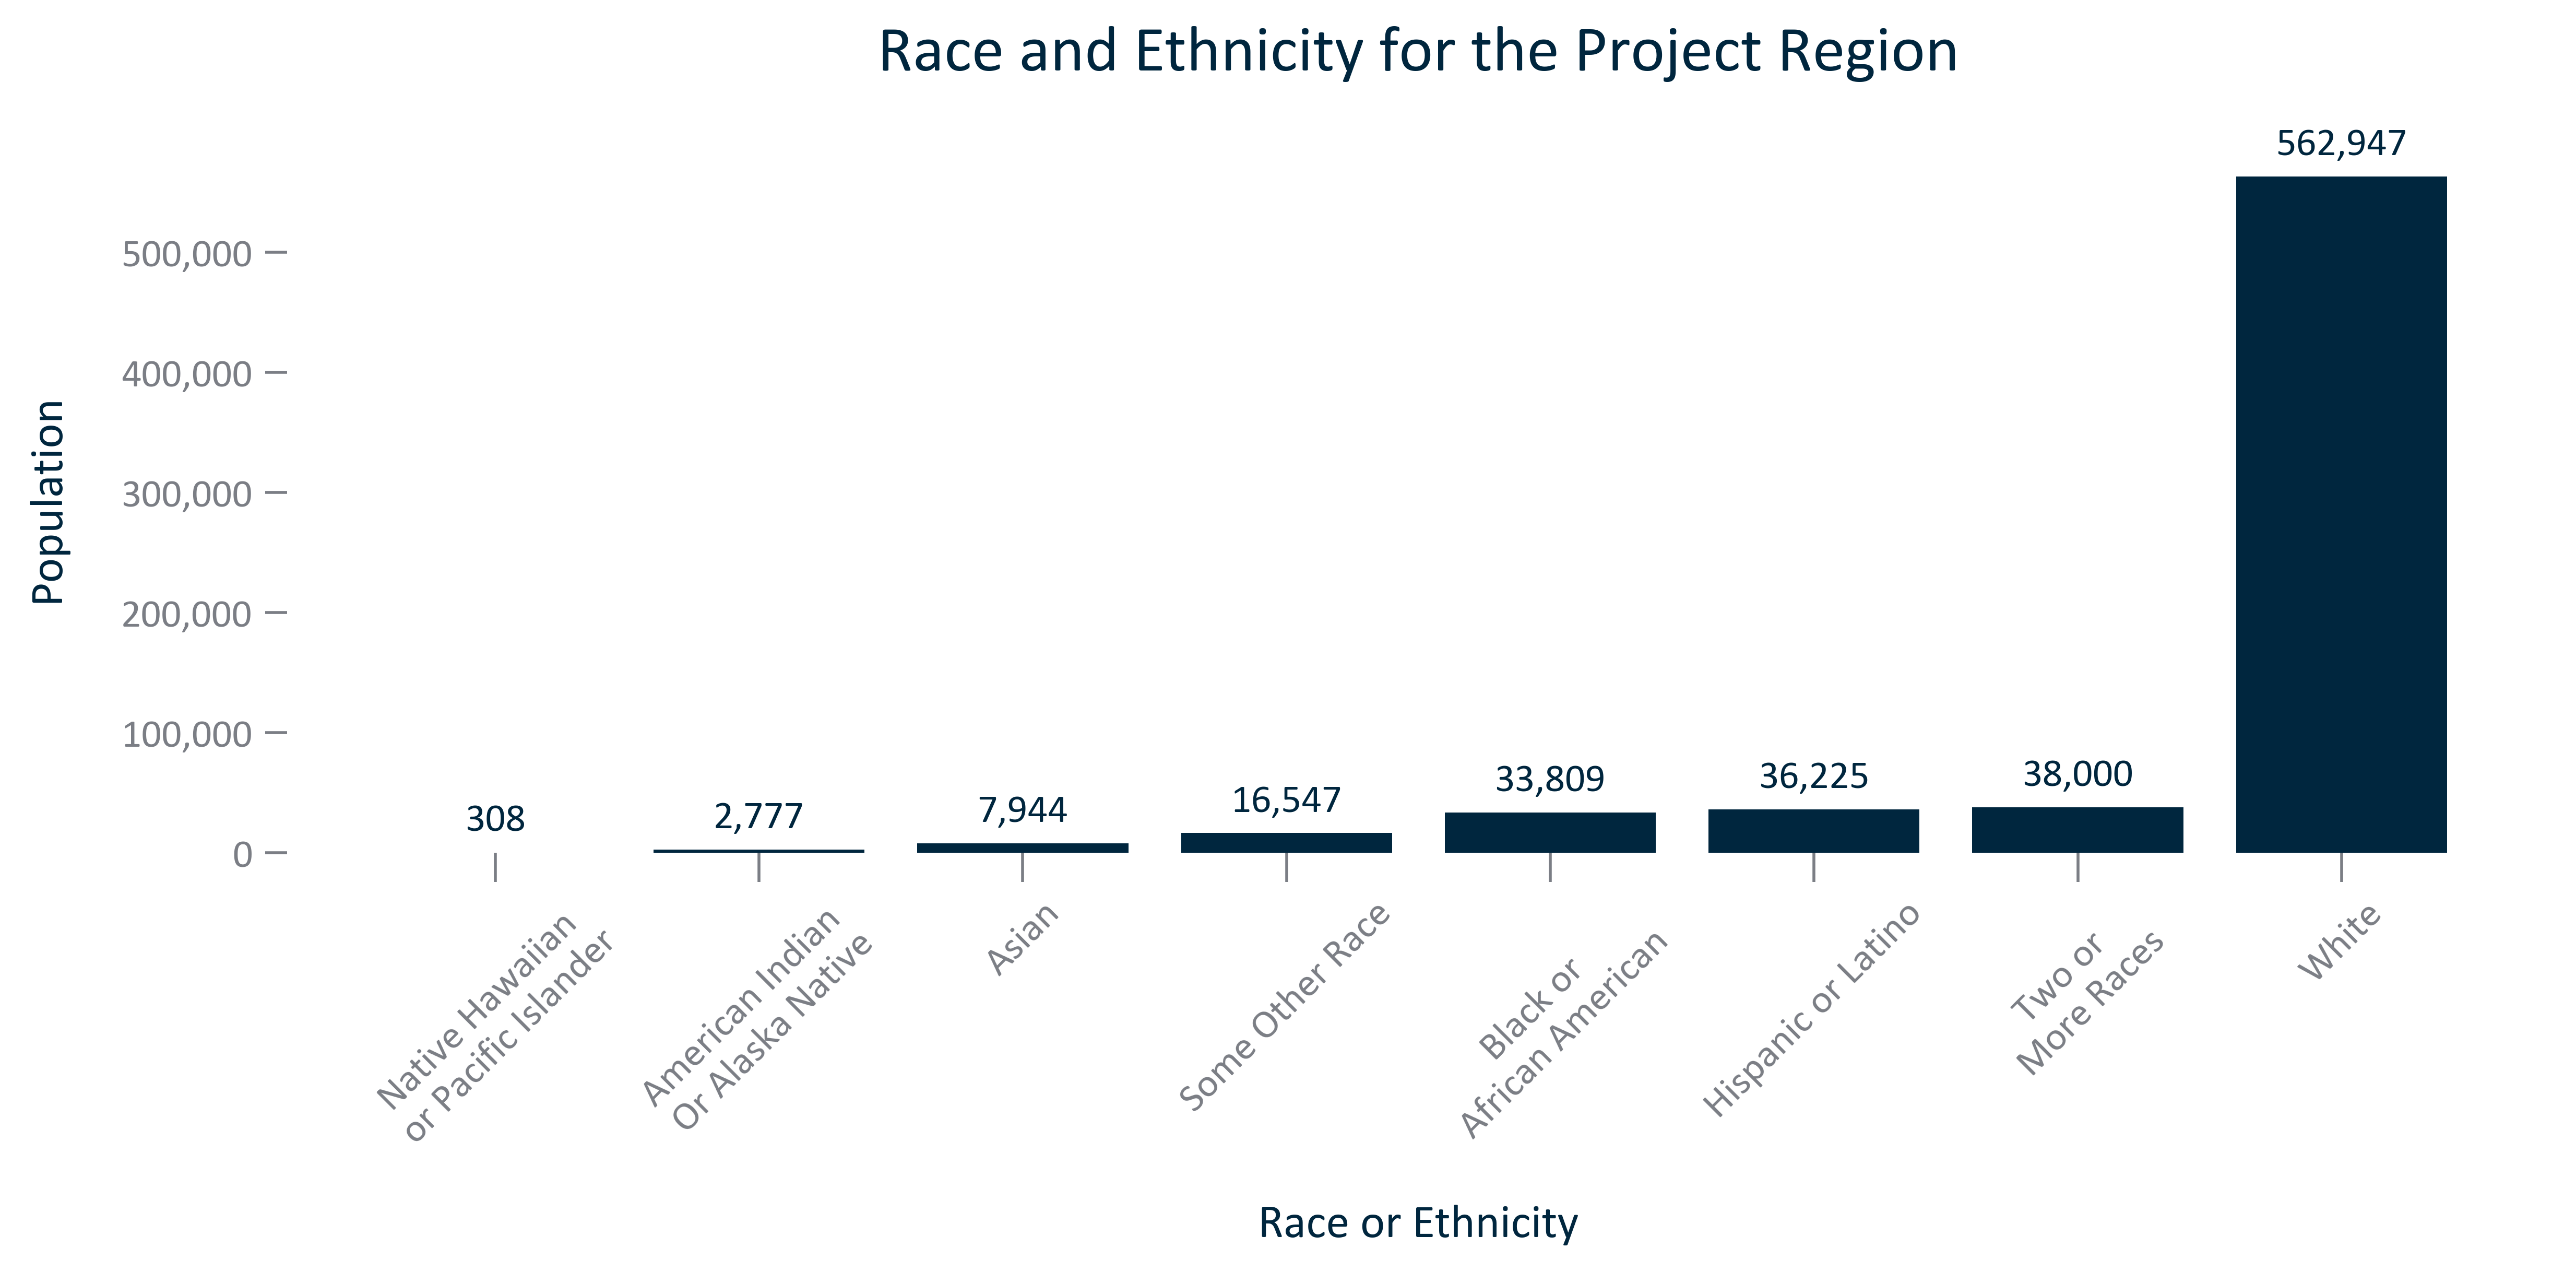

In [39]:
title = 'Race and Ethnicity for the Project Region'
df_temp = data[['White Alone', 'Black or African American Alone', 'American Indian Alaska Native Alone', 'Asian Alone', 
                   'Native Hawaiian Other Pacific Islander Alone', 'Some Other Race Alone', 'Two or More Races', 'Hispanic or Latino']]
df_temp = df_temp.rename(columns = {'White Alone': 'White', 'Black or African American Alone':'Black or \nAfrican American', 
                                    'American Indian Alaska Native Alone': 'American Indian \nOr Alaska Native', 'Asian Alone': 'Asian', 
                                    'Native Hawaiian Other Pacific Islander Alone': 'Native Hawaiian \nor Pacific Islander', 
                                    'Some Other Race Alone': 'Some Other Race', 'Two or More Races': 'Two or \nMore Races'})
df_temp = df_temp.melt(var_name = 'Race or Ethnicity', value_name = 'Population')
df_temp = df_temp.sort_values(by = 'Population', ascending = True)
                        
x = df_temp['Race or Ethnicity']
y = df_temp['Population']
xlabel = 'Race or Ethnicity'
ylabel = 'Population'
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 6, "{:,.0f}")
fig.savefig('PortFigs/Region_RaceEth.png', bbox_inches='tight')
df_temp.to_csv('PortFigs/Region_RaceEth.csv')
#display and save
plt.show()
plt.close();

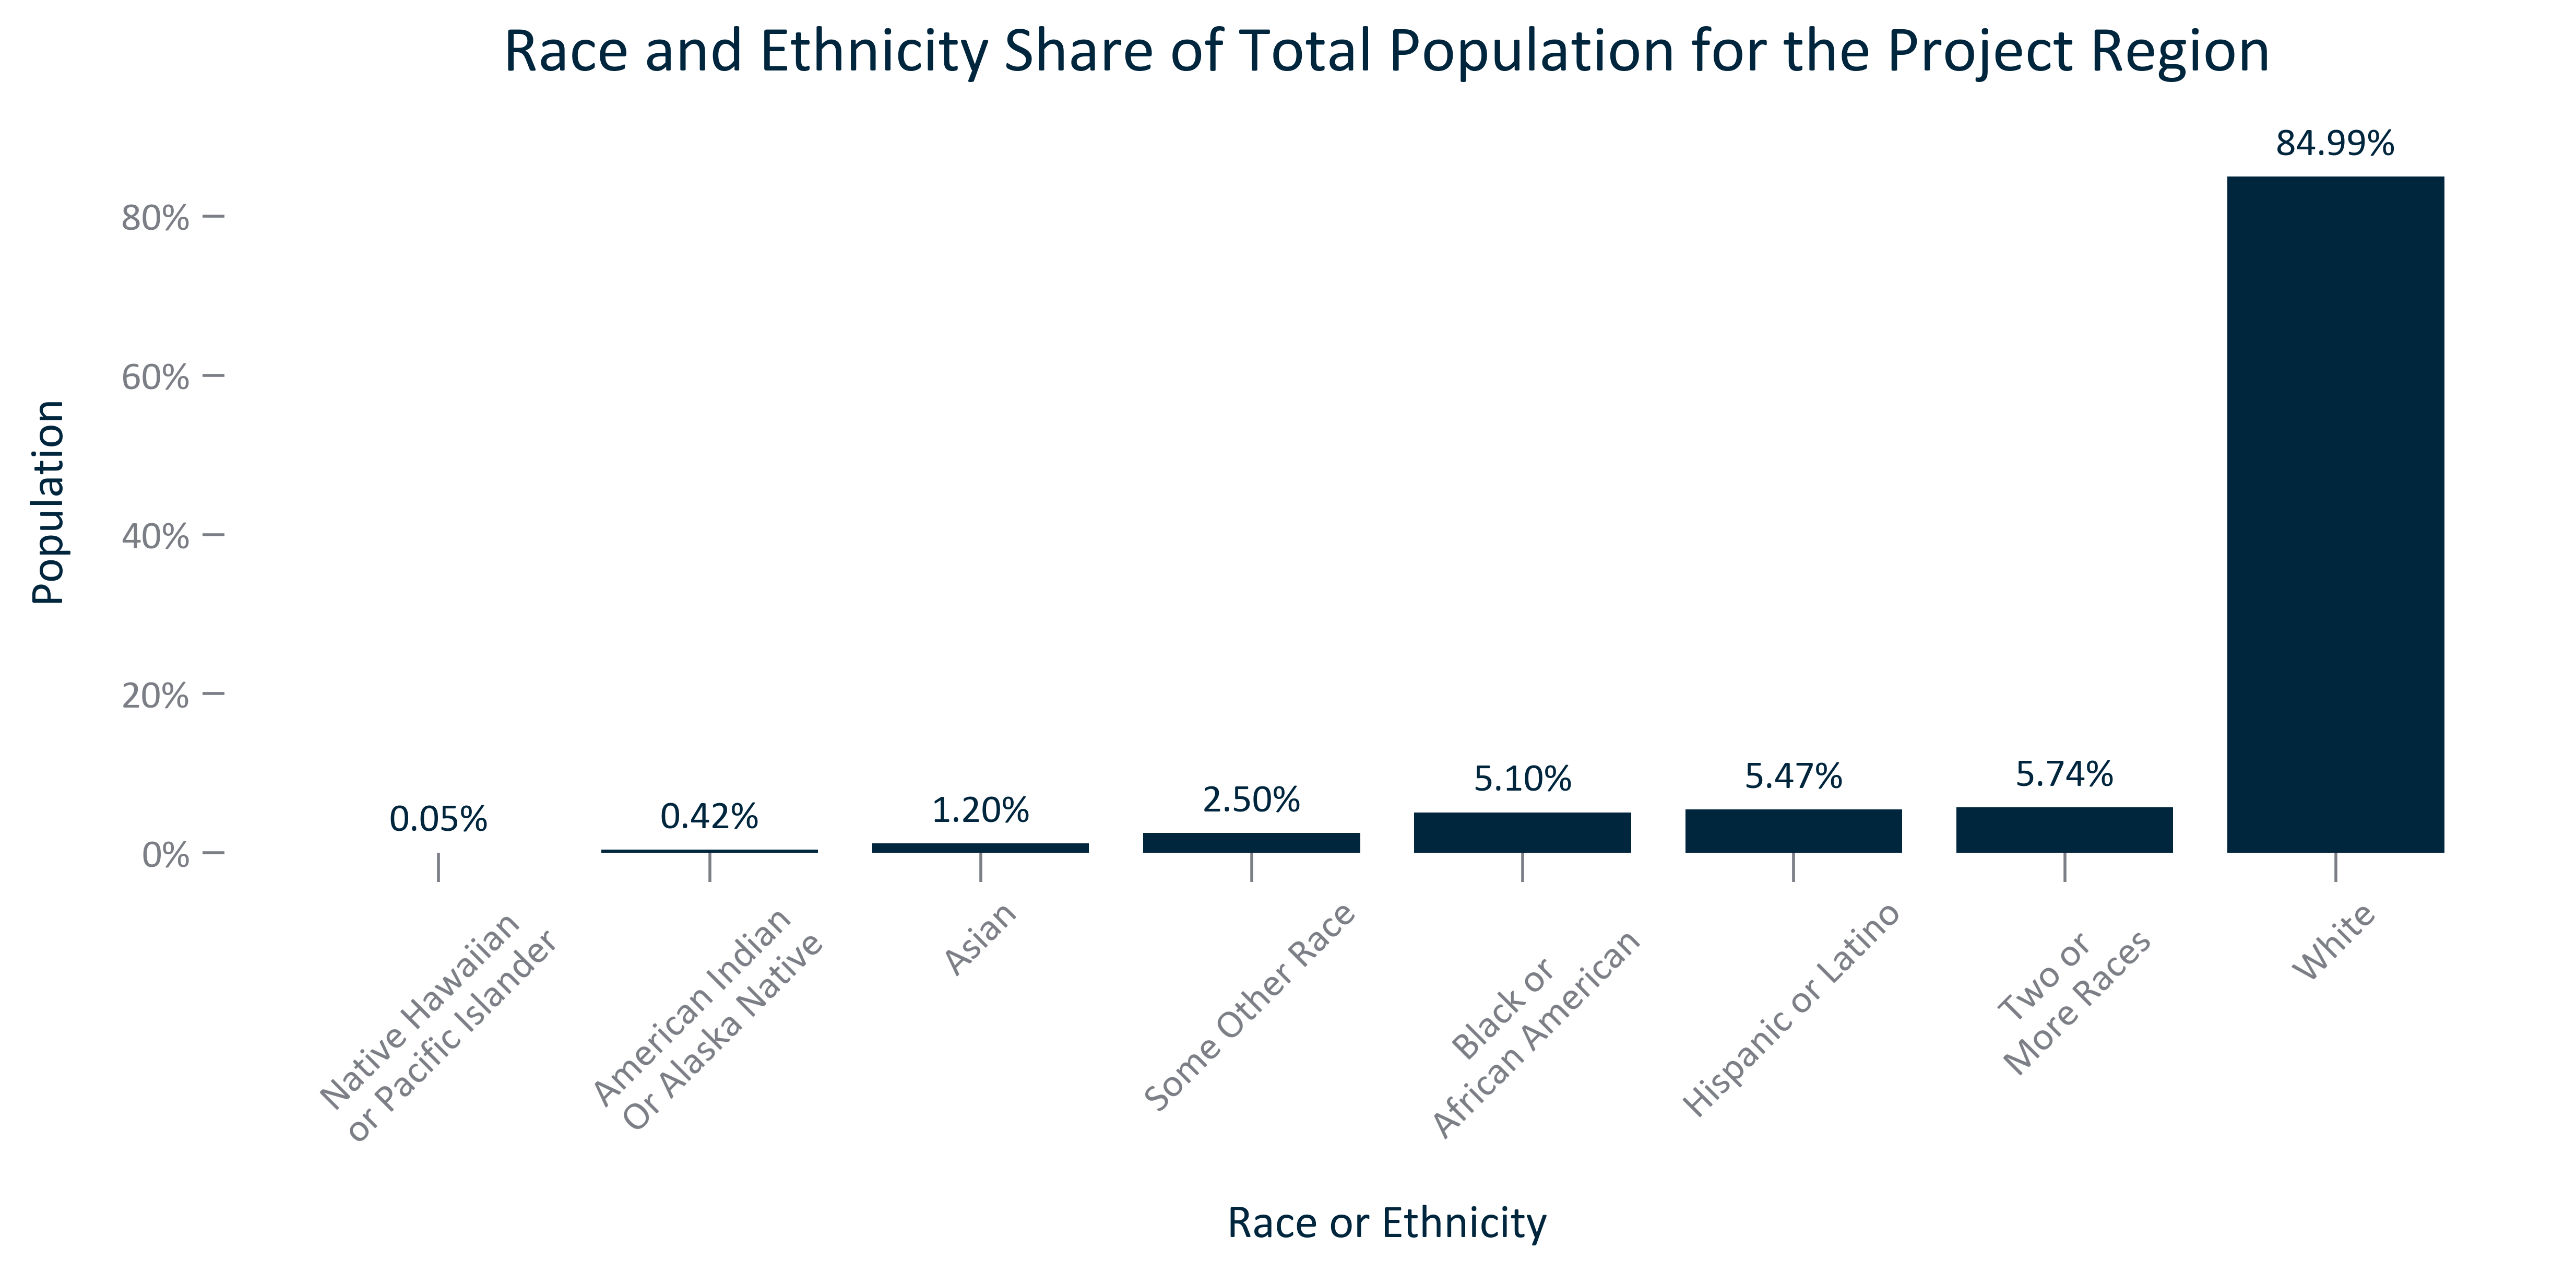

In [24]:
title = 'Race and Ethnicity Share of Total Population for the Project Region'
df_temp = data[['White Alone %', 'Black or African American Alone %', 'American Indian Alaska Native Alone %', 'Asian Alone %', 
                   'Native Hawaiian Other Pacific Islander Alone %', 'Some Other Race Alone %', 'Two or More Races %', 'Hispanic or Latino %']]
df_temp = df_temp.rename(columns = {'White Alone %': 'White', 'Black or African American Alone %':'Black or \nAfrican American', 
                                    'American Indian Alaska Native Alone %': 'American Indian \nOr Alaska Native', 'Asian Alone %': 'Asian', 
                                    'Native Hawaiian Other Pacific Islander Alone %': 'Native Hawaiian \nor Pacific Islander', 
                                    'Some Other Race Alone %': 'Some Other Race', 'Two or More Races %': 'Two or \nMore Races', 
                                    'Hispanic or Latino %': 'Hispanic or Latino'})
df_temp = df_temp.melt(var_name = 'Race or Ethnicity', value_name = 'Population')
df_temp = df_temp.sort_values(by = 'Population', ascending = True)
                        
x = df_temp['Race or Ethnicity']
y = df_temp['Population']
xlabel = 'Race or Ethnicity'
ylabel = 'Population'
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45)
#data labels
singledatalabels(0, 6, "{:,.2f}%")
fig.savefig('PortFigs/Region_RaceEthShare.png', bbox_inches='tight')
df_temp.to_csv('PortFigs/Region_RaceEthShare.csv')
#display and save
plt.show()
plt.close();

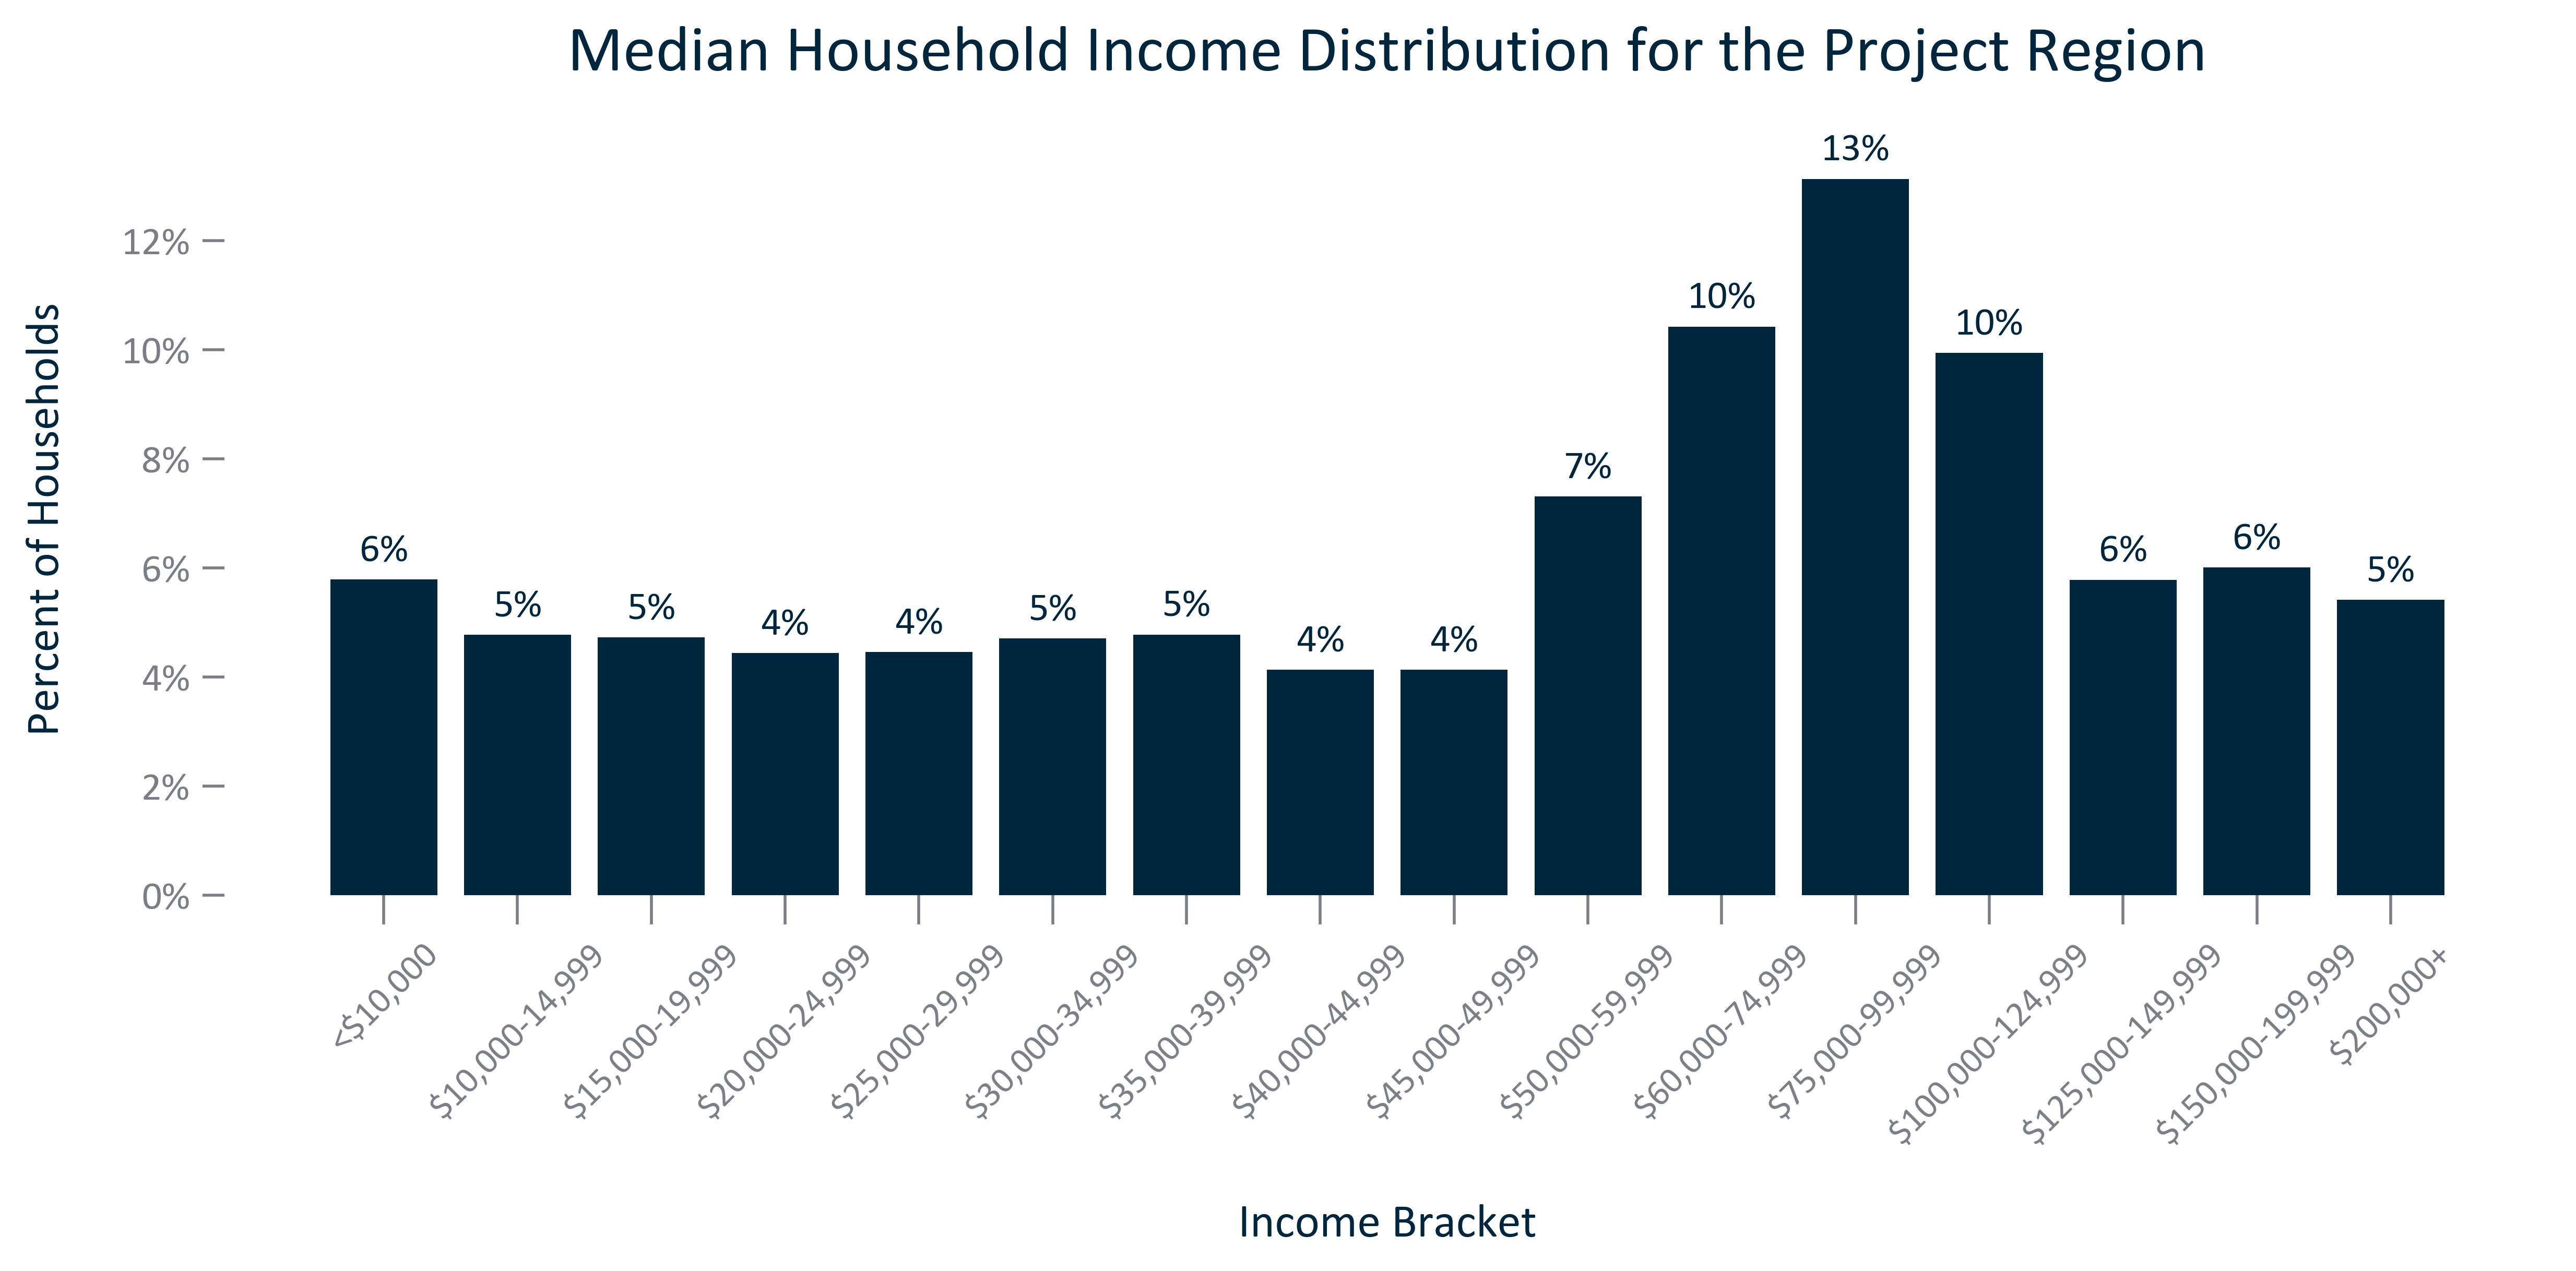

In [27]:
title = "Median Household Income Distribution for the Project Region"
#create temporary dataframe
df_temp = data[['HHIncome%:Less than 10,000', 'HHIncome%:10 to 14,999', 'HHIncome%:15 to 19,999', 'HHIncome%:20 to 24,999', 
                   'HHIncome%:25 to 29,999', 'HHIncome:%30 to 34,999', 'HHIncome%:35 to 39,999', 'HHIncome%:40 to 44,999', 
                   'HHIncome%:45 to 49,999', 'HHIncome%:50 to 59,999', 'HHIncome%:60 to 74,999', 'HHIncome%:75 to 99,999', 
                   'HHIncome%:100 to 124,999', 'HHIncome%:125 to 149,999', 'HHIncome%:150 to 199,999', 'HHIncome%:200K or More']]
df_temp = df_temp.rename(columns = {'HHIncome%:Less than 10,000': "<$10,000", 'HHIncome%:10 to 14,999': '$10,000-14,999', 
                                    'HHIncome%:15 to 19,999': '$15,000-19,999', 'HHIncome%:20 to 24,999': '$20,000-24,999', 
                                    'HHIncome%:25 to 29,999': '$25,000-29,999', 'HHIncome:%30 to 34,999': '$30,000-34,999', 
                                    'HHIncome%:35 to 39,999': '$35,000-39,999', 'HHIncome%:40 to 44,999': '$40,000-44,999', 
                                    'HHIncome%:45 to 49,999': '$45,000-49,999', 'HHIncome%:50 to 59,999': '$50,000-59,999', 
                                    'HHIncome%:60 to 74,999': '$60,000-74,999', 'HHIncome%:75 to 99,999': '$75,000-99,999', 
                                    'HHIncome%:100 to 124,999': '$100,000-124,999','HHIncome%:125 to 149,999': '$125,000-149,999', 
                                    'HHIncome%:150 to 199,999': '$150,000-199,999', 'HHIncome%:200K or More': '$200,000+'})
df_temp = df_temp.transpose().reset_index(drop = False).rename(columns = {'index':'Income Bracket', 273:'Percent of Households'})
#initiate figure and set parameters
xinput = 'Income Bracket'
yinput = 'Percent of Households'
x = df_temp[xinput]
y = df_temp[yinput]
xlabel = xinput
ylabel = yinput
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', labelsize = SMALLER_SIZE, rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}%")
fig.savefig('PortFigs/Region_HHIncomeDistribution.png', bbox_inches='tight')
df_temp.to_csv('PortFigs/Region_HHIncomeDistribution.csv')
plt.show()
plt.close();

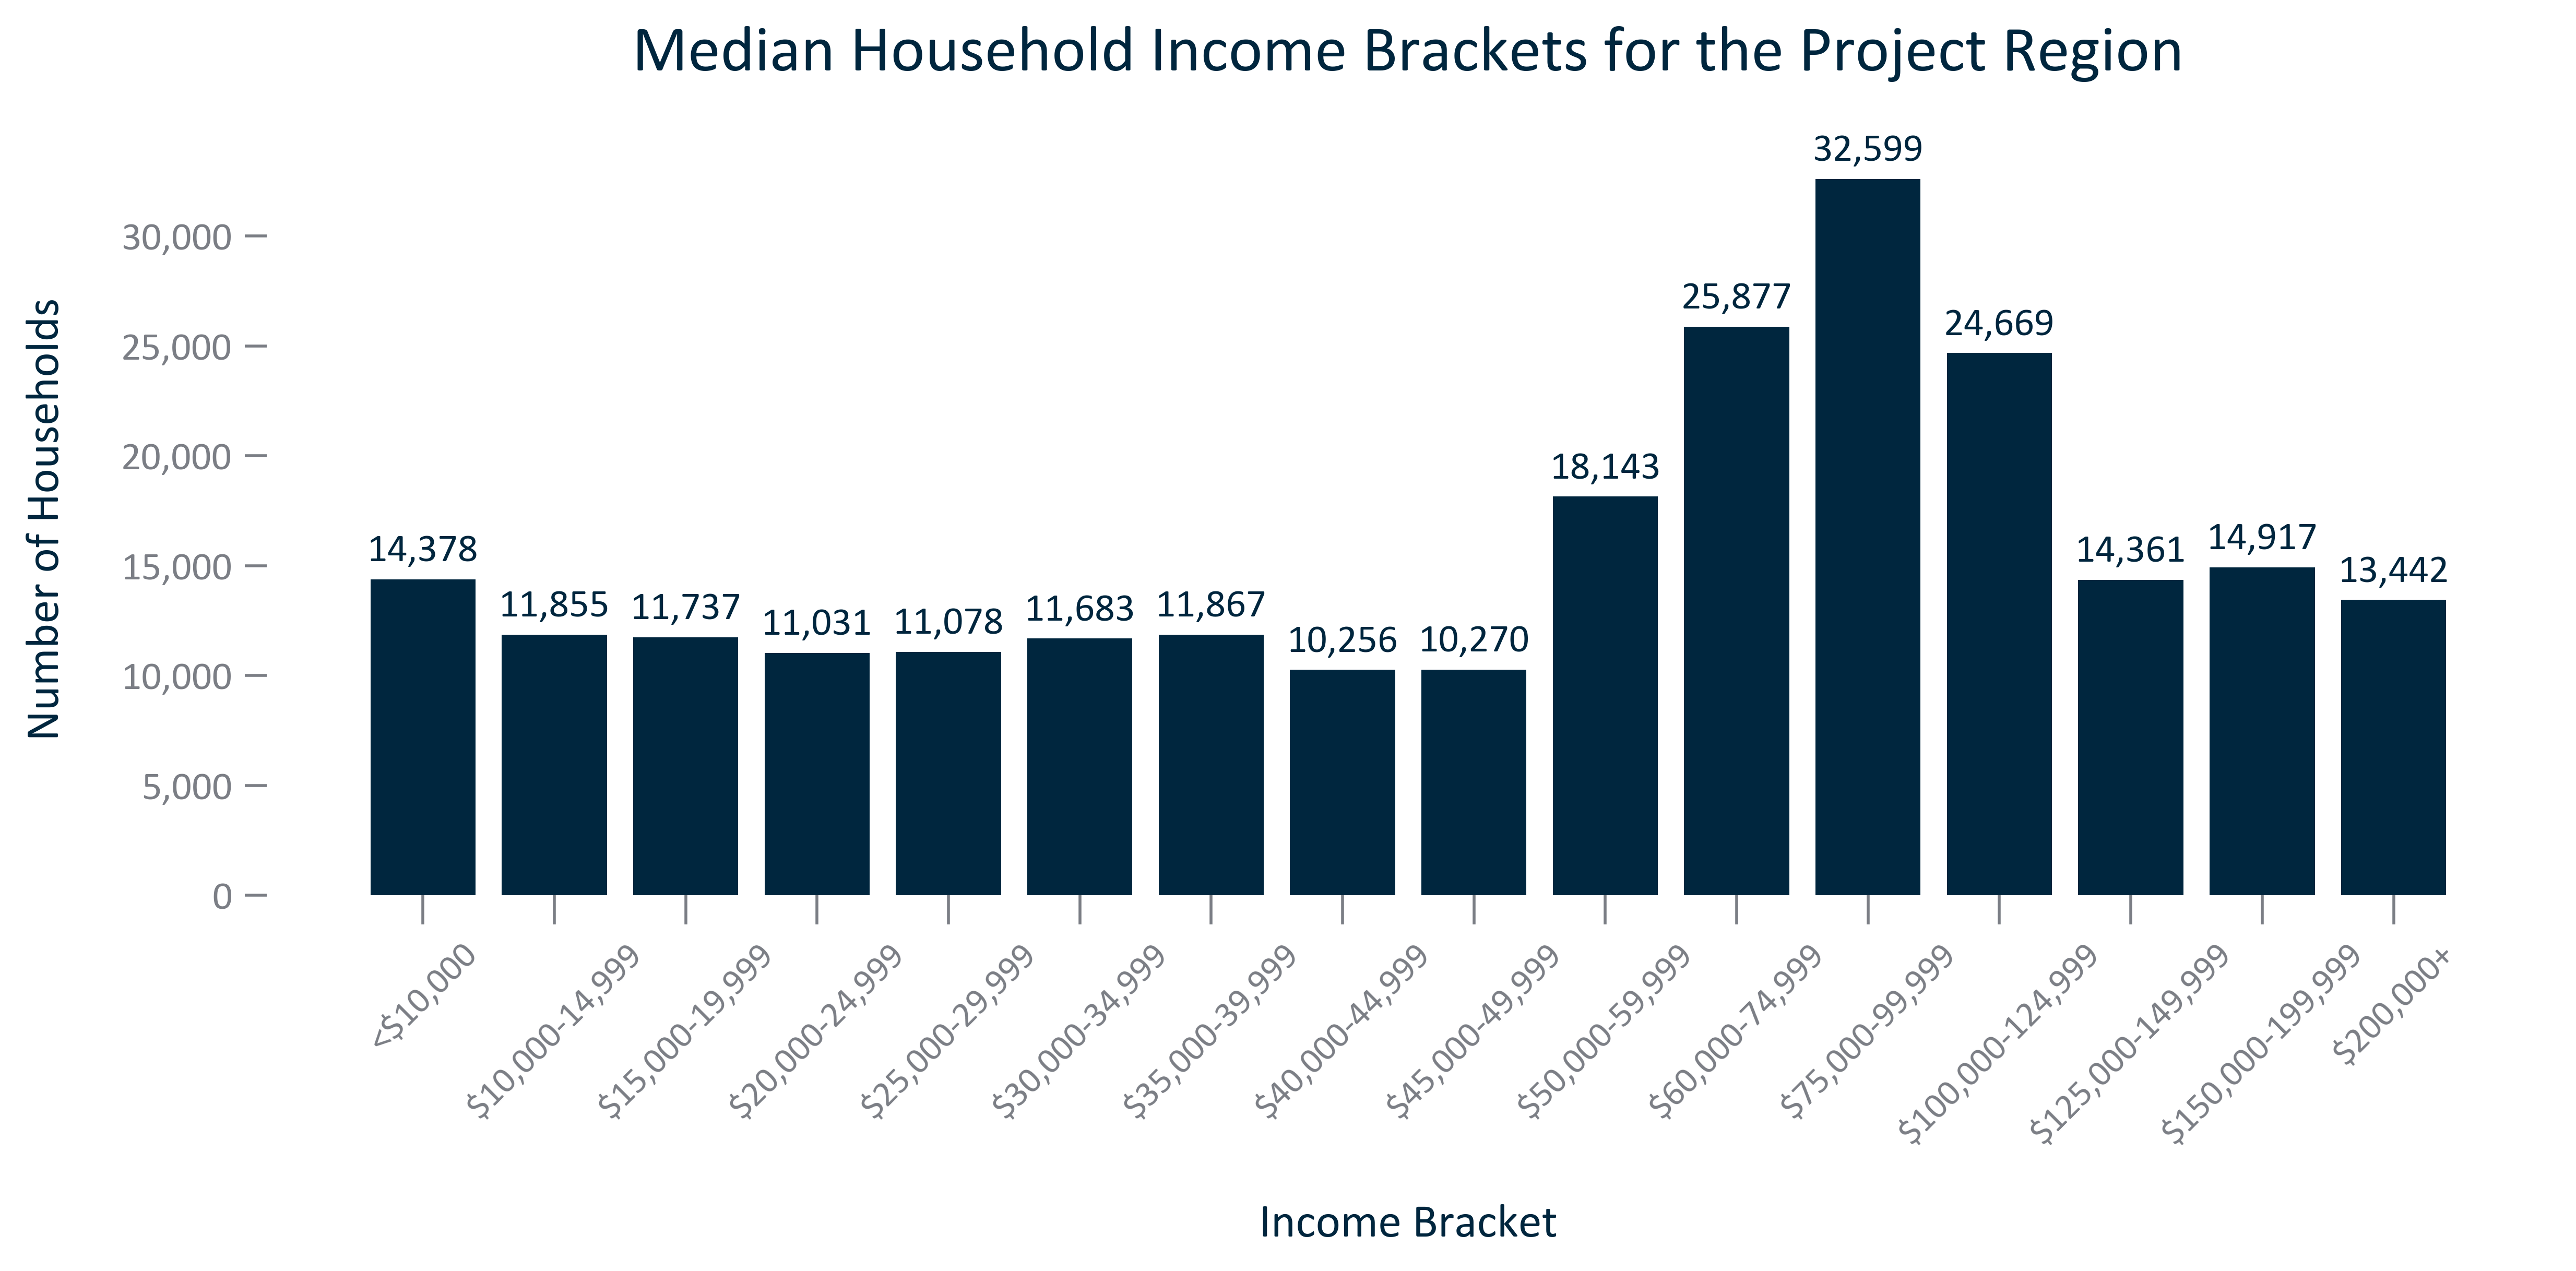

In [40]:
title = "Median Household Income Brackets for the Project Region"
#create temporary dataframe
df_temp = data[['HHIncome:Less than 10,000', 'HHIncome:10 to 14,999', 'HHIncome:15 to 19,999', 'HHIncome:20 to 24,999', 
                   'HHIncome:25 to 29,999', 'HHIncome:30 to 34,999', 'HHIncome:35 to 39,999', 'HHIncome:40 to 44,999', 
                   'HHIncome:45 to 49,999', 'HHIncome:50 to 59,999', 'HHIncome:60 to 74,999', 'HHIncome:75 to 99,999', 
                   'HHIncome:100 to 124,999', 'HHIncome:125 to 149,999', 'HHIncome:150 to 199,999', 'HHIncome:200K or More']]
df_temp = df_temp.rename(columns = {'HHIncome:Less than 10,000': "<$10,000", 'HHIncome:10 to 14,999': '$10,000-14,999', 
                                    'HHIncome:15 to 19,999': '$15,000-19,999', 'HHIncome:20 to 24,999': '$20,000-24,999', 
                                    'HHIncome:25 to 29,999': '$25,000-29,999', 'HHIncome:30 to 34,999': '$30,000-34,999', 
                                    'HHIncome:35 to 39,999': '$35,000-39,999', 'HHIncome:40 to 44,999': '$40,000-44,999', 
                                    'HHIncome:45 to 49,999': '$45,000-49,999', 'HHIncome:50 to 59,999': '$50,000-59,999', 
                                    'HHIncome:60 to 74,999': '$60,000-74,999', 'HHIncome:75 to 99,999': '$75,000-99,999', 
                                    'HHIncome:100 to 124,999': '$100,000-124,999','HHIncome:125 to 149,999': '$125,000-149,999', 
                                    'HHIncome:150 to 199,999': '$150,000-199,999', 'HHIncome:200K or More': '$200,000+'})
df_temp = df_temp.transpose().reset_index(drop = False).rename(columns = {'index':'Income Bracket', 273:'Number of Households'})
#initiate figure and set parameters
xinput = 'Income Bracket'
yinput = 'Number of Households'
x = df_temp[xinput]
y = df_temp[yinput]
xlabel = xinput
ylabel = yinput
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', labelsize = SMALLER_SIZE, rotation = 45)
#data labels
singledatalabels(0, 5, "{:,.0f}")
fig.savefig('PortFigs/Region_HHIncomeBrackets.png', bbox_inches='tight')
df_temp.to_csv('PortFigs/Region_HHIncomeBrackets.csv')
plt.show()
plt.close();

C:\Users\jmccall\AppData\Local\Temp\ipykernel_6672\4068576570.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_temp = df_temp3.append(dfs)


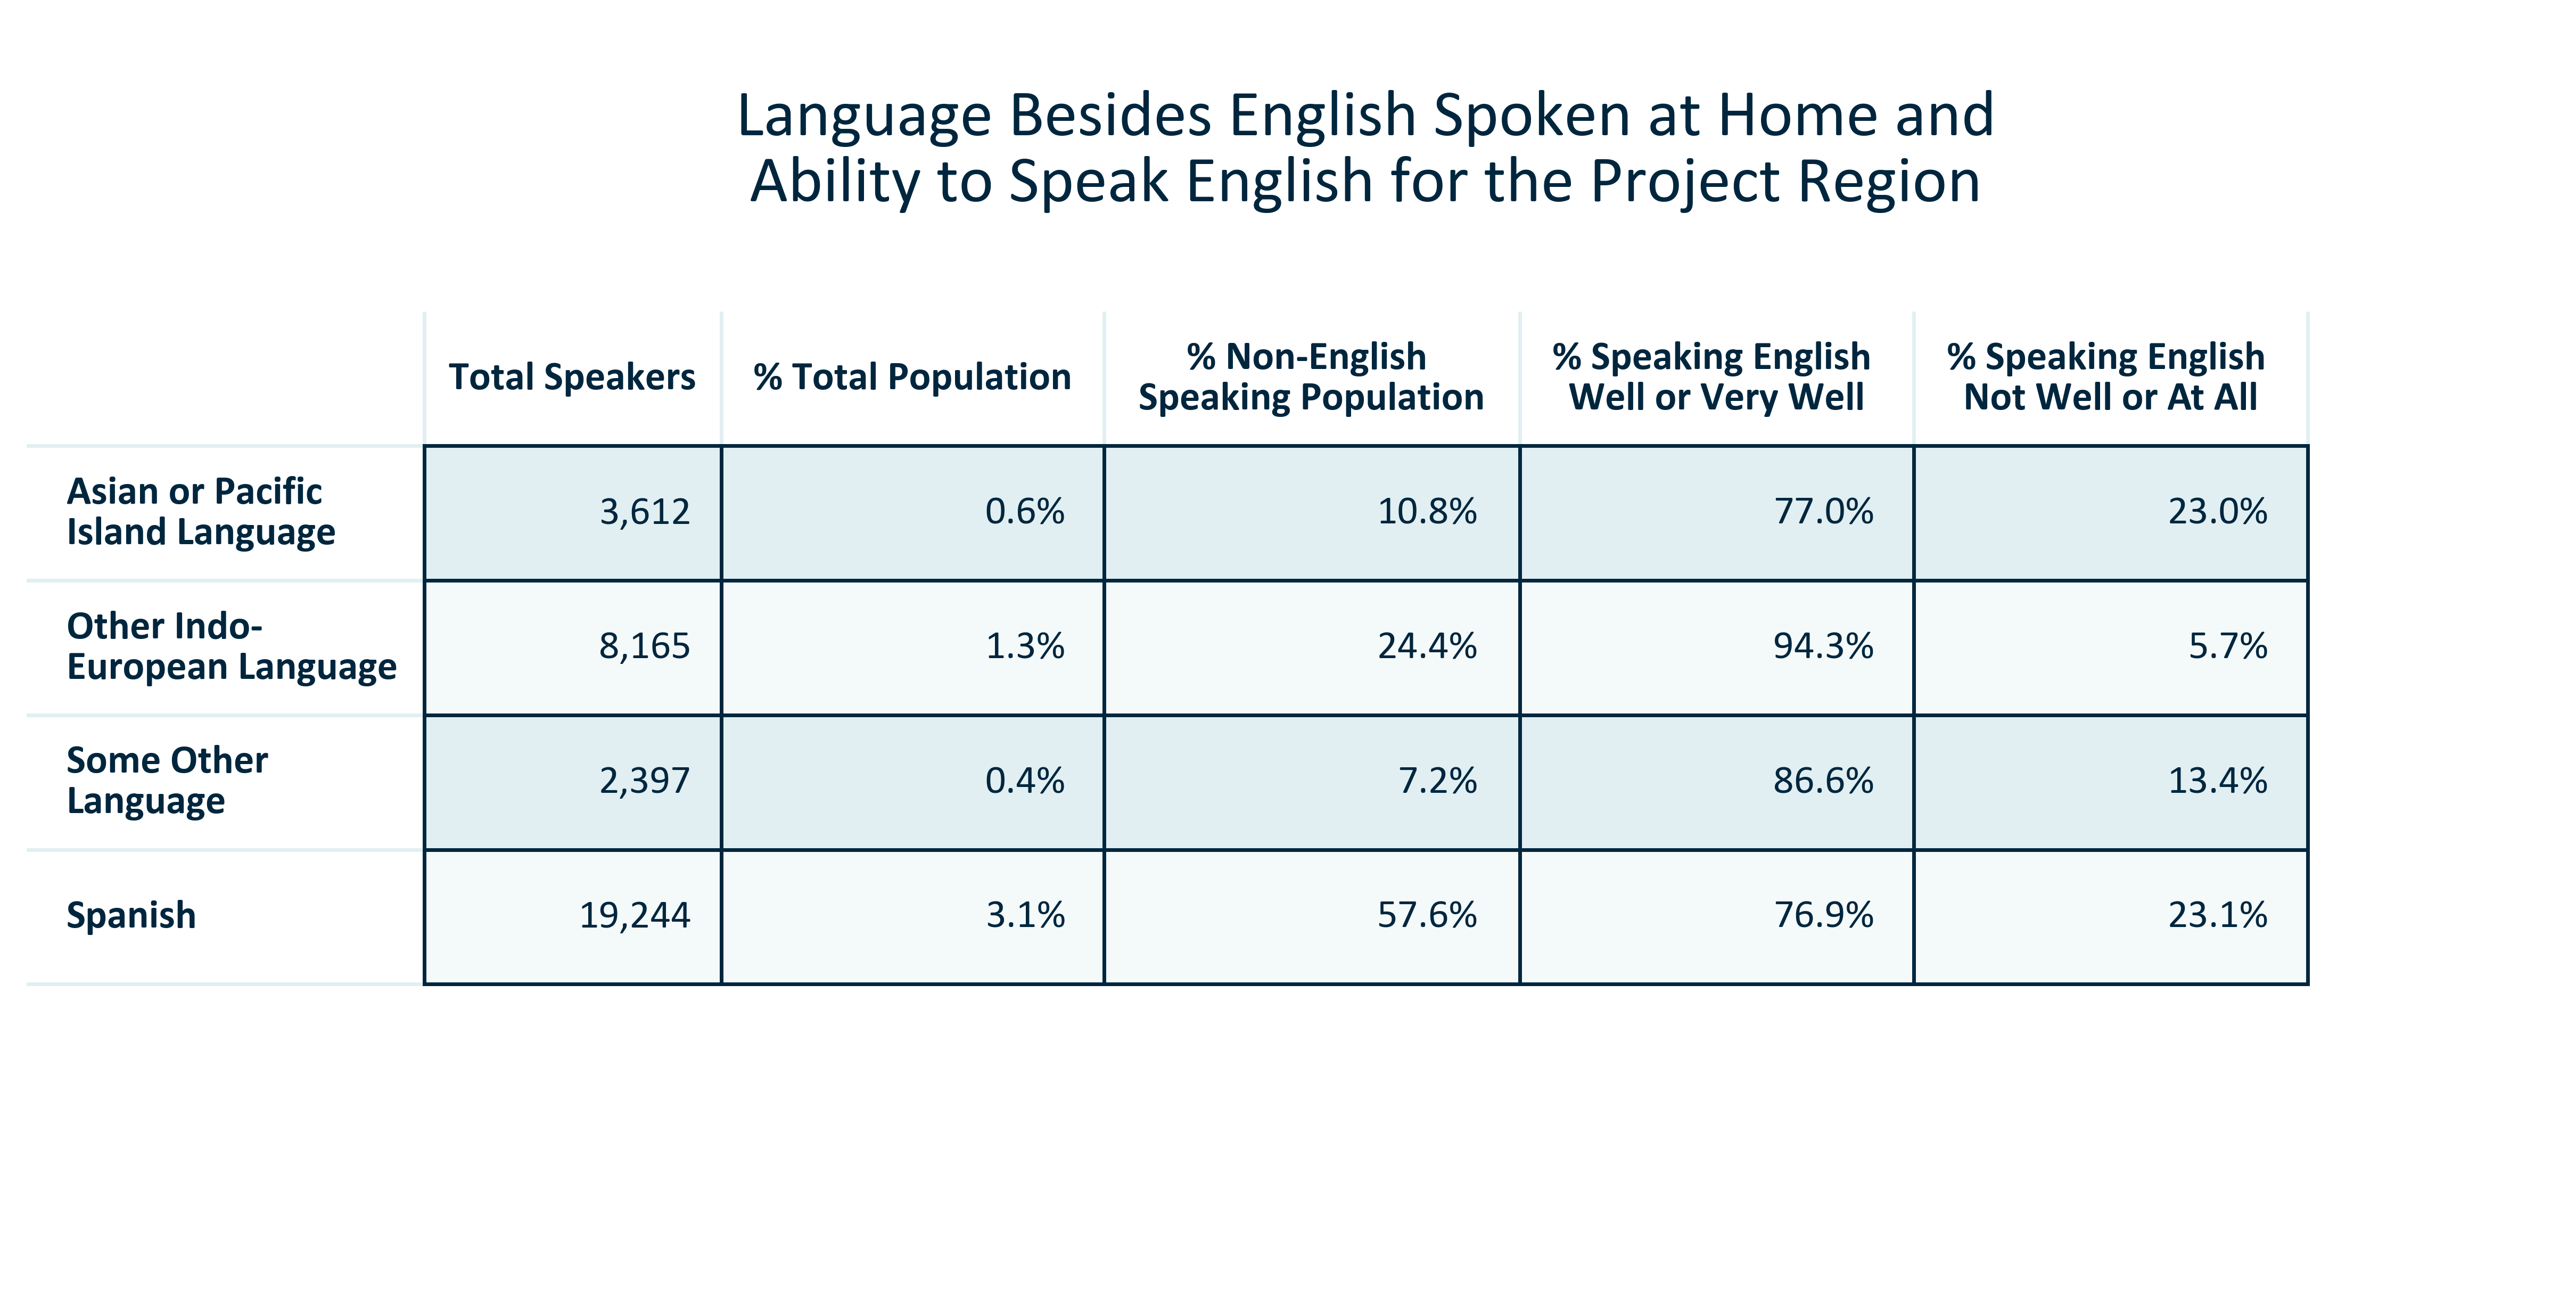

In [41]:
title = 'Language Besides English Spoken at Home and\nAbility to Speak English for the Project Region'
df_temp = data
next_line = ['Total Speakers', '% Total Population', '% Non-English \nSpeaking Population', '% Speaking English \nWell or Very Well', 
             '% Speaking English \nNot Well or At All']
df_temp1 = df_temp[['Language:Speak Spanish', 'Language%:Speak Spanish', 'Language%:Non-English Speak Spanish', 
                    'Language:Spanish%:Speak English Well or Very Well', 'Language:Spanish%:Speak English Not Well or At All']]
df_temp1.columns = next_line
df_temp2 = df_temp[['Language:Speak Other Indo-European Language', 'Language%:Speak Other Indo-European Language', 
                    'Language%:Non-English Speak Other Indo-European Language', 'Language:Other Indo-European%:Speak English Well or Very Well', 
                    'Language:Other Indo-European%:Speak English Not Well or At All']]
df_temp2.columns = next_line
df_temp3 = df_temp[['Language:Speak Asian or Pacific Island Language', 'Language%:Speak Asian or Pacific Island Language', 
                    'Language%:Non-English Speak Asian or Pacific Island Language', 'Language:Asian or Pacific Island%:Speak English Well or Very Well', 
                    'Language:Asian or Pacific Island%:Speak English Not Well or At All']]
df_temp3.columns = next_line
df_temp4 = df_temp[['Language:Speak Other Language', 'Language%:Speak Other Language', 
                    'Language%:Non-English Speak Other Language', 'Language:Other%:Speak English Well or Very Well', 
                    'Language:Other%:Speak English Not Well or At All']]
df_temp4.columns = next_line
dfs = [df_temp2, df_temp4, df_temp1]
df_temp = df_temp3.append(dfs)
newindex = ['Asian or Pacific\nIsland Language', 'Other Indo-\nEuropean Language', 'Some Other \nLanguage', 'Spanish']
df_temp = df_temp.set_axis(newindex)
#df_temp = df_temp.sort_values(by = 'Total Speakers', ascending = False)
df_temp.update(df_temp[['Total Speakers']].applymap('{:,.0f}'.format))
df_temp.update(df_temp[['% Total Population', '% Non-English \nSpeaking Population', '% Speaking English \nWell or Very Well', 
                        '% Speaking English \nNot Well or At All']].applymap('{:.1f}%'.format))
df_temp = df_temp.replace({'nan%': '-', 'inf%': '-'})
#initiate table and set parameters
#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', cellColours = colours, colColours = colcolours, 
                cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
ax.set_title(label = title, y = 0.8)
row_headers = df_temp.index
column_headers = df_temp.columns
table.scale(2, 2.5) #table scaling
allheaders(col1, col2, edge1, edge2)
#display and save
fig.savefig('PortFigs/Region_LanguageSpokenatHome.png', bbox_inches='tight')
df_temp.to_csv('PortFigs/Region_LanguageSpokenatHome.csv')
plt.show()
plt.close();